In [1]:
# from transformers import LlamaForCausalLM as LLaMAForCausalLM
# from transformers import LlamaTokenizer as LLaMATokenizer

# from peft import prepare_model_for_int8_training, LoraConfig, get_peft_model
# from peft import PeftModel
# import torch
# from ParamsIterator import ParamsIterator

In [2]:
from utils import load_model_tokenizer_from_pretrained, draw_metrics_compare_with_glue
from ParamsIterator import ParamsIterator
from EvaluateTestSet import EvaluateTestSet
import pandas as pd
from transformers import GenerationConfig

from tqdm import tqdm_notebook

def get_metric_res(model, tokenizer, params_iteration, experiment_name):
    res = []
    for generation_config_dict in tqdm_notebook(ParamsIterator(params_iteration=params_iteration)):
        evaluator = EvaluateTestSet(generation_config = GenerationConfig(**generation_config_dict
                                                                        ),
                                    #fn_test_data = "temp/t2c_answers.json",
                                    #fn_etalon = "temp/answers.json"
                                   )

        metric_res = evaluator.evaluate(model=model, 
                                        tokenizer=tokenizer,
                                       )
        for key, val in generation_config_dict.items():
            assert key not in metric_res
            metric_res[key] = val

        metric_res['experiment_name'] = experiment_name
        print(generation_config_dict, metric_res)

        res.append(metric_res)
    
    return res



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /opt/conda/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda117.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 8.6
CUDA SETUP: Detected CUDA version 117
CUDA SETUP: Loading binary /opt/conda/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda117.so...


/opt/conda/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('module'), PosixPath('//matplotlib_inline.backend_inline')}
  warn(msg)
/opt/conda/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: Found duplicate ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] files: {PosixPath('/usr/local/cuda/lib64/libcudart.so.11.0'), PosixPath('/usr/local/cuda/lib64/libcudart.so')}.. We'll flip a coin and try one of these, in order to fail forward.
Either way, this might cause trouble in the future:
If you get `CUDA error: invalid device function` errors, the above might be the cause and the solution is to make sure only one ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] in the paths that we search based on your env.
  warn(msg)


In [2]:
for experiment_name in ["/root/experiments/t2c_concode_220428_v9/",
                        "/root/experiments/t2c_concode_220428_v10/",
                        "/root/experiments/t2c_concode_220428_v11/",
                        "/root/experiments/t2c_concode_220428_v12/"]:
    tokenizer, model = load_model_tokenizer_from_pretrained(default_model = default_model, 
                                                            experiment_name = experiment_name
                                                           )
    print(experiment_name)
    model.print_trainable_parameters()
# res = get_metric_res(model=model,
#                      tokenizer=tokenizer,
#                      params_iteration=params_iteration,
#                      experiment_name=experiment_name
#                     )
# data = pd.DataFrame(res).sort_values("BLEU")
# data.to_csv(experiment_name + "/metrics.csv")


Overriding torch_dtype=None with `torch_dtype=torch.float16` due to requirements of `bitsandbytes` to enable model loading in mixed int8. Either pass torch_dtype=torch.float16 or don't pass this argument at all to remove this warning.


Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LLaMATokenizer'. 
The class this function is called from is 'LlamaTokenizer'.
Overriding torch_dtype=None with `torch_dtype=torch.float16` due to requirements of `bitsandbytes` to enable model loading in mixed int8. Either pass torch_dtype=torch.float16 or don't pass this argument at all to remove this warning.


/root/experiments/t2c_concode_220428_v9/
trainable params: 2097152 || all params: 6740512768 || trainable%: 0.03111264783824826


Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LLaMATokenizer'. 
The class this function is called from is 'LlamaTokenizer'.
Overriding torch_dtype=None with `torch_dtype=torch.float16` due to requirements of `bitsandbytes` to enable model loading in mixed int8. Either pass torch_dtype=torch.float16 or don't pass this argument at all to remove this warning.


/root/experiments/t2c_concode_220428_v10/
trainable params: 2097152 || all params: 6740512768 || trainable%: 0.03111264783824826


Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LLaMATokenizer'. 
The class this function is called from is 'LlamaTokenizer'.
Overriding torch_dtype=None with `torch_dtype=torch.float16` due to requirements of `bitsandbytes` to enable model loading in mixed int8. Either pass torch_dtype=torch.float16 or don't pass this argument at all to remove this warning.


/root/experiments/t2c_concode_220428_v11/
trainable params: 4194304 || all params: 6742609920 || trainable%: 0.06220594176090199


Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LLaMATokenizer'. 
The class this function is called from is 'LlamaTokenizer'.


/root/experiments/t2c_concode_220428_v12/
trainable params: 4194304 || all params: 6742609920 || trainable%: 0.06220594176090199


In [13]:

default_model = "decapoda-research/llama-7b-hf"
experiment_name = "/root/experiments/t2c_concode_220428_v14/"

params_iteration = {"temperature": [1.0],
                    "max_new_tokens": [None, 20, 30, 35, 40, 50, 60, 70, 80, 90, 100]
                   }


In [4]:
# !ls /root/experiments/t2c_concode_220428_v13/
!ls {experiment_name}

1683312104.0230427   events.out.tfevents.1683312104.8d048d63ed1a.6054.0
1683312104.035074    events.out.tfevents.1683312104.8d048d63ed1a.6054.2
1683312337.4801078   events.out.tfevents.1683312337.8d048d63ed1a.7269.0
1683312337.4871686   events.out.tfevents.1683312337.8d048d63ed1a.7269.2
1683312517.1667607   events.out.tfevents.1683312517.8d048d63ed1a.7269.4
1683312517.1768987   events.out.tfevents.1683312517.8d048d63ed1a.7269.6
1683312553.3835888   events.out.tfevents.1683312553.8d048d63ed1a.7392.0
1683312553.3904636   events.out.tfevents.1683312553.8d048d63ed1a.7392.2
1683312918.7901428   events.out.tfevents.1683312918.8d048d63ed1a.7560.0
1683312918.7971816   events.out.tfevents.1683312918.8d048d63ed1a.7560.2
1683315207.0833232   events.out.tfevents.1683315207.8d048d63ed1a.7751.0
1683315207.0954862   events.out.tfevents.1683315207.8d048d63ed1a.7751.2
1683315468.9101622   events.out.tfevents.1683315468.8d048d63ed1a.7852.0
1683315468.9175854   events.out.tfevents.1683315468.8d048d63ed1a

In [5]:
tokenizer, model = load_model_tokenizer_from_pretrained(default_model = default_model, 
                                                        experiment_name = experiment_name
                                                       )

Overriding torch_dtype=None with `torch_dtype=torch.float16` due to requirements of `bitsandbytes` to enable model loading in mixed int8. Either pass torch_dtype=torch.float16 or don't pass this argument at all to remove this warning.


Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LLaMATokenizer'. 
The class this function is called from is 'LlamaTokenizer'.


In [6]:
model.print_trainable_parameters()
# trainable params: 4194304 || all params: 6742609920 || trainable%: 0.06220594176090199

trainable params: 2097152 || all params: 6740512768 || trainable%: 0.03111264783824826


In [7]:
from tqdm import tqdm_notebook

def get_metric_res(model, tokenizer, params_iteration, experiment_name):
    res = []
    for generation_config_dict in tqdm_notebook(ParamsIterator(params_iteration=params_iteration)):
        evaluator = EvaluateTestSet(generation_config = GenerationConfig(**generation_config_dict
                                                                        ),
                                    #fn_test_data = "temp/t2c_answers.json",
                                    #fn_etalon = "temp/answers.json"
                                   )

        metric_res = evaluator.evaluate(model=model, 
                                        tokenizer=tokenizer,
                                       )
        for key, val in generation_config_dict.items():
            assert key not in metric_res
            metric_res[key] = val

        metric_res['experiment_name'] = experiment_name
        print(generation_config_dict, metric_res)

        res.append(metric_res)
    
    return res

In [8]:
model.eval();

In [23]:
params_iteration = {"temperature": [1.0],
                    "max_new_tokens": [45, 47, 49, 51, 53, 55]
                   }

res2 = get_metric_res(model=model,
                     tokenizer=tokenizer,
                     params_iteration=params_iteration,
                     experiment_name=experiment_name
                    )


/tmp/ipykernel_7790/3839643825.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for generation_config_dict in tqdm_notebook(ParamsIterator(params_iteration=params_iteration)):


  0%|          | 0/6 [00:00<?, ?it/s]


100%|███████████████████████████████████████████| 10/10 [01:10<00:00,  7.05s/it]

100%|█████████████████████████████████████| 100/100 [00:00<00:00, 135869.91it/s]


{'max_new_tokens': 45, 'temperature': 1.0} {'EM': 0.0, 'BLEU': 0.3074787664372605, 'brevity_penalty': 0.9321626765398044, 'ratio': 0.9343629343629344, 'translation_length': 2904, 'reference_length': 3108, 'precisions_0': 0.5342512908777969, 'precisions_1': 0.3843137254901961, 'precisions_2': 0.277634011090573, 'precisions_3': 0.20767754318618042, 'max_new_tokens': 45, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v14'}



100%|███████████████████████████████████████████| 10/10 [01:13<00:00,  7.35s/it]

100%|█████████████████████████████████████| 100/100 [00:00<00:00, 179935.82it/s]


{'max_new_tokens': 47, 'temperature': 1.0} {'EM': 0.0, 'BLEU': 0.3111651662034723, 'brevity_penalty': 0.9699565728158746, 'ratio': 0.9703989703989704, 'translation_length': 3016, 'reference_length': 3108, 'precisions_0': 0.5236990387802453, 'precisions_1': 0.3747000342817964, 'precisions_2': 0.2690805821796237, 'precisions_3': 0.20058888479941112, 'max_new_tokens': 47, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v14'}



100%|███████████████████████████████████████████| 10/10 [01:16<00:00,  7.69s/it]

100%|█████████████████████████████████████| 100/100 [00:00<00:00, 170361.66it/s]


{'max_new_tokens': 49, 'temperature': 1.0} {'EM': 0.0, 'BLEU': 0.3147858285478979, 'brevity_penalty': 1.0, 'ratio': 1.0045045045045045, 'translation_length': 3122, 'reference_length': 3108, 'precisions_0': 0.5136087095741274, 'precisions_1': 0.36751571286801193, 'precisions_2': 0.2641122134793021, 'precisions_3': 0.1969535954658165, 'max_new_tokens': 49, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v14'}



100%|███████████████████████████████████████████| 10/10 [01:19<00:00,  7.95s/it]

100%|██████████████████████████████████████| 100/100 [00:00<00:00, 61482.03it/s]


{'max_new_tokens': 51, 'temperature': 1.0} {'EM': 0.0, 'BLEU': 0.3078157871178737, 'brevity_penalty': 1.0, 'ratio': 1.03989703989704, 'translation_length': 3232, 'reference_length': 3108, 'precisions_0': 0.5029384472626044, 'precisions_1': 0.35939993616342164, 'precisions_2': 0.25783053082756346, 'precisions_3': 0.19263552676440504, 'max_new_tokens': 51, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v14'}



100%|███████████████████████████████████████████| 10/10 [01:22<00:00,  8.25s/it]

100%|██████████████████████████████████████| 100/100 [00:00<00:00, 50027.48it/s]


{'max_new_tokens': 53, 'temperature': 1.0} {'EM': 0.0, 'BLEU': 0.2997976392306081, 'brevity_penalty': 1.0, 'ratio': 1.076898326898327, 'translation_length': 3347, 'reference_length': 3108, 'precisions_0': 0.4925328554360812, 'precisions_1': 0.3503694581280788, 'precisions_2': 0.2503176620076239, 'precisions_3': 0.18700787401574803, 'max_new_tokens': 53, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v14'}



100%|███████████████████████████████████████████| 10/10 [01:25<00:00,  8.55s/it]

100%|██████████████████████████████████████| 100/100 [00:00<00:00, 41368.02it/s]

{'max_new_tokens': 55, 'temperature': 1.0} {'EM': 0.0, 'BLEU': 0.2931500282907953, 'brevity_penalty': 1.0, 'ratio': 1.111003861003861, 'translation_length': 3453, 'reference_length': 3108, 'precisions_0': 0.48320787492762013, 'precisions_1': 0.3428741800834824, 'precisions_2': 0.24492931776275353, 'precisions_3': 0.18199112238427395, 'max_new_tokens': 55, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v14'}


In [24]:
# res2 = [{'max_new_tokens': 60, 'temperature': 1.0, 'EM': 0.0, 'BLEU': 0.27660727734128454, 'brevity_penalty': 1.0, 'ratio': 1.1962676962676964, 'translation_length': 3718, 'reference_length': 3108, 'precisions_0': 0.46060769023931164, 'precisions_1': 0.32412268582481346, 'precisions_2': 0.23074737141233304, 'precisions_3': 0.16993272886809008, 'max_new_tokens': 60, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v14/'}]

In [25]:
# res = resres2
res1 = [i for i in res]

res.extend(res2)

In [20]:
# res[-1]

In [10]:
# res = [{'max_new_tokens': None, 'temperature': 1.0, 'EM': 0.0, 'BLEU': 5.612544109439402e-14, 'brevity_penalty': 8.638174725859421e-14, 'ratio': 0.032175032175032175, 'translation_length': 100, 'reference_length': 3108, 'precisions_0': 0.1782178217821782, 'precisions_1': 1.0, 'precisions_2': 1.0, 'precisions_3': 1.0, 'max_new_tokens': None, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v14/'},
#         {'max_new_tokens': 20, 'temperature': 1.0, 'EM': 0.0, 'BLEU': 0.00015739152854811044, 'brevity_penalty': 0.015697891802788876, 'ratio': 0.19401544401544402, 'translation_length': 603, 'reference_length': 3108, 'precisions_0': 0.12417218543046357, 'precisions_1': 0.011904761904761904, 'precisions_2': 0.0023584905660377358, 'precisions_3': 0.002898550724637681, 'max_new_tokens': 20, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v14/'},
#         {'max_new_tokens': 30, 'temperature': 1.0, 'EM': 0.0, 'BLEU': 0.0005671776290978791, 'brevity_penalty': 0.08143902671466742, 'ratio': 0.2850707850707851, 'translation_length': 886, 'reference_length': 3108, 'precisions_0': 0.11724915445321307, 'precisions_1': 0.008894536213468869, 'precisions_2': 0.0014144271570014145, 'precisions_3': 0.001594896331738437, 'max_new_tokens': 30, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v14/'},
#         {'max_new_tokens': 35, 'temperature': 1.0, 'EM': 0.0, 'BLEU': 0.0007636351109178241, 'brevity_penalty': 0.12680703500621668, 'ratio': 0.32625482625482627, 'translation_length': 1014, 'reference_length': 3108, 'precisions_0': 0.10837438423645321, 'precisions_1': 0.007650273224043716, 'precisions_2': 0.0011976047904191617, 'precisions_3': 0.0013245033112582781, 'max_new_tokens': 35, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v14/'},
#         {'max_new_tokens': 40, 'temperature': 1.0, 'EM': 0.0, 'BLEU': 0.0009618965863040525, 'brevity_penalty': 0.1783644445823123, 'ratio': 0.36711711711711714, 'translation_length': 1141, 'reference_length': 3108, 'precisions_0': 0.10683012259194395, 'precisions_1': 0.0067178502879078695, 'precisions_2': 0.0010395010395010396, 'precisions_3': 0.0011337868480725624, 'max_new_tokens': 40, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v14/'},
#         {'max_new_tokens': 50, 'temperature': 1.0, 'EM': 0.0, 'BLEU': 0.0013229101423892047, 'brevity_penalty': 0.3017912270031732, 'ratio': 0.45495495495495497, 'translation_length': 1414, 'reference_length': 3108, 'precisions_0': 0.0989399293286219, 'precisions_1': 0.00532319391634981, 'precisions_2': 0.0008097165991902834, 'precisions_3': 0.0008658008658008658, 'max_new_tokens': 50, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v14/'}
#         ]




In [26]:
res

[{'EM': 0.0,
  'BLEU': 7.881631954235341e-14,
  'brevity_penalty': 8.638174725859421e-14,
  'ratio': 0.032175032175032175,
  'translation_length': 100,
  'reference_length': 3108,
  'precisions_0': 0.693069306930693,
  'precisions_1': 1.0,
  'precisions_2': 1.0,
  'precisions_3': 1.0,
  'max_new_tokens': None,
  'temperature': 1.0,
  'experiment_name': '/root/experiments/t2c_concode_220428_v14/'},
 {'EM': 2.0,
  'BLEU': 0.16896998318740458,
  'brevity_penalty': 0.32154576900408605,
  'ratio': 0.46846846846846846,
  'translation_length': 1456,
  'reference_length': 3108,
  'precisions_0': 0.75840768702814,
  'precisions_1': 0.5932203389830508,
  'precisions_2': 0.4614160700079554,
  'precisions_3': 0.36732929991356955,
  'max_new_tokens': 20,
  'temperature': 1.0,
  'experiment_name': '/root/experiments/t2c_concode_220428_v14/'},
 {'EM': 0.0,
  'BLEU': 0.2541102572024482,
  'brevity_penalty': 0.6065306597126334,
  'ratio': 0.6666666666666666,
  'translation_length': 2072,
  'reference_l

In [27]:
data = pd.DataFrame(res).sort_values("BLEU")
data.to_csv(experiment_name + "/metrics.csv")

8 8 8
28 28 28
8 8 8
8 8 8
13 13 13


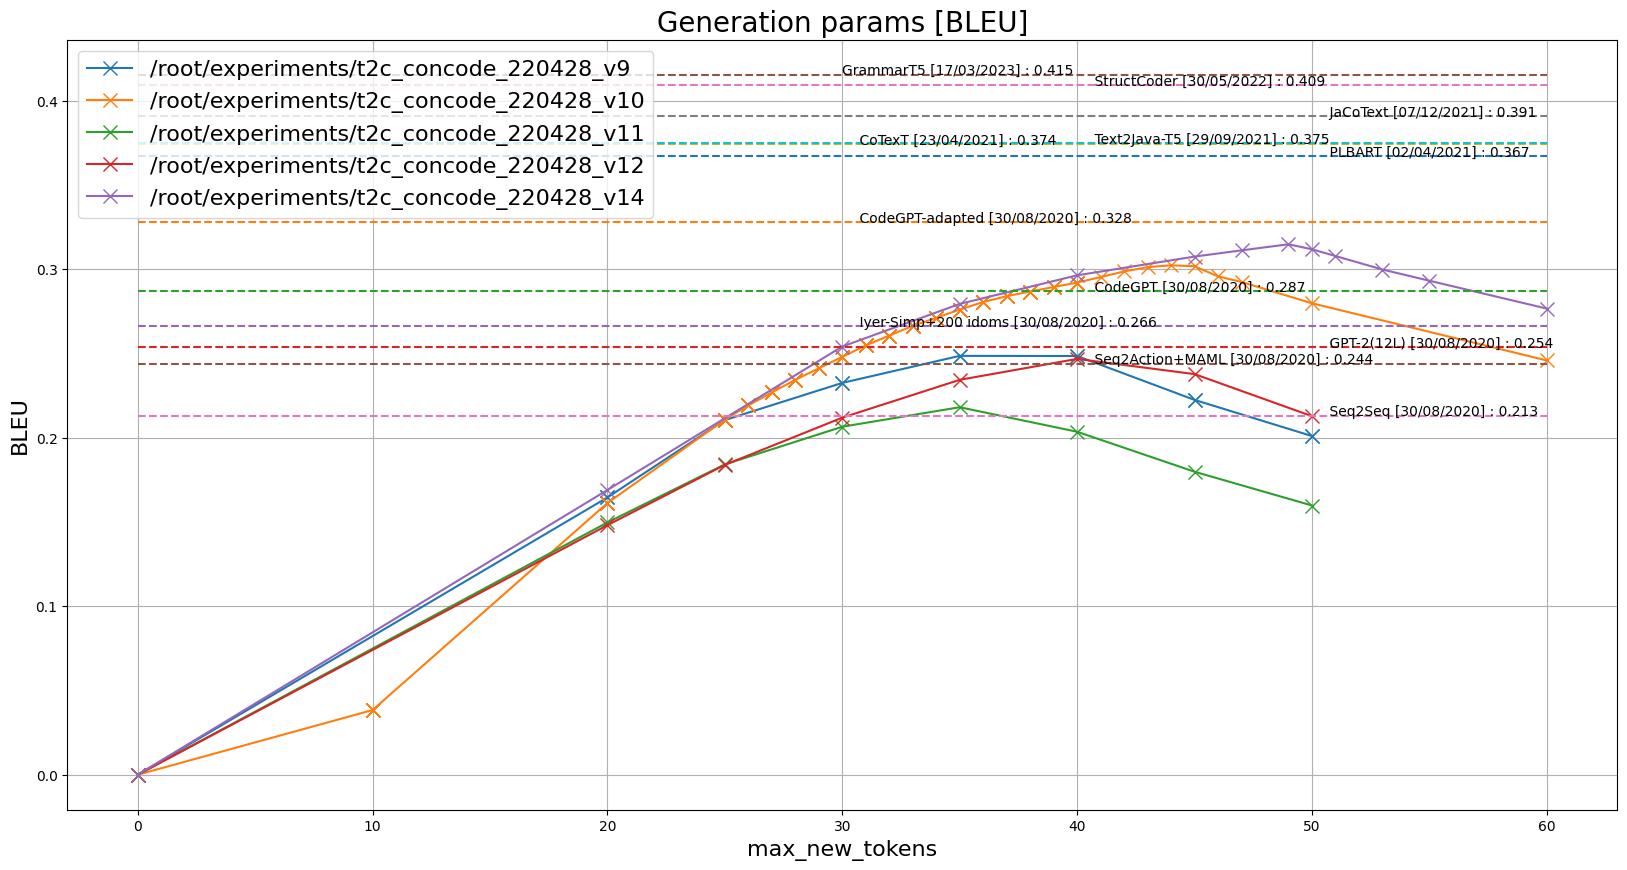

In [28]:
# data = {experiment_name: pd.read_csv(experiment_name+"/metrics.csv"),
#         "/root/experiments/t2c_concode_220428_v10/": pd.read_csv("/root/experiments/t2c_concode_220428_v10/metrics.csv"
#                                                                 )
#        }

data = {}
for i in ["9", "10", "11", "12", "14"]:
    experiment_name = f"/root/experiments/t2c_concode_220428_v{i}"
    try:
        data[experiment_name] = pd.read_csv(experiment_name + "/metrics.csv")
    except:
        pass

draw_metrics_compare_with_glue(data)

8 8 8
28 28 28
8 8 8
8 8 8
7 7 7


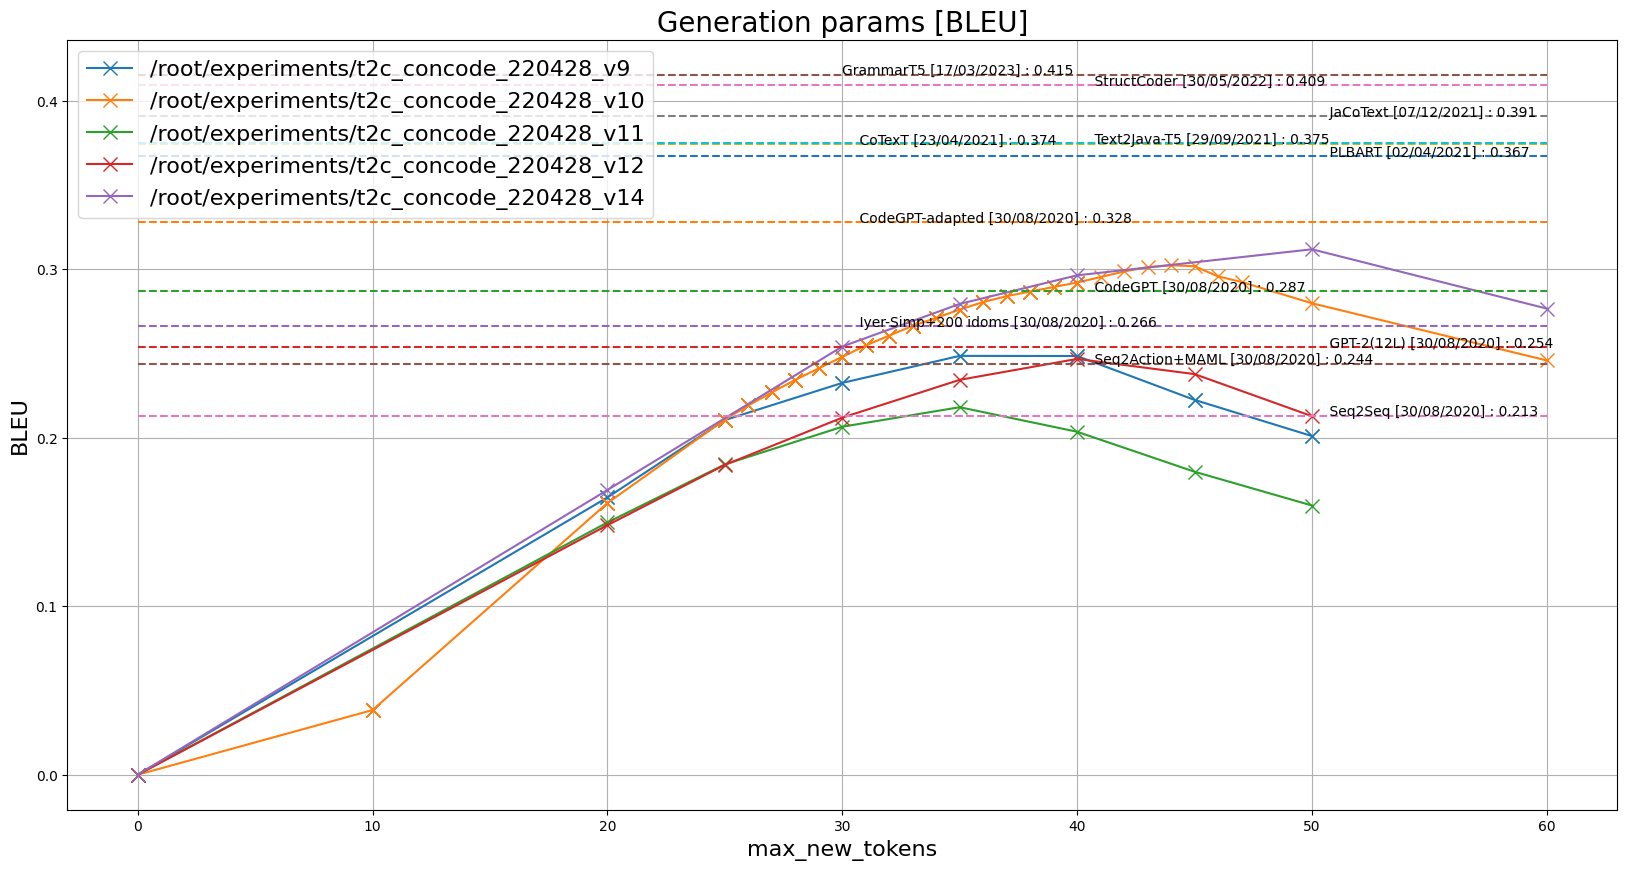

8 8 8
28 28 28
8 8 8
8 8 8
6 6 6


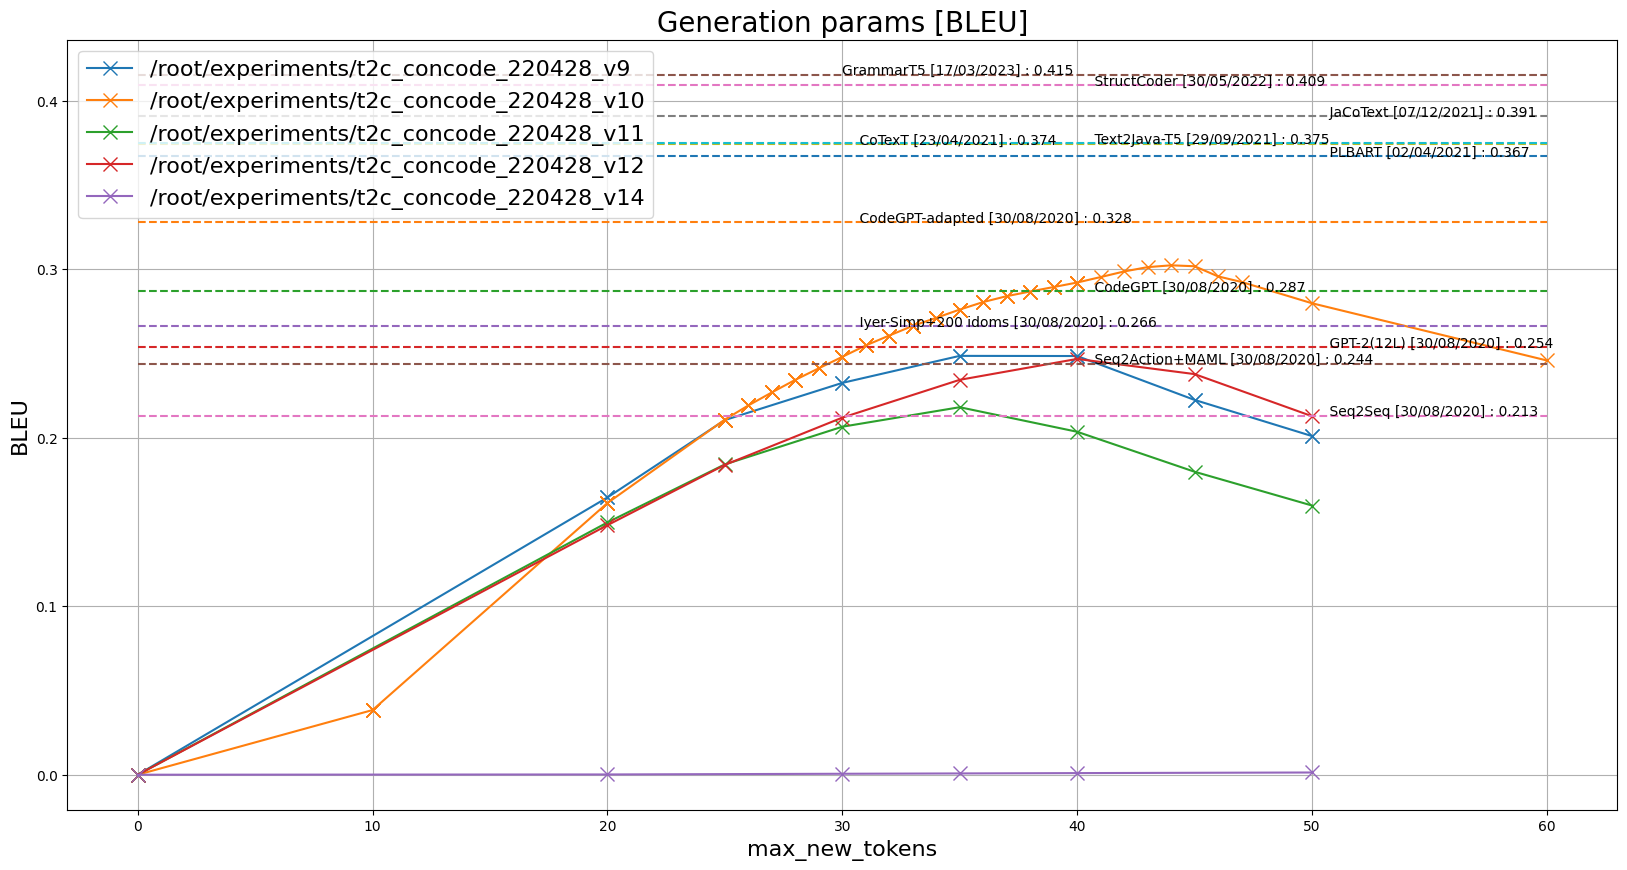

8 8 8
28 28 28
8 8 8
8 8 8


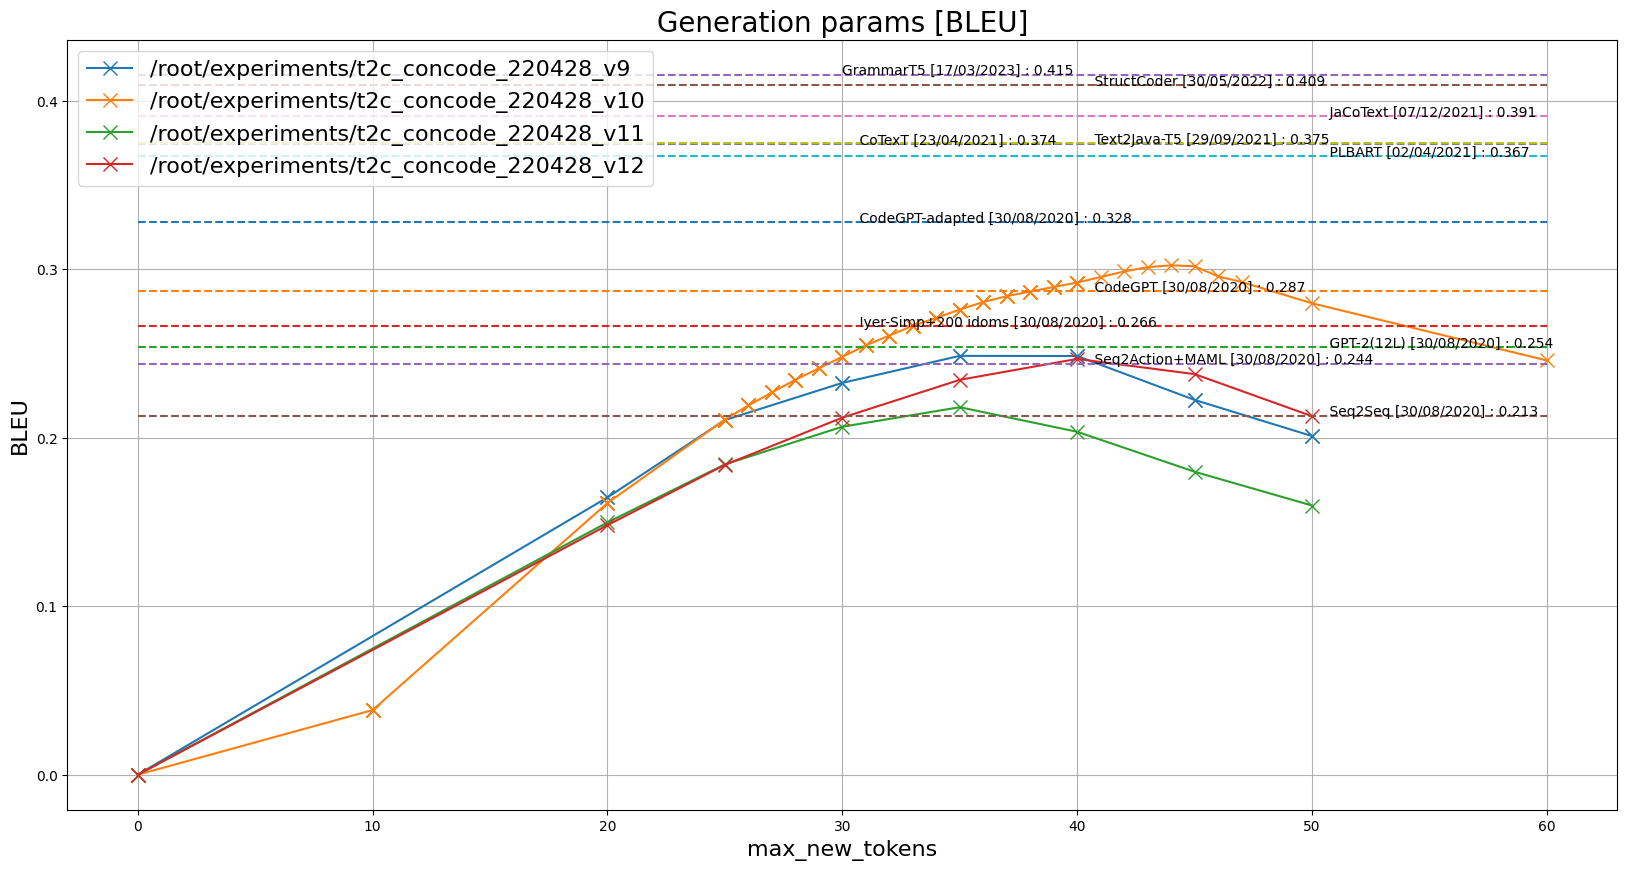

In [7]:
# data = {experiment_name: pd.read_csv(experiment_name+"/metrics.csv"),
#         "/root/experiments/t2c_concode_220428_v10/": pd.read_csv("/root/experiments/t2c_concode_220428_v10/metrics.csv"
#                                                                 )
#        }

data = {}
for i in ["9", "10", "11", "12"]:
    experiment_name = f"/root/experiments/t2c_concode_220428_v{i}"
    try:
        data[experiment_name] = pd.read_csv(experiment_name + "/metrics.csv")
    except:
        pass

draw_metrics_compare_with_glue(data)

In [ ]:
from EvaluateTestSet2 import EvaluateTestSet
from transformers import LlamaForCausalLM as LLaMAForCausalLM
from transformers import LlamaTokenizer as LLaMATokenizer

from peft import prepare_model_for_int8_training, LoraConfig, get_peft_model
from peft import PeftModel
import torch

from transformers import GenerationConfig
from tqdm import tqdm_notebook

In [ ]:
# !ls {experiment_name}
default_model = "decapoda-research/llama-7b-hf"
experiment_name = "/root/experiments/t2c_concode_220428_v9/"

params_iteration = {"temperature": [1.0, 0.001],
                    "max_new_tokens": [None, 20, 25, 30, 35, 40, 45, 50]
                   }

In [4]:
class ParamsIterator:
    """
        Recursive get all params all and all
    """
    def __init__(self, params_iteration):
        self.params_iteration = params_iteration
        self.params_list = list(self.params_iteration.keys())
    
    def __len__(self):
        res = 1
        for key in self.params_list:
            res *= len(self.params_iteration[key]) 
        return res
    
    def __iter__(self, 
                 previous_dict = {}
                ):
        if len(self.params_list)==0:
            yield previous_dict
        else:
            param_name = self.params_list.pop()
            for param_val in self.params_iteration[param_name]:
                previous_dict[param_name] = param_val
                yield from self.__iter__(previous_dict=previous_dict)
            self.params_list.append(param_name)
        
# obj = ParamsIterator(params_iteration=params_iteration)
# from tqdm import tqdm
# import time
# for i in tqdm(obj):
#     print(i)
#     time.sleep(1)

In [9]:
res = get_metric_res(model = model, 
                     tokenizer = tokenizer, 
                     params_iteration = params_iteration,
                     experiment_name = experiment_name
                    )

/tmp/ipykernel_5261/3839643825.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for generation_config_dict in tqdm_notebook(ParamsIterator(params_iteration=params_iteration)):


  0%|          | 0/8 [00:00<?, ?it/s]


  0%|                                                    | 0/10 [00:00<?, ?it/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Input length of input_ids is 410, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.

 10%|████▍                                       | 1/10 [00:01<00:14,  1.60s/it]Input length of input_ids is 348, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.

 20%|████████▊                          

NameError: name 'verbose' is not defined

In [5]:
def load_model_tokenizer_from_pretrained(default_model, 
                                         experiment_name
                                        ):
    # ToDo: BASE model is getting from config
    BASE_MODEL = default_model
    LORA_WEIGHTS = experiment_name

    model = LLaMAForCausalLM.from_pretrained(
        BASE_MODEL,
        load_in_8bit=True,
        device_map="auto"
    )

    model = PeftModel.from_pretrained(
        model,
        LORA_WEIGHTS,
        torch_dtype=torch.float16,
    )

    tokenizer = LLaMATokenizer.from_pretrained(BASE_MODEL)
    model.config.pad_token_id = tokenizer.pad_token_id = 0  # unk
    tokenizer.padding_side = "left"
    # not sure how necessary this part is, not sure if tloen/alpaca-lora-7b was even trained with EOS and BOS tokens
    model.config.bos_token_id = 1
    model.config.eos_token_id = 2

    model.eval()
    
    return tokenizer, model

In [7]:
tokenizer, model = load_model_tokenizer_from_pretrained(default_model = default_model, 
                                                        experiment_name = experiment_name
                                                       )

Overriding torch_dtype=None with `torch_dtype=torch.float16` due to requirements of `bitsandbytes` to enable model loading in mixed int8. Either pass torch_dtype=torch.float16 or don't pass this argument at all to remove this warning.


Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LLaMATokenizer'. 
The class this function is called from is 'LlamaTokenizer'.


In [11]:
def get_metric_res(model, tokenizer, params_iteration, experiment_name):
    res = []
    for generation_config_dict in tqdm_notebook(ParamsIterator(params_iteration=params_iteration)):
        evaluator = EvaluateTestSet(generation_config = GenerationConfig(**generation_config_dict
                                                                        ),
                                    #fn_test_data = "temp/t2c_answers.json",
                                    #fn_etalon = "temp/answers.json"
                                   )

        metric_res = evaluator.evaluate(model=model, 
                                        tokenizer=tokenizer,
                                       )
        for key, val in generation_config_dict.items():
            assert key not in metric_res
            metric_res[key] = val

        metric_res['experiment_name'] = experiment_name
        print(generation_config_dict, metric_res)

        res.append(metric_res)
    
    return res

In [12]:
res = get_metric_res(model = model, 
                     tokenizer = tokenizer, 
                     params_iteration = params_iteration,
                     experiment_name = experiment_name
                    )

  0%|                                                    | 0/10 [00:00<?, ?it/s]Input length of input_ids is 410, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


0 10 10


 10%|████▍                                       | 1/10 [00:00<00:08,  1.12it/s]Input length of input_ids is 348, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


10 20 10


 20%|████████▊                                   | 2/10 [00:01<00:06,  1.26it/s]Input length of input_ids is 517, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


20 30 10


 30%|█████████████▏                              | 3/10 [00:02<00:06,  1.06it/s]Input length of input_ids is 416, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


30 40 10


 40%|█████████████████▌                          | 4/10 [00:03<00:05,  1.10it/s]Input length of input_ids is 351, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


40 50 10


 50%|██████████████████████                      | 5/10 [00:04<00:04,  1.18it/s]Input length of input_ids is 414, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


50 60 10


 60%|██████████████████████████▍                 | 6/10 [00:05<00:03,  1.17it/s]Input length of input_ids is 252, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


60 70 10


 70%|██████████████████████████████▊             | 7/10 [00:05<00:02,  1.32it/s]Input length of input_ids is 325, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


70 80 10


 80%|███████████████████████████████████▏        | 8/10 [00:06<00:01,  1.36it/s]Input length of input_ids is 294, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


80 90 10


 90%|███████████████████████████████████████▌    | 9/10 [00:07<00:00,  1.43it/s]Input length of input_ids is 280, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


90 100 10


100%|█████████████████████████████████████| 100/100 [00:00<00:00, 151309.67it/s]


{'max_new_tokens': None, 'temperature': 1.0} {'EM': 0.0, 'BLEU': 7.736953381720596e-14, 'brevity_penalty': 8.638174725859421e-14, 'ratio': 0.032175032175032175, 'translation_length': 100, 'reference_length': 3108, 'precisions_0': 0.6435643564356436, 'precisions_1': 1.0, 'precisions_2': 1.0, 'precisions_3': 1.0, 'max_new_tokens': None, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v9/'}


  0%|                                                    | 0/10 [00:00<?, ?it/s]Input length of input_ids is 410, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


0 10 10


 10%|████▍                                       | 1/10 [00:00<00:07,  1.15it/s]Input length of input_ids is 348, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


10 20 10


 20%|████████▊                                   | 2/10 [00:01<00:06,  1.25it/s]Input length of input_ids is 517, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


20 30 10


 30%|█████████████▏                              | 3/10 [00:02<00:06,  1.07it/s]Input length of input_ids is 416, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


30 40 10


 40%|█████████████████▌                          | 4/10 [00:03<00:05,  1.10it/s]Input length of input_ids is 351, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


40 50 10


 50%|██████████████████████                      | 5/10 [00:04<00:04,  1.17it/s]Input length of input_ids is 414, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


50 60 10


 60%|██████████████████████████▍                 | 6/10 [00:05<00:03,  1.15it/s]Input length of input_ids is 252, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


60 70 10


 70%|██████████████████████████████▊             | 7/10 [00:05<00:02,  1.31it/s]Input length of input_ids is 325, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


70 80 10


 80%|███████████████████████████████████▏        | 8/10 [00:06<00:01,  1.34it/s]Input length of input_ids is 294, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


80 90 10


 90%|███████████████████████████████████████▌    | 9/10 [00:07<00:00,  1.42it/s]Input length of input_ids is 280, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


90 100 10


100%|█████████████████████████████████████| 100/100 [00:00<00:00, 374157.36it/s]


{'max_new_tokens': None, 'temperature': 0.001} {'EM': 0.0, 'BLEU': 7.736953381720596e-14, 'brevity_penalty': 8.638174725859421e-14, 'ratio': 0.032175032175032175, 'translation_length': 100, 'reference_length': 3108, 'precisions_0': 0.6435643564356436, 'precisions_1': 1.0, 'precisions_2': 1.0, 'precisions_3': 1.0, 'max_new_tokens': None, 'temperature': 0.001, 'experiment_name': '/root/experiments/t2c_concode_220428_v9/'}


  0%|                                                    | 0/10 [00:00<?, ?it/s]

0 10 10


 10%|████▍                                       | 1/10 [00:03<00:34,  3.86s/it]

10 20 10


 20%|████████▊                                   | 2/10 [00:07<00:30,  3.77s/it]

20 30 10


 30%|█████████████▏                              | 3/10 [00:11<00:27,  3.95s/it]

30 40 10


 40%|█████████████████▌                          | 4/10 [00:15<00:23,  3.90s/it]

40 50 10


 50%|██████████████████████                      | 5/10 [00:19<00:19,  3.83s/it]

50 60 10


 60%|██████████████████████████▍                 | 6/10 [00:23<00:15,  3.85s/it]

60 70 10


 70%|██████████████████████████████▊             | 7/10 [00:26<00:11,  3.74s/it]

70 80 10


 80%|███████████████████████████████████▏        | 8/10 [00:30<00:07,  3.71s/it]

80 90 10


 90%|███████████████████████████████████████▌    | 9/10 [00:33<00:03,  3.66s/it]

90 100 10


100%|█████████████████████████████████████| 100/100 [00:00<00:00, 283590.53it/s]


{'max_new_tokens': 20, 'temperature': 1.0} {'EM': 1.0, 'BLEU': 0.16454369830917434, 'brevity_penalty': 0.3721405456327797, 'ratio': 0.502895752895753, 'translation_length': 1563, 'reference_length': 3108, 'precisions_0': 0.690537084398977, 'precisions_1': 0.5157103825136612, 'precisions_2': 0.37683284457478006, 'precisions_3': 0.2848101265822785, 'max_new_tokens': 20, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v9/'}


  0%|                                                    | 0/10 [00:00<?, ?it/s]

0 10 10


 10%|████▍                                       | 1/10 [00:03<00:34,  3.86s/it]

10 20 10


 20%|████████▊                                   | 2/10 [00:07<00:30,  3.79s/it]

20 30 10


 30%|█████████████▏                              | 3/10 [00:11<00:27,  3.95s/it]

30 40 10


 40%|█████████████████▌                          | 4/10 [00:15<00:23,  3.90s/it]

40 50 10


 50%|██████████████████████                      | 5/10 [00:19<00:19,  3.85s/it]

50 60 10


 60%|██████████████████████████▍                 | 6/10 [00:23<00:15,  3.85s/it]

60 70 10


 70%|██████████████████████████████▊             | 7/10 [00:26<00:11,  3.76s/it]

70 80 10


 80%|███████████████████████████████████▏        | 8/10 [00:30<00:07,  3.73s/it]

80 90 10


 90%|███████████████████████████████████████▌    | 9/10 [00:34<00:03,  3.69s/it]

90 100 10


100%|█████████████████████████████████████| 100/100 [00:00<00:00, 293718.77it/s]


{'max_new_tokens': 20, 'temperature': 0.001} {'EM': 1.0, 'BLEU': 0.16454369830917434, 'brevity_penalty': 0.3721405456327797, 'ratio': 0.502895752895753, 'translation_length': 1563, 'reference_length': 3108, 'precisions_0': 0.690537084398977, 'precisions_1': 0.5157103825136612, 'precisions_2': 0.37683284457478006, 'precisions_3': 0.2848101265822785, 'max_new_tokens': 20, 'temperature': 0.001, 'experiment_name': '/root/experiments/t2c_concode_220428_v9/'}


  0%|                                                    | 0/10 [00:00<?, ?it/s]

0 10 10


 10%|████▍                                       | 1/10 [00:04<00:41,  4.65s/it]

10 20 10


 20%|████████▊                                   | 2/10 [00:09<00:36,  4.54s/it]

20 30 10


 30%|█████████████▏                              | 3/10 [00:14<00:33,  4.72s/it]

30 40 10


 40%|█████████████████▌                          | 4/10 [00:18<00:28,  4.67s/it]

40 50 10


 50%|██████████████████████                      | 5/10 [00:23<00:22,  4.59s/it]

50 60 10


 60%|██████████████████████████▍                 | 6/10 [00:27<00:18,  4.62s/it]

60 70 10


 70%|██████████████████████████████▊             | 7/10 [00:32<00:13,  4.54s/it]

70 80 10


 80%|███████████████████████████████████▏        | 8/10 [00:36<00:09,  4.51s/it]

80 90 10


 90%|███████████████████████████████████████▌    | 9/10 [00:40<00:04,  4.45s/it]

90 100 10


100%|█████████████████████████████████████| 100/100 [00:00<00:00, 280367.91it/s]


{'max_new_tokens': 25, 'temperature': 1.0} {'EM': 0.0, 'BLEU': 0.21046174513496407, 'brevity_penalty': 0.561207271029807, 'ratio': 0.6338481338481339, 'translation_length': 1970, 'reference_length': 3108, 'precisions_0': 0.6164383561643836, 'precisions_1': 0.4409406734366649, 'precisions_2': 0.313382269904009, 'precisions_3': 0.23219628964691802, 'max_new_tokens': 25, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v9/'}


  0%|                                                    | 0/10 [00:00<?, ?it/s]

0 10 10


 10%|████▍                                       | 1/10 [00:04<00:41,  4.60s/it]

10 20 10


 20%|████████▊                                   | 2/10 [00:09<00:36,  4.52s/it]

20 30 10


 30%|█████████████▏                              | 3/10 [00:14<00:33,  4.71s/it]

30 40 10


 40%|█████████████████▌                          | 4/10 [00:18<00:28,  4.68s/it]

40 50 10


 50%|██████████████████████                      | 5/10 [00:23<00:23,  4.62s/it]

50 60 10


 60%|██████████████████████████▍                 | 6/10 [00:27<00:18,  4.63s/it]

60 70 10


 70%|██████████████████████████████▊             | 7/10 [00:32<00:13,  4.55s/it]

70 80 10


 80%|███████████████████████████████████▏        | 8/10 [00:36<00:09,  4.51s/it]

80 90 10


 90%|███████████████████████████████████████▌    | 9/10 [00:40<00:04,  4.46s/it]

90 100 10


100%|█████████████████████████████████████| 100/100 [00:00<00:00, 272357.40it/s]


{'max_new_tokens': 25, 'temperature': 0.001} {'EM': 0.0, 'BLEU': 0.21046174513496407, 'brevity_penalty': 0.561207271029807, 'ratio': 0.6338481338481339, 'translation_length': 1970, 'reference_length': 3108, 'precisions_0': 0.6164383561643836, 'precisions_1': 0.4409406734366649, 'precisions_2': 0.313382269904009, 'precisions_3': 0.23219628964691802, 'max_new_tokens': 25, 'temperature': 0.001, 'experiment_name': '/root/experiments/t2c_concode_220428_v9/'}


  0%|                                                    | 0/10 [00:00<?, ?it/s]

0 10 10


 10%|████▍                                       | 1/10 [00:05<00:48,  5.36s/it]

10 20 10


 20%|████████▊                                   | 2/10 [00:10<00:42,  5.29s/it]

20 30 10


 30%|█████████████▏                              | 3/10 [00:16<00:38,  5.48s/it]

30 40 10


 40%|█████████████████▌                          | 4/10 [00:21<00:32,  5.44s/it]

40 50 10


 50%|██████████████████████                      | 5/10 [00:26<00:26,  5.35s/it]

50 60 10


 60%|██████████████████████████▍                 | 6/10 [00:32<00:21,  5.37s/it]

60 70 10


 70%|██████████████████████████████▊             | 7/10 [00:37<00:15,  5.32s/it]

70 80 10


 80%|███████████████████████████████████▏        | 8/10 [00:42<00:10,  5.27s/it]

80 90 10


 90%|███████████████████████████████████████▌    | 9/10 [00:47<00:05,  5.22s/it]

90 100 10


100%|█████████████████████████████████████| 100/100 [00:00<00:00, 247305.66it/s]


{'max_new_tokens': 30, 'temperature': 1.0} {'EM': 0.0, 'BLEU': 0.2325183877306522, 'brevity_penalty': 0.7247049718844686, 'ratio': 0.7564350064350064, 'translation_length': 2351, 'reference_length': 3108, 'precisions_0': 0.5531462585034014, 'precisions_1': 0.3858792184724689, 'precisions_2': 0.2648698884758364, 'precisions_3': 0.18743914313534565, 'max_new_tokens': 30, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v9/'}


  0%|                                                    | 0/10 [00:00<?, ?it/s]

0 10 10


 10%|████▍                                       | 1/10 [00:05<00:48,  5.36s/it]

10 20 10


 20%|████████▊                                   | 2/10 [00:10<00:42,  5.29s/it]

20 30 10


 30%|█████████████▏                              | 3/10 [00:16<00:38,  5.51s/it]

30 40 10


 40%|█████████████████▌                          | 4/10 [00:21<00:32,  5.45s/it]

40 50 10


 50%|██████████████████████                      | 5/10 [00:26<00:26,  5.37s/it]

50 60 10


 60%|██████████████████████████▍                 | 6/10 [00:32<00:21,  5.38s/it]

60 70 10


 70%|██████████████████████████████▊             | 7/10 [00:37<00:16,  5.35s/it]

70 80 10


 80%|███████████████████████████████████▏        | 8/10 [00:42<00:10,  5.31s/it]

80 90 10


 90%|███████████████████████████████████████▌    | 9/10 [00:48<00:05,  5.28s/it]

90 100 10


100%|█████████████████████████████████████| 100/100 [00:00<00:00, 251607.92it/s]


{'max_new_tokens': 30, 'temperature': 0.001} {'EM': 0.0, 'BLEU': 0.2325183877306522, 'brevity_penalty': 0.7247049718844686, 'ratio': 0.7564350064350064, 'translation_length': 2351, 'reference_length': 3108, 'precisions_0': 0.5531462585034014, 'precisions_1': 0.3858792184724689, 'precisions_2': 0.2648698884758364, 'precisions_3': 0.18743914313534565, 'max_new_tokens': 30, 'temperature': 0.001, 'experiment_name': '/root/experiments/t2c_concode_220428_v9/'}


  0%|                                                    | 0/10 [00:00<?, ?it/s]

0 10 10


 10%|████▍                                       | 1/10 [00:06<00:55,  6.16s/it]

10 20 10


 20%|████████▊                                   | 2/10 [00:12<00:48,  6.10s/it]

20 30 10


 30%|█████████████▏                              | 3/10 [00:18<00:43,  6.26s/it]

30 40 10


 40%|█████████████████▌                          | 4/10 [00:24<00:37,  6.21s/it]

40 50 10


 50%|██████████████████████                      | 5/10 [00:30<00:30,  6.13s/it]

50 60 10


 60%|██████████████████████████▍                 | 6/10 [00:36<00:24,  6.14s/it]

60 70 10


 70%|██████████████████████████████▊             | 7/10 [00:43<00:18,  6.13s/it]

70 80 10


 80%|███████████████████████████████████▏        | 8/10 [00:48<00:12,  6.07s/it]

80 90 10


 90%|███████████████████████████████████████▌    | 9/10 [00:54<00:05,  5.99s/it]

90 100 10


100%|██████████████████████████████████████| 100/100 [00:00<00:00, 77257.40it/s]


{'max_new_tokens': 35, 'temperature': 1.0} {'EM': 0.0, 'BLEU': 0.24855775119542653, 'brevity_penalty': 0.8872783442473674, 'ratio': 0.8931788931788932, 'translation_length': 2776, 'reference_length': 3108, 'precisions_0': 0.49225783219301406, 'precisions_1': 0.3369443406798655, 'precisions_2': 0.23050058207217694, 'precisions_3': 0.1610819539765846, 'max_new_tokens': 35, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v9/'}


  0%|                                                    | 0/10 [00:00<?, ?it/s]

0 10 10


 10%|████▍                                       | 1/10 [00:06<00:54,  6.08s/it]

10 20 10


 20%|████████▊                                   | 2/10 [00:12<00:48,  6.06s/it]

20 30 10


 30%|█████████████▏                              | 3/10 [00:18<00:43,  6.24s/it]

30 40 10


 40%|█████████████████▌                          | 4/10 [00:24<00:37,  6.21s/it]

40 50 10


 50%|██████████████████████                      | 5/10 [00:30<00:30,  6.11s/it]

50 60 10


 60%|██████████████████████████▍                 | 6/10 [00:36<00:24,  6.13s/it]

60 70 10


 70%|██████████████████████████████▊             | 7/10 [00:42<00:18,  6.10s/it]

70 80 10


 80%|███████████████████████████████████▏        | 8/10 [00:48<00:12,  6.04s/it]

80 90 10


 90%|███████████████████████████████████████▌    | 9/10 [00:54<00:05,  5.96s/it]

90 100 10


100%|█████████████████████████████████████| 100/100 [00:00<00:00, 221101.95it/s]


{'max_new_tokens': 35, 'temperature': 0.001} {'EM': 0.0, 'BLEU': 0.24855775119542653, 'brevity_penalty': 0.8872783442473674, 'ratio': 0.8931788931788932, 'translation_length': 2776, 'reference_length': 3108, 'precisions_0': 0.49225783219301406, 'precisions_1': 0.3369443406798655, 'precisions_2': 0.23050058207217694, 'precisions_3': 0.1610819539765846, 'max_new_tokens': 35, 'temperature': 0.001, 'experiment_name': '/root/experiments/t2c_concode_220428_v9/'}


  0%|                                                    | 0/10 [00:00<?, ?it/s]

0 10 10


 10%|████▍                                       | 1/10 [00:06<01:01,  6.88s/it]

10 20 10


 20%|████████▊                                   | 2/10 [00:13<00:54,  6.83s/it]

20 30 10


 30%|█████████████▏                              | 3/10 [00:20<00:49,  7.03s/it]

30 40 10


 40%|█████████████████▌                          | 4/10 [00:27<00:41,  6.99s/it]

40 50 10


 50%|██████████████████████                      | 5/10 [00:34<00:34,  6.89s/it]

50 60 10


 60%|██████████████████████████▍                 | 6/10 [00:41<00:27,  6.91s/it]

60 70 10


 70%|██████████████████████████████▊             | 7/10 [00:48<00:20,  6.94s/it]

70 80 10


 80%|███████████████████████████████████▏        | 8/10 [00:55<00:13,  6.85s/it]

80 90 10


 90%|███████████████████████████████████████▌    | 9/10 [01:01<00:06,  6.77s/it]

90 100 10


100%|██████████████████████████████████████| 100/100 [00:00<00:00, 72767.24it/s]


{'max_new_tokens': 40, 'temperature': 1.0} {'EM': 0.0, 'BLEU': 0.24846387193517028, 'brevity_penalty': 1.0, 'ratio': 1.0273487773487773, 'translation_length': 3193, 'reference_length': 3108, 'precisions_0': 0.44740137758296805, 'precisions_1': 0.30122818358112474, 'precisions_2': 0.20207080828323312, 'precisions_3': 0.13994471319972357, 'max_new_tokens': 40, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v9/'}


  0%|                                                    | 0/10 [00:00<?, ?it/s]

0 10 10


 10%|████▍                                       | 1/10 [00:06<01:01,  6.87s/it]

10 20 10


 20%|████████▊                                   | 2/10 [00:13<00:54,  6.86s/it]

20 30 10


 30%|█████████████▏                              | 3/10 [00:21<00:49,  7.06s/it]

30 40 10


 40%|█████████████████▌                          | 4/10 [00:27<00:42,  7.03s/it]

40 50 10


 50%|██████████████████████                      | 5/10 [00:34<00:34,  6.88s/it]

50 60 10


 60%|██████████████████████████▍                 | 6/10 [00:41<00:27,  6.92s/it]

60 70 10


 70%|██████████████████████████████▊             | 7/10 [00:48<00:20,  6.95s/it]

70 80 10


 80%|███████████████████████████████████▏        | 8/10 [00:55<00:13,  6.85s/it]

80 90 10


 90%|███████████████████████████████████████▌    | 9/10 [01:01<00:06,  6.77s/it]

90 100 10


100%|██████████████████████████████████████| 100/100 [00:00<00:00, 71465.39it/s]


{'max_new_tokens': 40, 'temperature': 0.001} {'EM': 0.0, 'BLEU': 0.24846387193517028, 'brevity_penalty': 1.0, 'ratio': 1.0273487773487773, 'translation_length': 3193, 'reference_length': 3108, 'precisions_0': 0.44740137758296805, 'precisions_1': 0.30122818358112474, 'precisions_2': 0.20207080828323312, 'precisions_3': 0.13994471319972357, 'max_new_tokens': 40, 'temperature': 0.001, 'experiment_name': '/root/experiments/t2c_concode_220428_v9/'}


  0%|                                                    | 0/10 [00:00<?, ?it/s]

0 10 10


 10%|████▍                                       | 1/10 [00:07<01:07,  7.55s/it]

10 20 10


 20%|████████▊                                   | 2/10 [00:15<01:00,  7.56s/it]

20 30 10


 30%|█████████████▏                              | 3/10 [00:23<00:54,  7.75s/it]

30 40 10


 40%|█████████████████▌                          | 4/10 [00:30<00:46,  7.72s/it]

40 50 10


 50%|██████████████████████                      | 5/10 [00:38<00:37,  7.59s/it]

50 60 10


 60%|██████████████████████████▍                 | 6/10 [00:45<00:30,  7.64s/it]

60 70 10


 70%|██████████████████████████████▊             | 7/10 [00:53<00:23,  7.73s/it]

70 80 10


 80%|███████████████████████████████████▏        | 8/10 [01:01<00:15,  7.62s/it]

80 90 10


 90%|███████████████████████████████████████▌    | 9/10 [01:08<00:07,  7.55s/it]

90 100 10


100%|██████████████████████████████████████| 100/100 [00:00<00:00, 66692.70it/s]


{'max_new_tokens': 45, 'temperature': 1.0} {'EM': 0.0, 'BLEU': 0.2224225756557432, 'brevity_penalty': 1.0, 'ratio': 1.1657014157014156, 'translation_length': 3623, 'reference_length': 3108, 'precisions_0': 0.40921633554083886, 'precisions_1': 0.27128263337116915, 'precisions_2': 0.1796144859813084, 'precisions_3': 0.12274368231046931, 'max_new_tokens': 45, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v9/'}


  0%|                                                    | 0/10 [00:00<?, ?it/s]

0 10 10


 10%|████▍                                       | 1/10 [00:07<01:08,  7.57s/it]

10 20 10


 20%|████████▊                                   | 2/10 [00:15<01:01,  7.63s/it]

20 30 10


 30%|█████████████▏                              | 3/10 [00:23<00:54,  7.81s/it]

30 40 10


 40%|█████████████████▌                          | 4/10 [00:30<00:46,  7.78s/it]

40 50 10


 50%|██████████████████████                      | 5/10 [00:38<00:38,  7.64s/it]

50 60 10


 60%|██████████████████████████▍                 | 6/10 [00:46<00:30,  7.66s/it]

60 70 10


 70%|██████████████████████████████▊             | 7/10 [00:53<00:23,  7.73s/it]

70 80 10


 80%|███████████████████████████████████▏        | 8/10 [01:01<00:15,  7.61s/it]

80 90 10


 90%|███████████████████████████████████████▌    | 9/10 [01:08<00:07,  7.55s/it]

90 100 10


100%|█████████████████████████████████████| 100/100 [00:00<00:00, 207947.65it/s]


{'max_new_tokens': 45, 'temperature': 0.001} {'EM': 0.0, 'BLEU': 0.2224225756557432, 'brevity_penalty': 1.0, 'ratio': 1.1657014157014156, 'translation_length': 3623, 'reference_length': 3108, 'precisions_0': 0.40921633554083886, 'precisions_1': 0.27128263337116915, 'precisions_2': 0.1796144859813084, 'precisions_3': 0.12274368231046931, 'max_new_tokens': 45, 'temperature': 0.001, 'experiment_name': '/root/experiments/t2c_concode_220428_v9/'}


  0%|                                                    | 0/10 [00:00<?, ?it/s]

0 10 10


 10%|████▍                                       | 1/10 [00:08<01:14,  8.26s/it]

10 20 10


 20%|████████▊                                   | 2/10 [00:16<01:06,  8.32s/it]

20 30 10


 30%|█████████████▏                              | 3/10 [00:25<00:59,  8.56s/it]

30 40 10


 40%|█████████████████▌                          | 4/10 [00:33<00:51,  8.52s/it]

40 50 10


 50%|██████████████████████                      | 5/10 [00:42<00:41,  8.40s/it]

50 60 10


 60%|██████████████████████████▍                 | 6/10 [00:50<00:33,  8.45s/it]

60 70 10


 70%|██████████████████████████████▊             | 7/10 [00:59<00:25,  8.56s/it]

70 80 10


 80%|███████████████████████████████████▏        | 8/10 [01:07<00:16,  8.43s/it]

80 90 10


 90%|███████████████████████████████████████▌    | 9/10 [01:15<00:08,  8.40s/it]

90 100 10


100%|██████████████████████████████████████| 100/100 [00:00<00:00, 57980.43it/s]


{'max_new_tokens': 50, 'temperature': 1.0} {'EM': 0.0, 'BLEU': 0.20097540007079542, 'brevity_penalty': 1.0, 'ratio': 1.3021235521235521, 'translation_length': 4047, 'reference_length': 3108, 'precisions_0': 0.3757411067193676, 'precisions_1': 0.24594731509625126, 'precisions_2': 0.16138253638253638, 'precisions_3': 0.10939167556029883, 'max_new_tokens': 50, 'temperature': 1.0, 'experiment_name': '/root/experiments/t2c_concode_220428_v9/'}


  0%|                                                    | 0/10 [00:00<?, ?it/s]

0 10 10


 10%|████▍                                       | 1/10 [00:08<01:15,  8.35s/it]

10 20 10


 20%|████████▊                                   | 2/10 [00:16<01:07,  8.44s/it]

20 30 10


 30%|█████████████▏                              | 3/10 [00:25<01:00,  8.63s/it]

30 40 10


 40%|█████████████████▌                          | 4/10 [00:34<00:51,  8.60s/it]

40 50 10


 50%|██████████████████████                      | 5/10 [00:42<00:42,  8.43s/it]

50 60 10


 60%|██████████████████████████▍                 | 6/10 [00:50<00:33,  8.48s/it]

60 70 10


 70%|██████████████████████████████▊             | 7/10 [00:59<00:25,  8.59s/it]

70 80 10


 80%|███████████████████████████████████▏        | 8/10 [01:07<00:16,  8.43s/it]

80 90 10


 90%|███████████████████████████████████████▌    | 9/10 [01:16<00:08,  8.36s/it]

90 100 10


100%|██████████████████████████████████████| 100/100 [00:00<00:00, 64557.55it/s]

{'max_new_tokens': 50, 'temperature': 0.001} {'EM': 0.0, 'BLEU': 0.20097540007079542, 'brevity_penalty': 1.0, 'ratio': 1.3021235521235521, 'translation_length': 4047, 'reference_length': 3108, 'precisions_0': 0.3757411067193676, 'precisions_1': 0.24594731509625126, 'precisions_2': 0.16138253638253638, 'precisions_3': 0.10939167556029883, 'max_new_tokens': 50, 'temperature': 0.001, 'experiment_name': '/root/experiments/t2c_concode_220428_v9/'}


In [17]:
import pandas as pd
data = pd.DataFrame(res).sort_values("BLEU")
data.to_csv(experiment_name + "/metrics.csv")

In [18]:

# # res = []
# for temperature in [1.0]:#, 0.95, 0.9, 0.8, 0.5, 0.1, 0.001]:
# #     for max_new_tokens in [30, None, 10, 20, 25, 
# #                            26, 27, 28, 29,
# #                            31, 32, 33, 34, 35,
# #                            36, 37, 38, 39, 40
# #                           ]:
#     for max_new_tokens in [44, 43, 42, 41]:
# #         if min_new_tokens is not None and max_new_tokens is not None and min_new_tokens > max_new_tokens:
# #             continue
#         evaluator = EvaluateTestSet(generation_config = GenerationConfig(max_new_tokens = max_new_tokens,
#                                                                          temperature = temperature,
# #                                                                          min_new_tokens = min_new_tokens,
#                                                                         ),
# #                             fn_test_data = "temp/t2c_answers.json",
# #                             fn_etalon = "temp/answers.json"
#                            )
#         metric_res = evaluator.evaluate(model=model, 
#                                         tokenizer=tokenizer,
#                                        )
#         metric_res['max_new_tokens'] = max_new_tokens
#         metric_res['temperature'] = temperature
#         metric_res['experiment_name'] = experiment_name
#         print(max_new_tokens, temperature, metric_res)
    
#         res.append(metric_res)

In [8]:
# !ls 

In [9]:
# !ls /root/experiments/

In [10]:
# experiment_name

In [87]:
import pandas as pd
data = pd.DataFrame(res).sort_values("BLEU")
data.to_csv(experiment_name+"/metrics.csv")

In [33]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

def draw_metrics_compare_with_glue(data):
    txt = """GrammarT5	Peking University	17/03/2023	24.4	41.54
    StructCoder	Virginia Tech	30/05/2022	22.35	40.91
    JaCoText	Novelis.io	07/12/2021	22.15	39.07
    CoTexT	Case Western Reserve University	23/04/2021	20.1	37.4
    Text2Java-T5	Novelis.io	29/09/2021	21.45	37.46
    PLBART	UCLA & Columbia University	02/04/2021	18.75	36.69
    CodeGPT-adapted	CodeXGLUE Team	30/08/2020	20.1	32.79
    CodeGPT	CodeXGLUE Team	30/08/2020	18.25	28.69
    GPT-2(12L)	CodeXGLUE Team	30/08/2020	17.35	25.37
    Iyer-Simp+200 idoms	CodeXGLUE Team	30/08/2020	12.2	26.6
    Seq2Action+MAML	CodeXGLUE Team	30/08/2020	10.05	24.4
    Seq2Seq	CodeXGLUE Team	30/08/2020	3.05	21.31"""
    
    if isinstance(data, pd.DataFrame):
        data = {'Our': data}
    
    xglue_name_list = [i.split('\t')[0]+f" [{i.split('	')[2]}]" for i in txt.split('\n')]
    xglue_bleu_list = [float(i.split('\t')[4]) for i in txt.split('\n')]



    metric_name = "BLEU"
    param_name = "max_new_tokens"


    plt.figure(figsize = (20, 10))
    plt.title(f"Generation params [{metric_name}]", fontsize = 20)
    
    x_min = 100
    x_max = 0
    for name, _df in data.items():
        df = _df[[param_name, metric_name]].fillna(0).sort_values(param_name)
        print(df.drop_duplicates().shape[0], df[metric_name].nunique(), df[param_name].nunique())
        x_min = min(x_min, df[param_name].min())
        x_max = max(x_max, df[param_name].max())
        plt.plot(df[param_name], df[metric_name], 
                 label = name, 
                 marker = 'x', 
                 markersize = 10
                )

    for i, (name, metric) in enumerate(zip(xglue_name_list, xglue_bleu_list)):
        plt.plot([x_min, x_max], 
                 [metric/100, metric/100], 
                 #label = name + "%2.3f"%(metric/100), 
                 linestyle = '--'
                )
        plt.text(30+(i%3)*10, metric/100, name + " : %2.3f"%(metric/100))

    plt.ylabel(metric_name, fontsize = 16)
    plt.xlabel(param_name, fontsize = 16)
    plt.legend(loc = "upper left", fontsize = 16)
    plt.grid()
    plt.show()
    
def draw_all_metrics(data, param_name = "max_new_tokens"):
    metric_name_list = ['EM', 'BLEU', 'brevity_penalty', 'ratio', 'translation_length',
                   'reference_length', 'precisions_0', 'precisions_1', 'precisions_2',
                   'precisions_3']
    
    for metric_name in metric_name_list:
        if metric_name == param_name:
            continue

        plt.figure(figsize = (20, 10))
        plt.title(f"Generation params [{metric_name}]", fontsize = 20)

        df = data[[param_name, metric_name]].fillna(0).sort_values(param_name)
        print(df.drop_duplicates().shape[0], df[metric_name].nunique(), df[param_name].nunique())
        plt.plot(df[param_name], df[metric_name], 
                 label = "Our", 
                 marker = 'x', 
                 markersize = 10
                )

        plt.ylabel(metric_name, fontsize = 16)
        plt.xlabel(param_name, fontsize = 16)
        plt.legend(loc = "upper left", fontsize = 16)
        plt.grid()
        plt.show()

In [37]:
experiment_name

'/root/experiments/t2c_concode_220428_v9/'

8 8 8
28 28 28


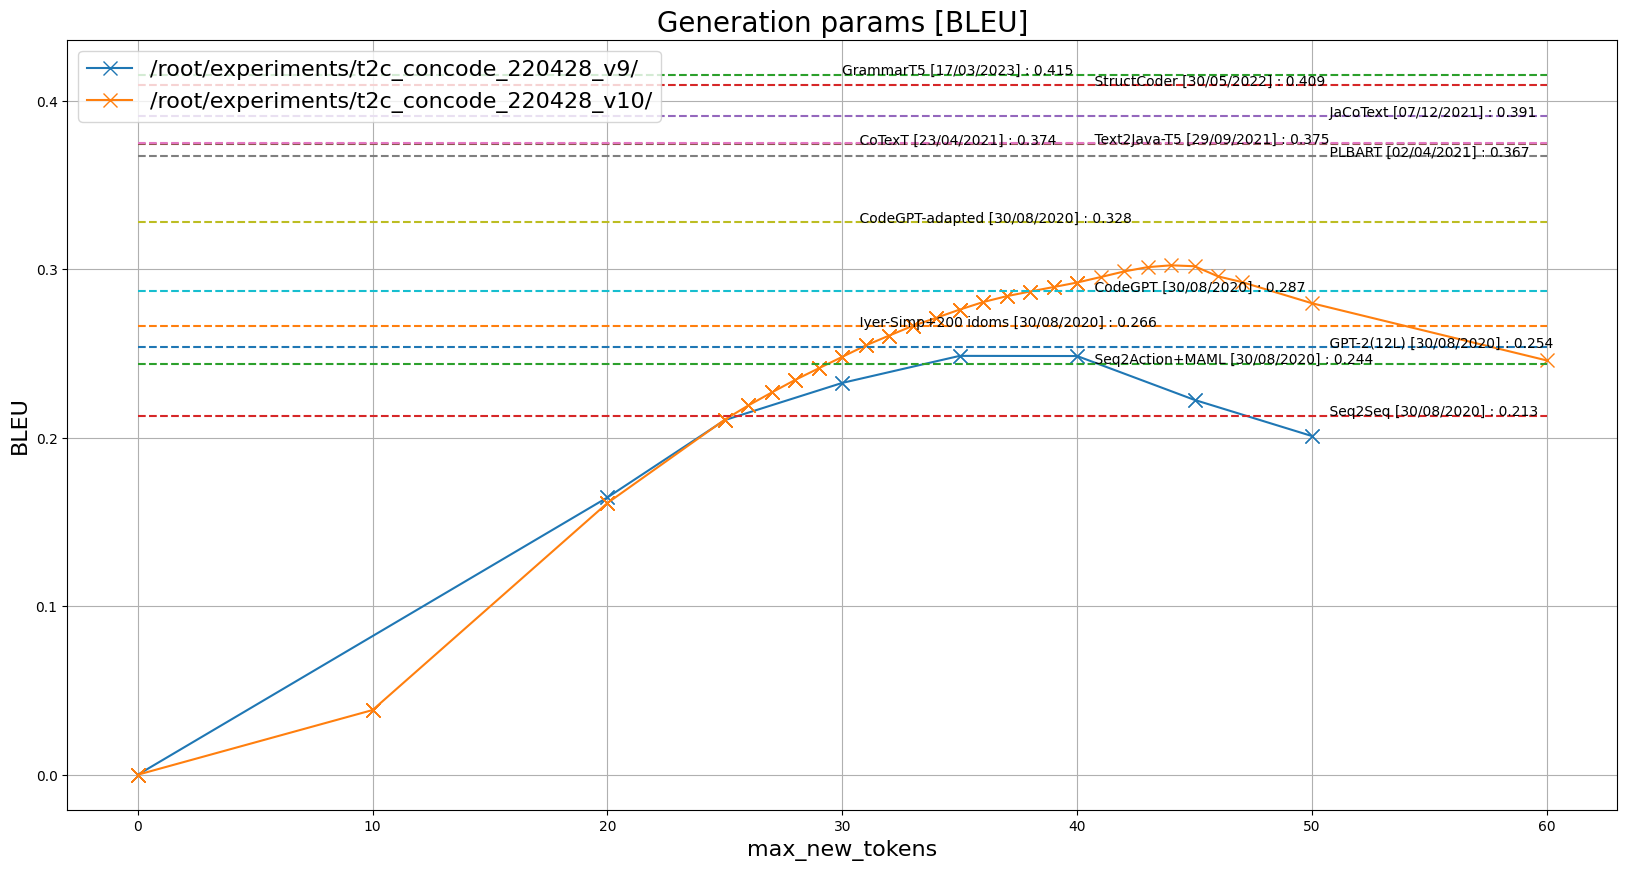

In [39]:
data = {experiment_name: pd.read_csv(experiment_name+"/metrics.csv"),
        "/root/experiments/t2c_concode_220428_v10/": pd.read_csv("/root/experiments/t2c_concode_220428_v10/metrics.csv"
                                                                )
       }
draw_metrics_compare_with_glue(data)

TypeError: unhashable type: 'list'

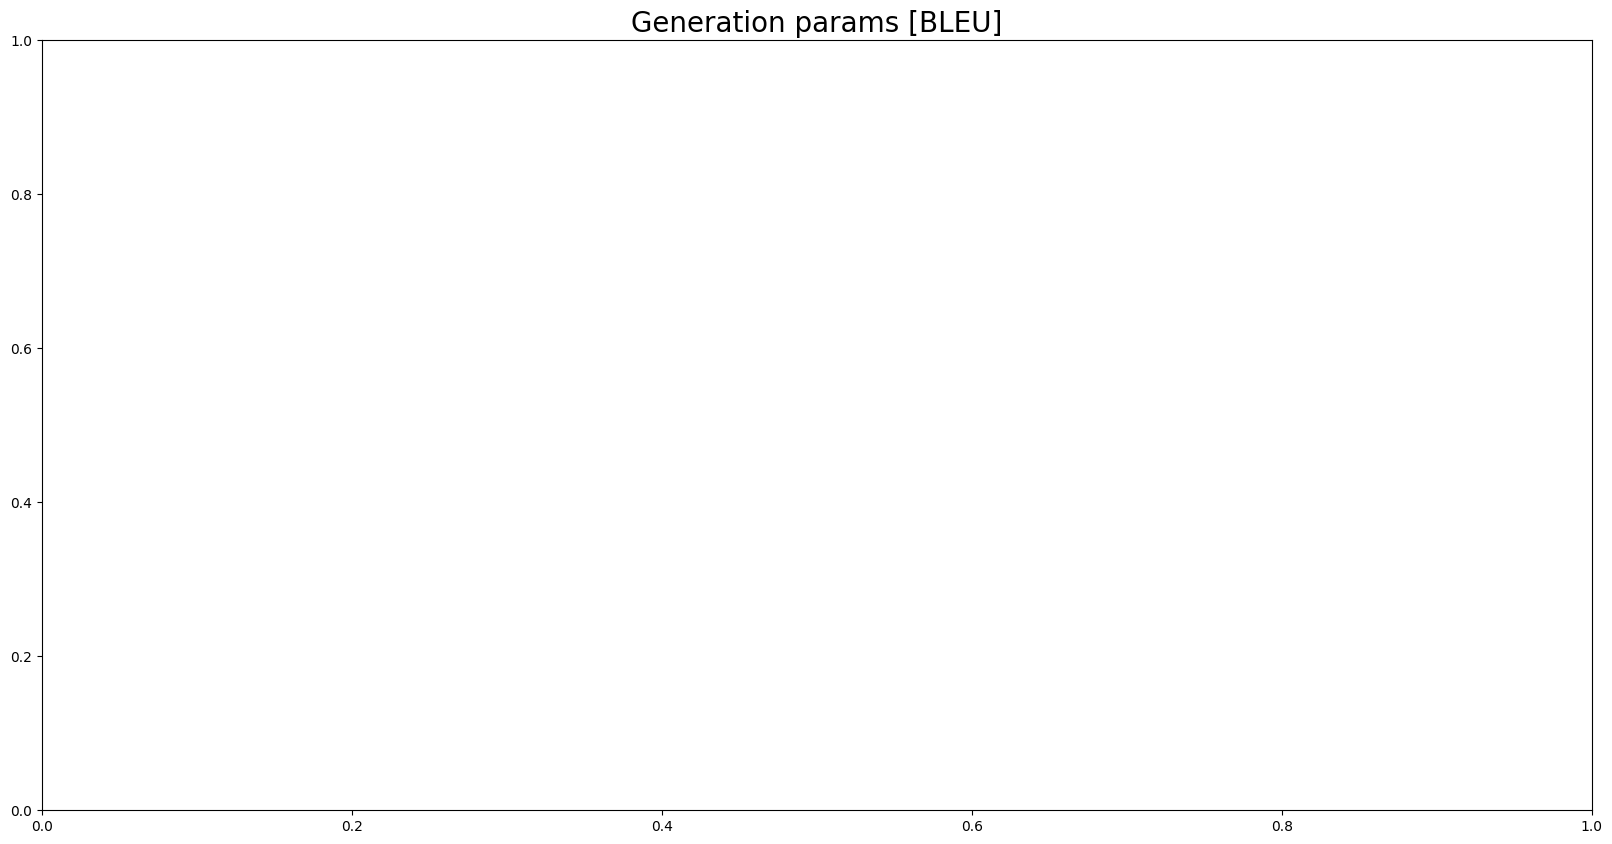

28 28 28


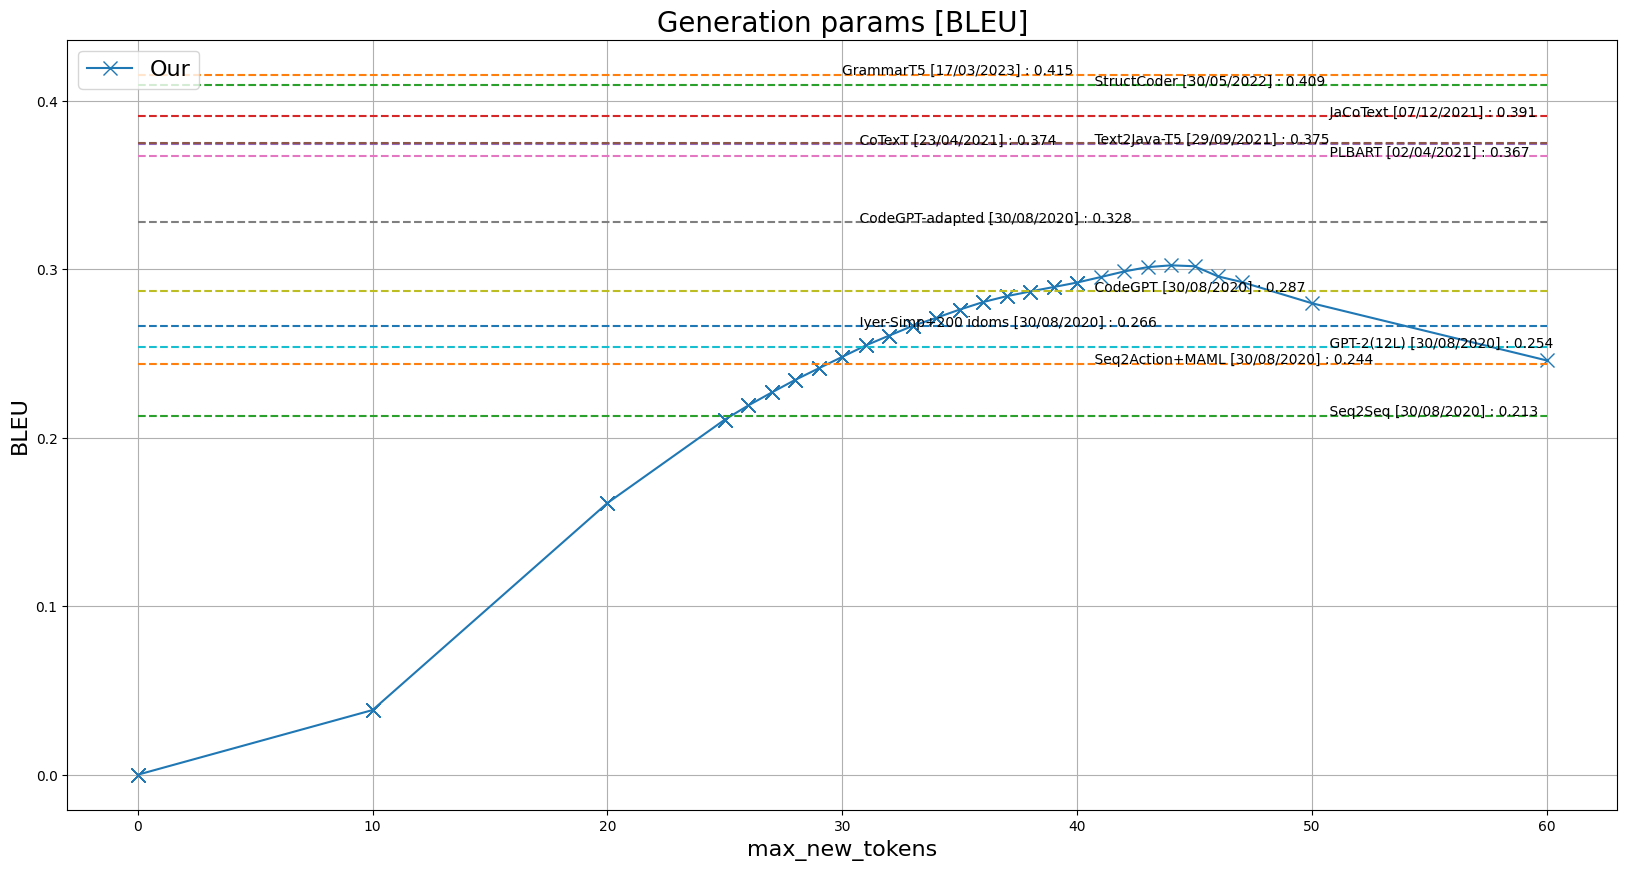

In [89]:
draw_metrics_compare_with_glue(data)

28 3 28


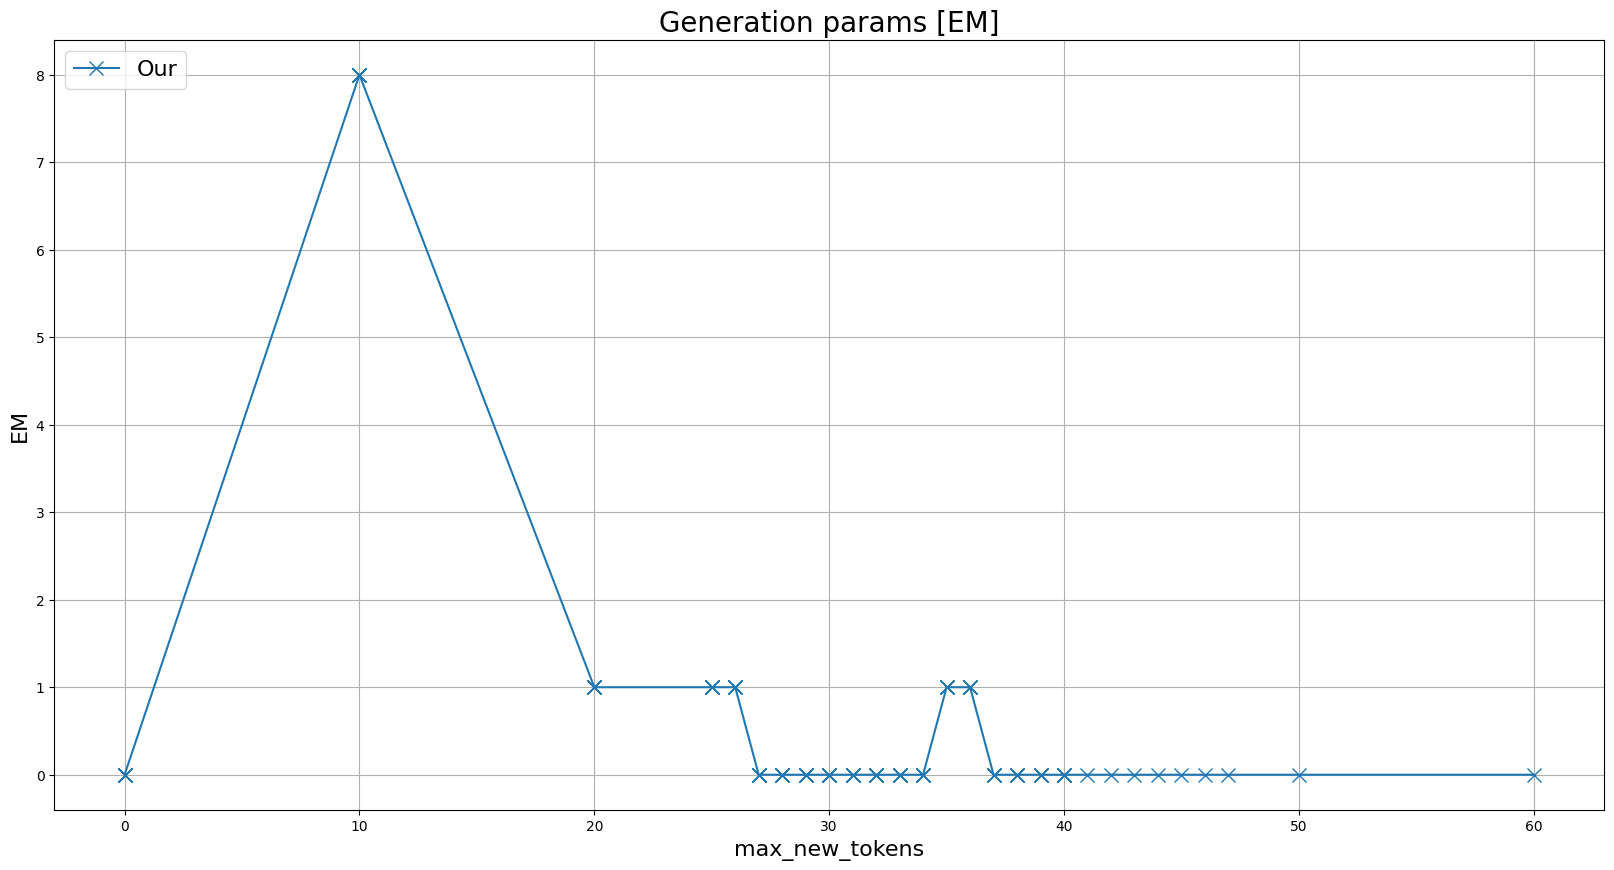

28 28 28


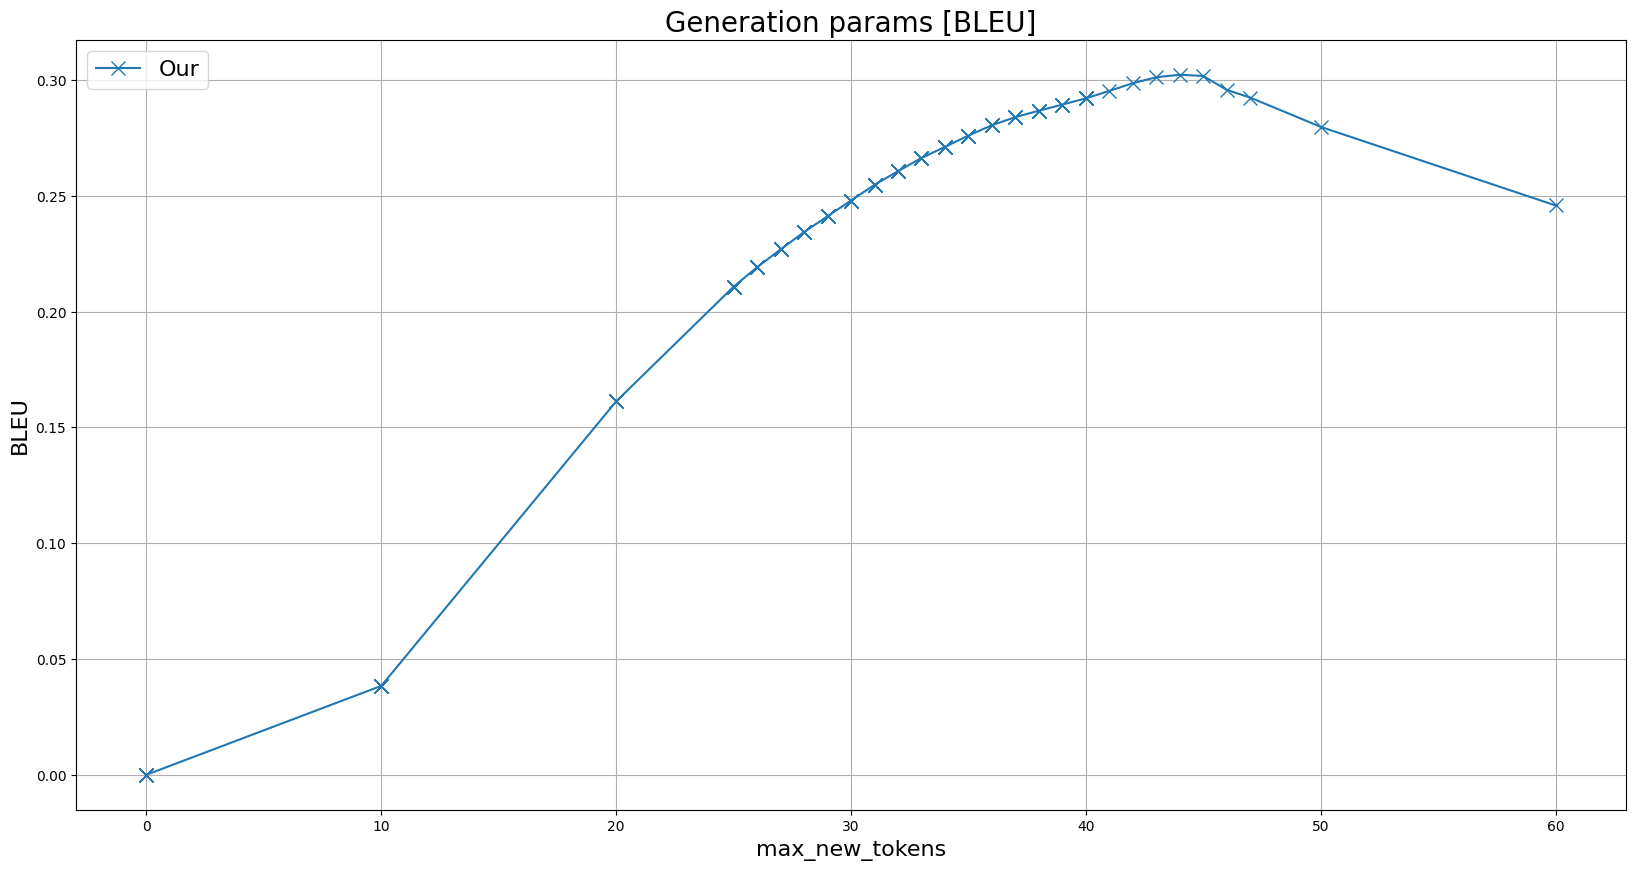

28 24 28


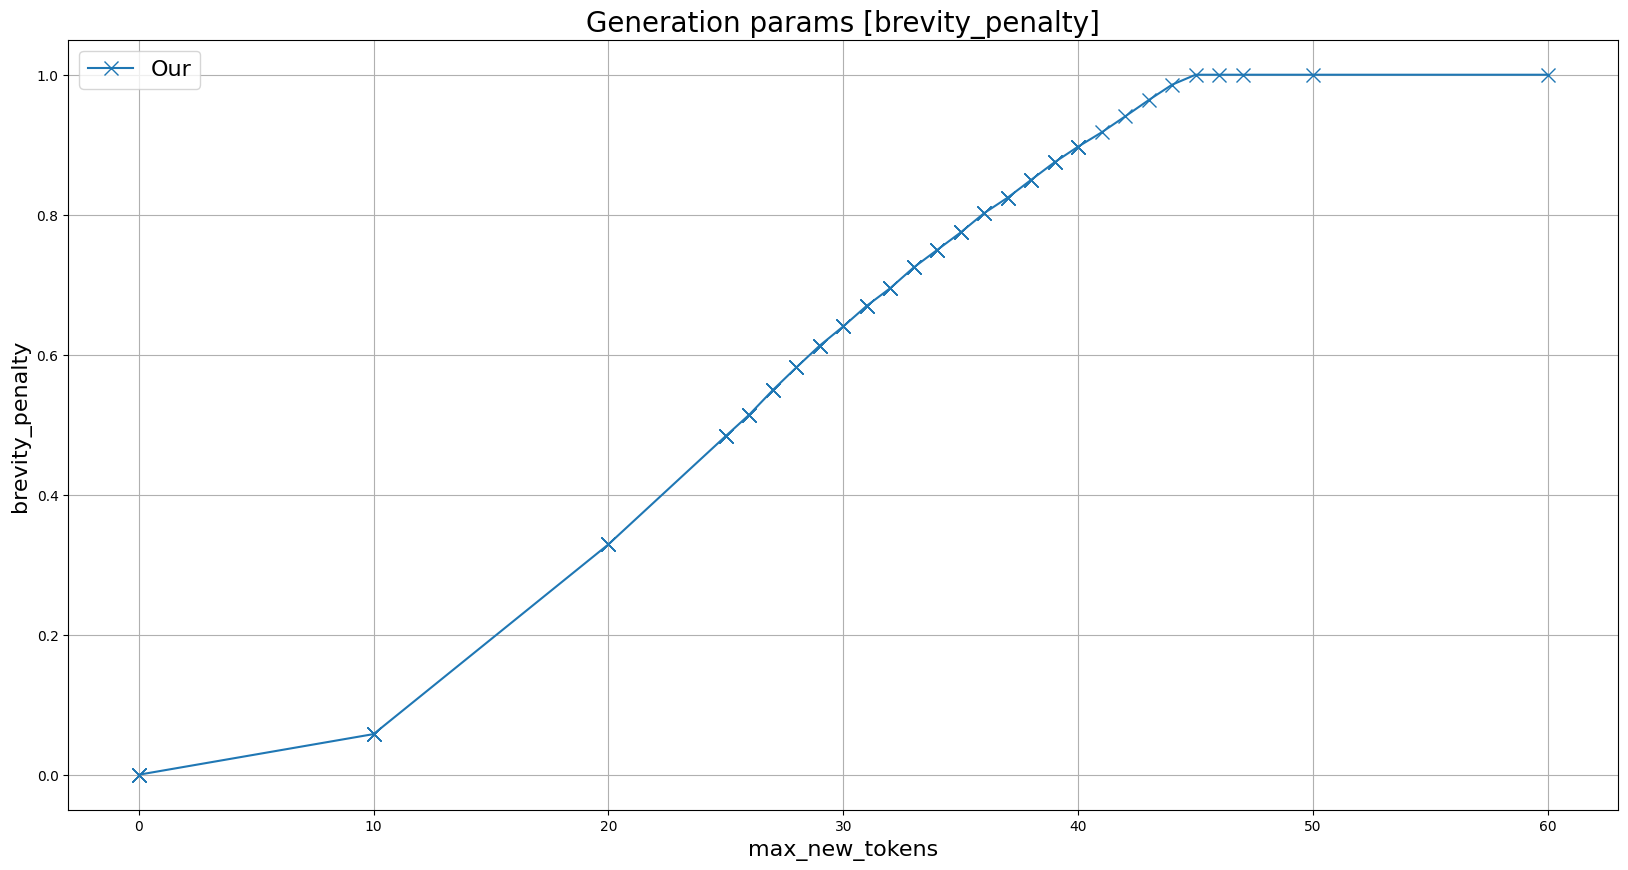

28 28 28


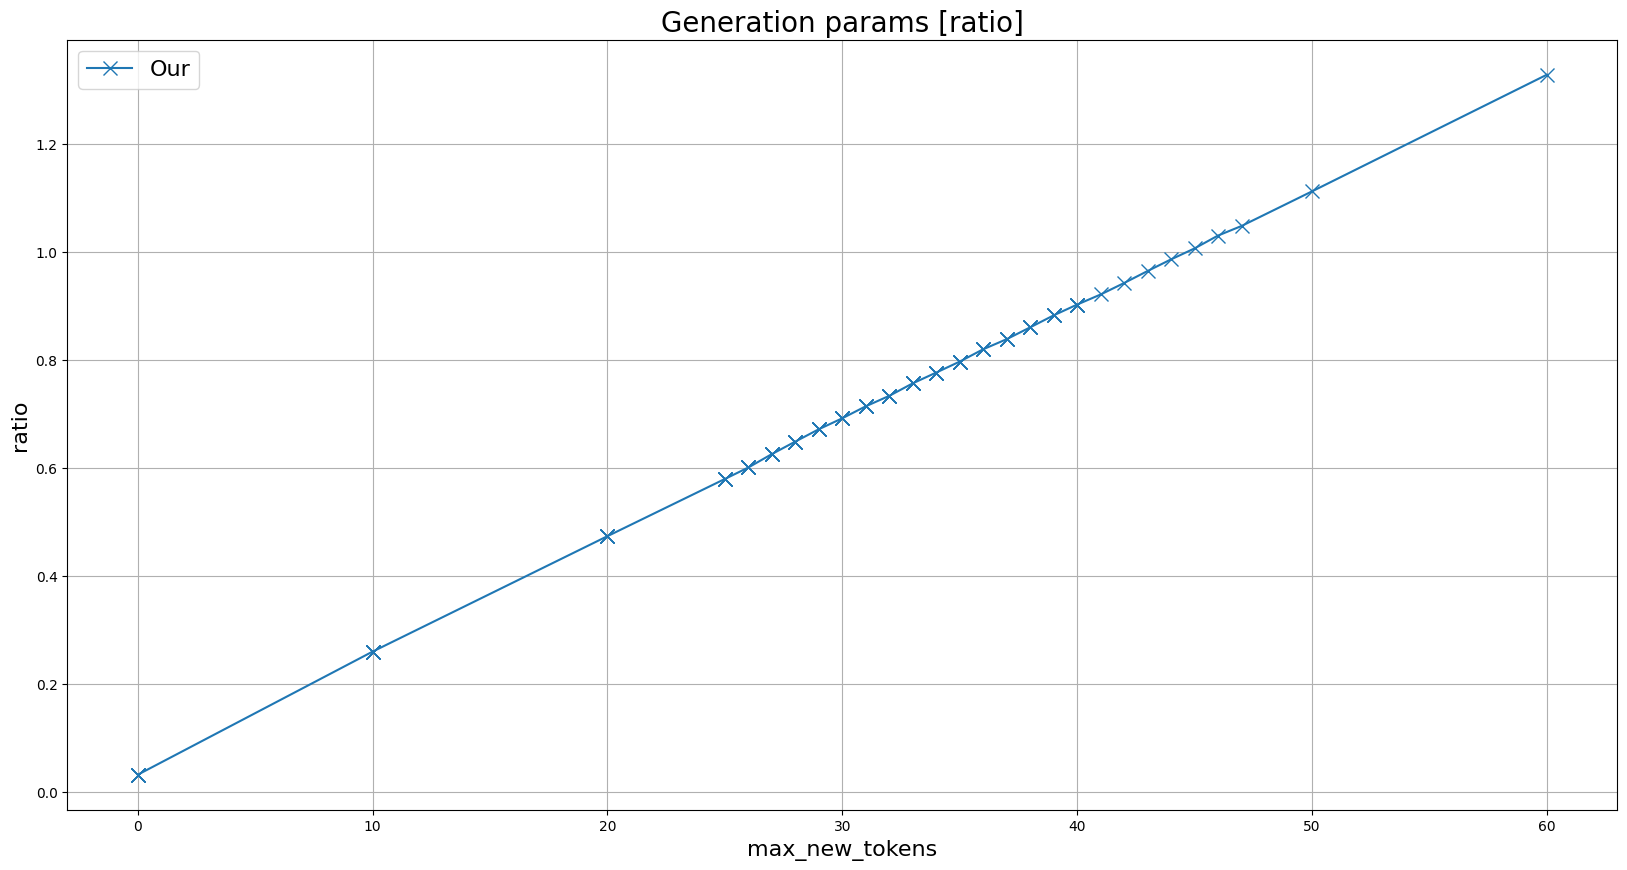

28 28 28


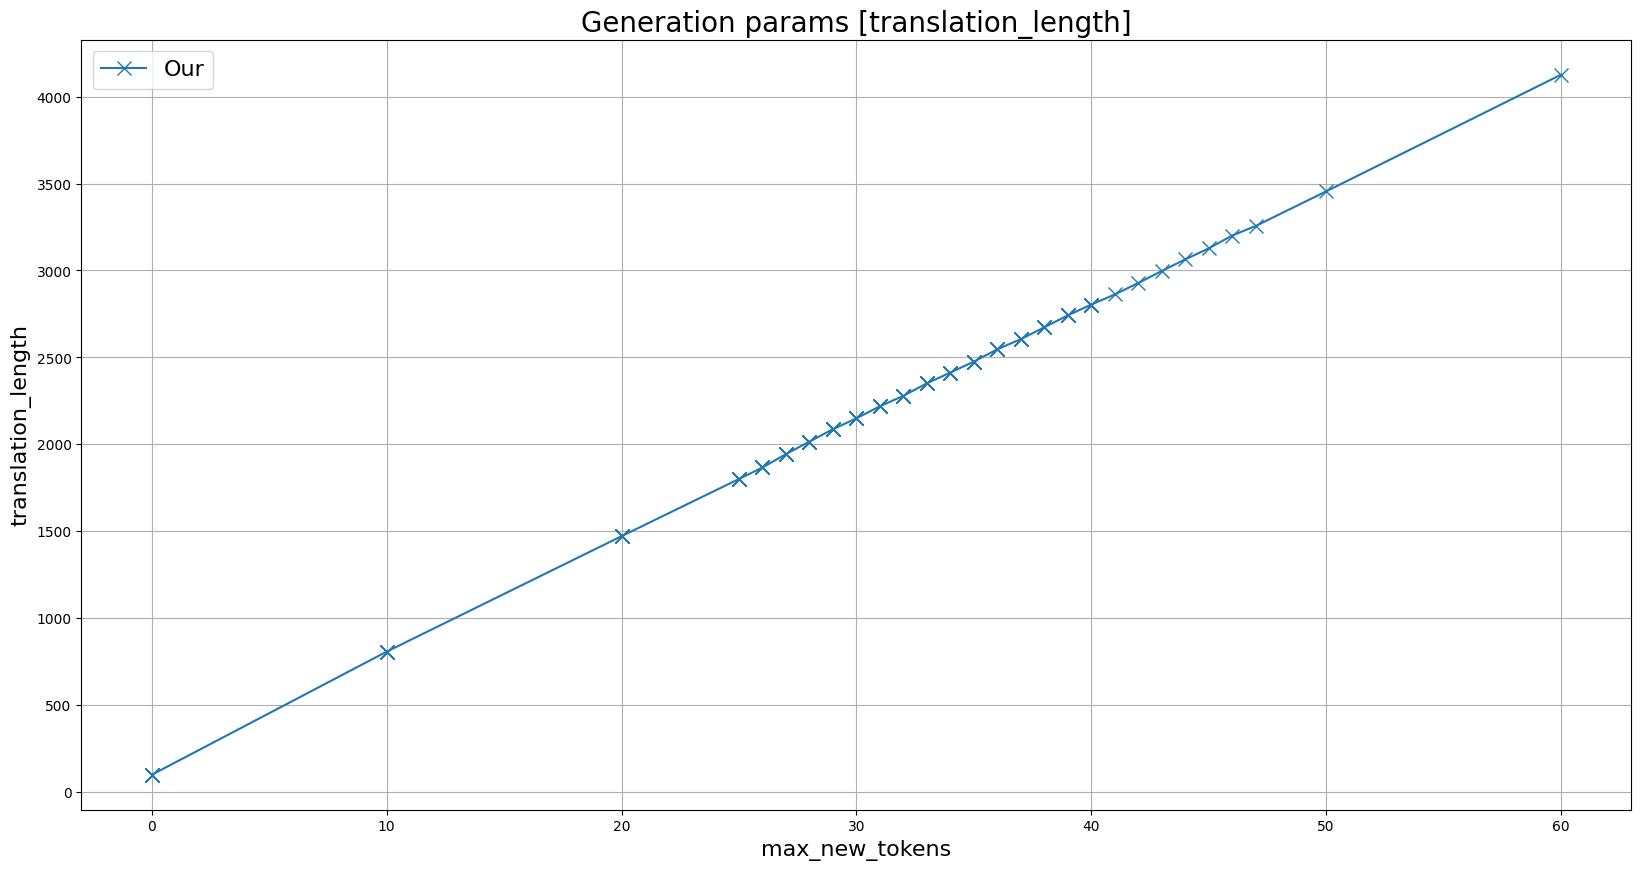

28 1 28


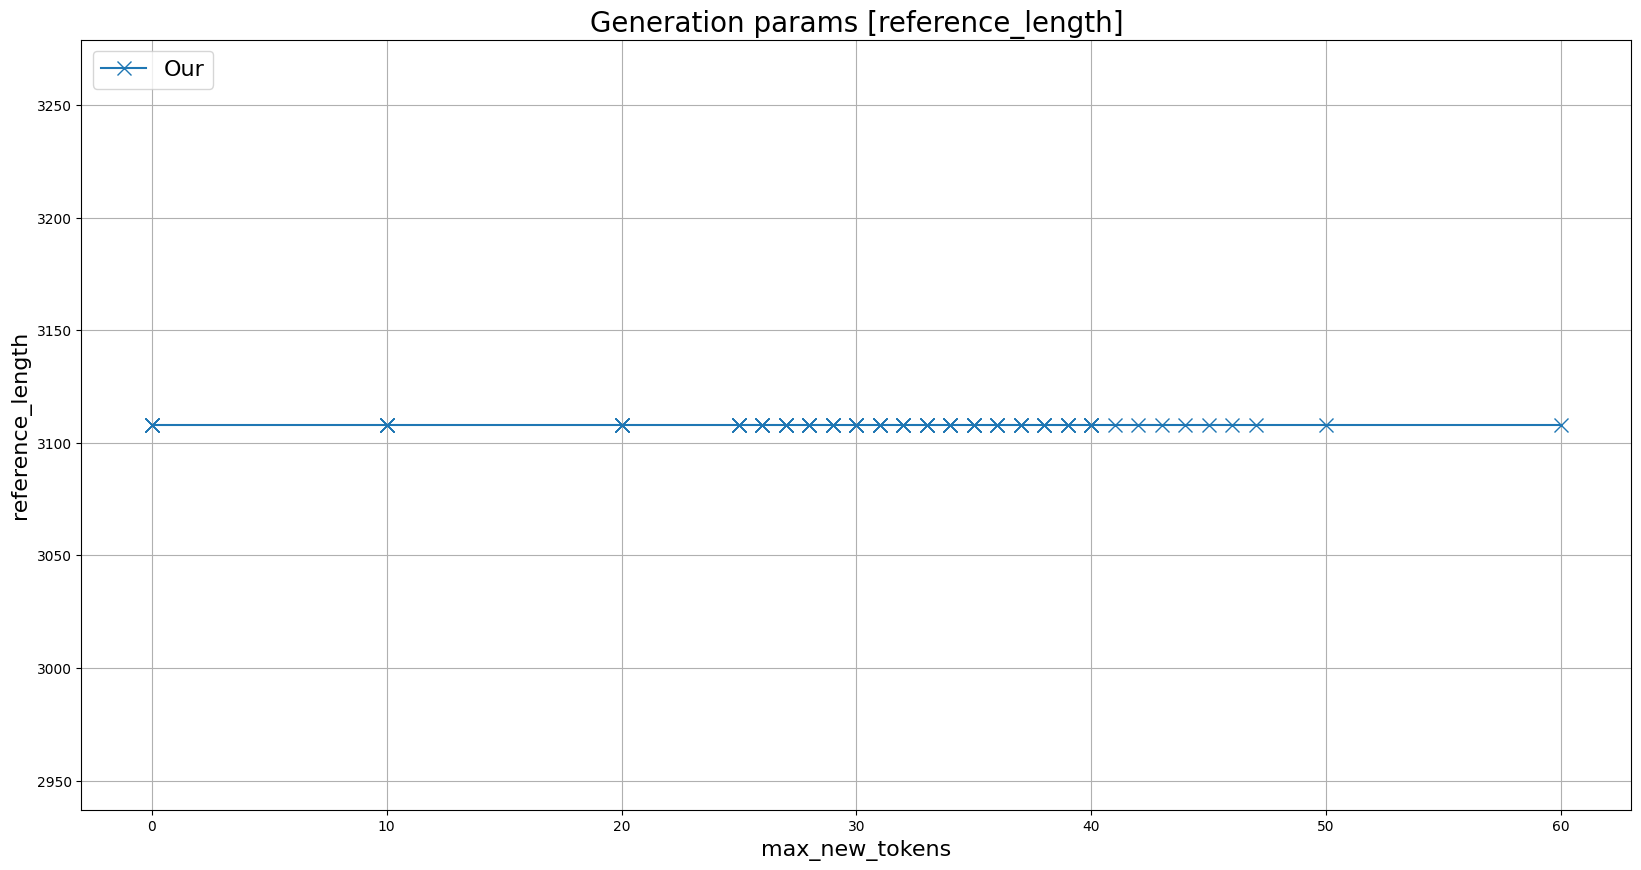

28 28 28


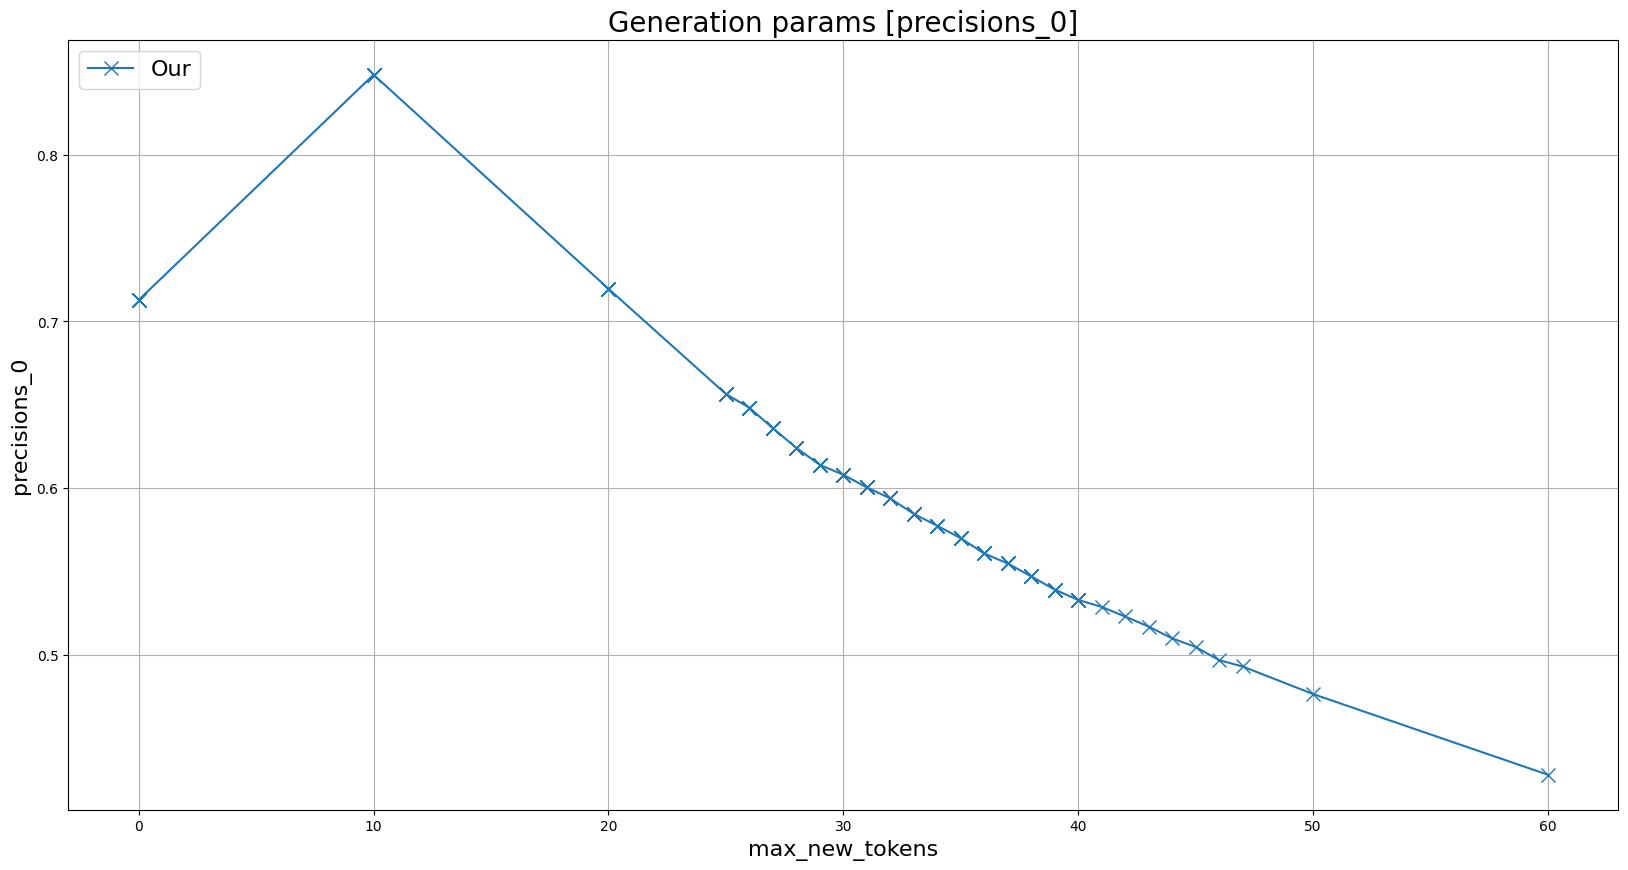

28 28 28


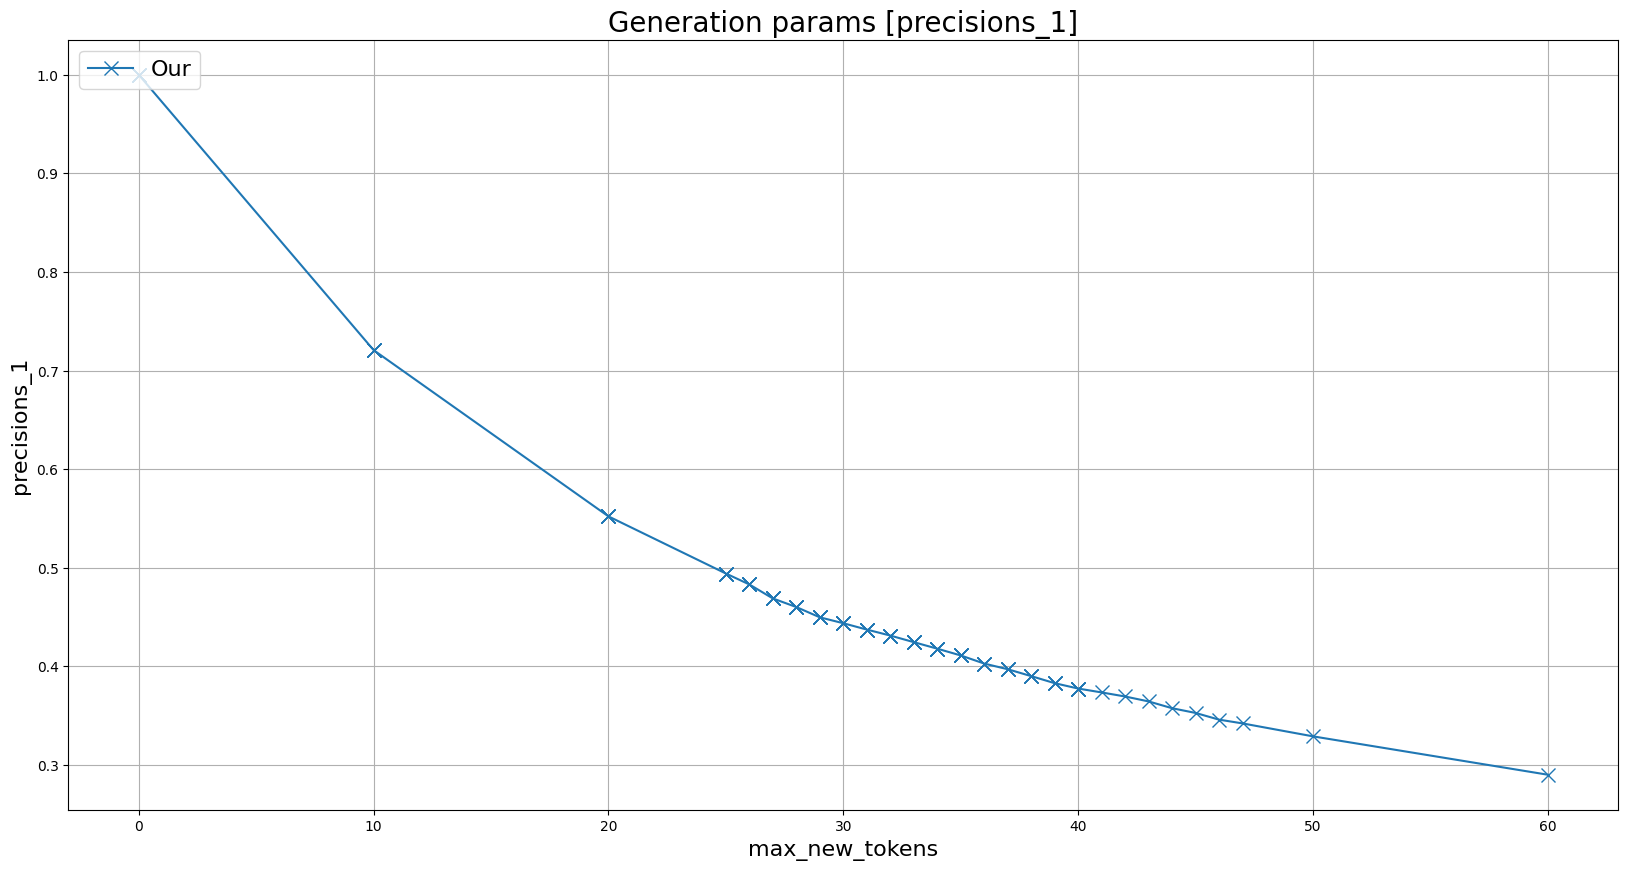

28 28 28


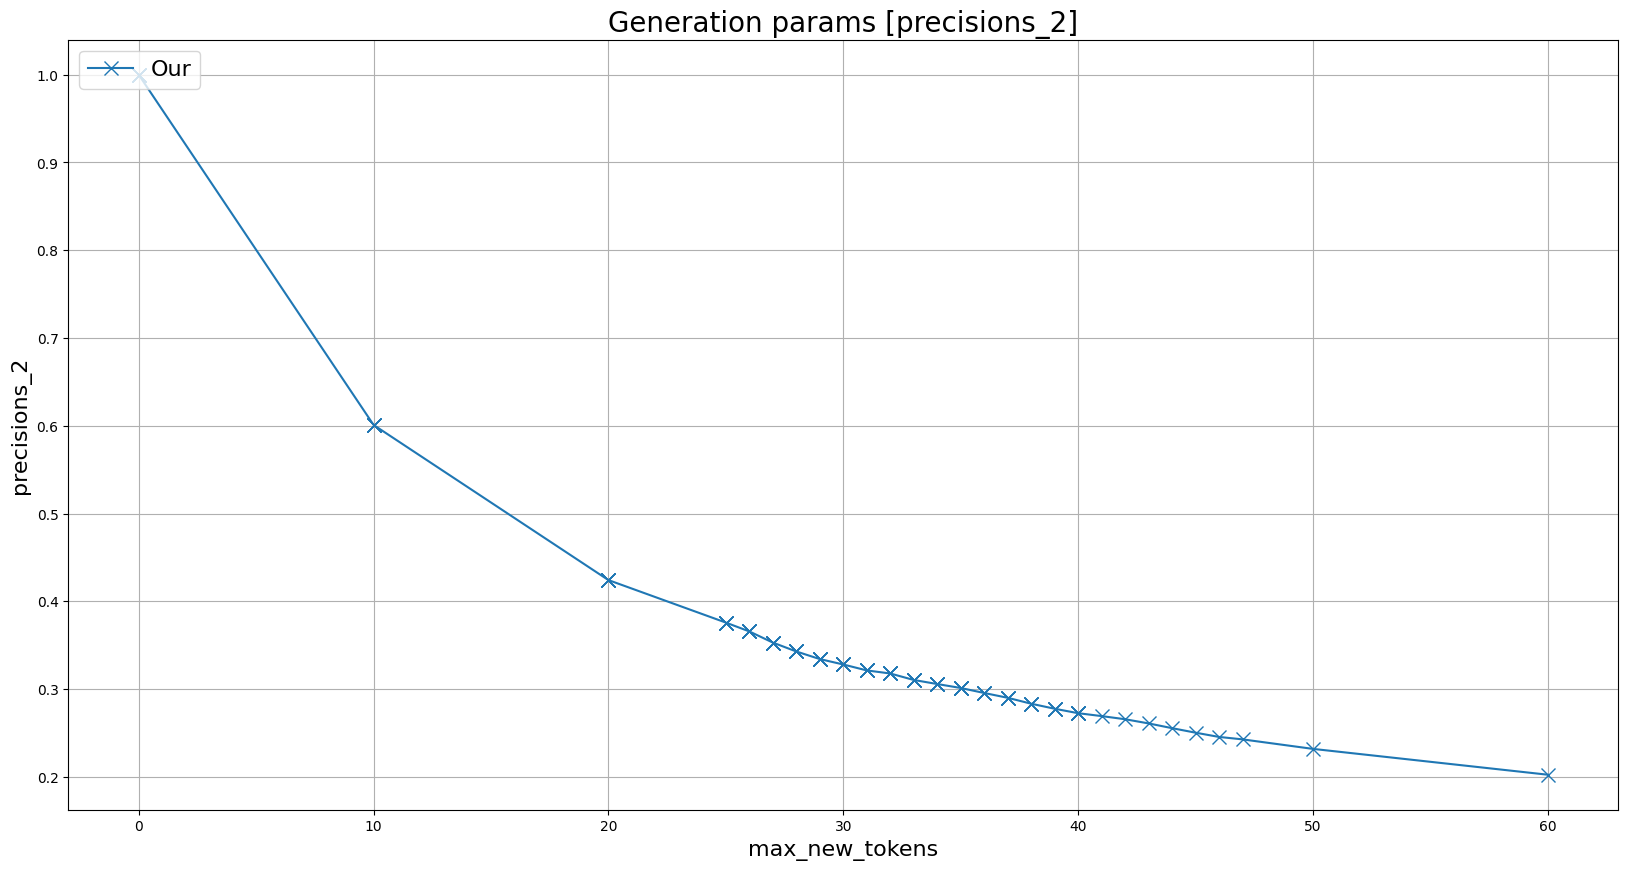

28 28 28


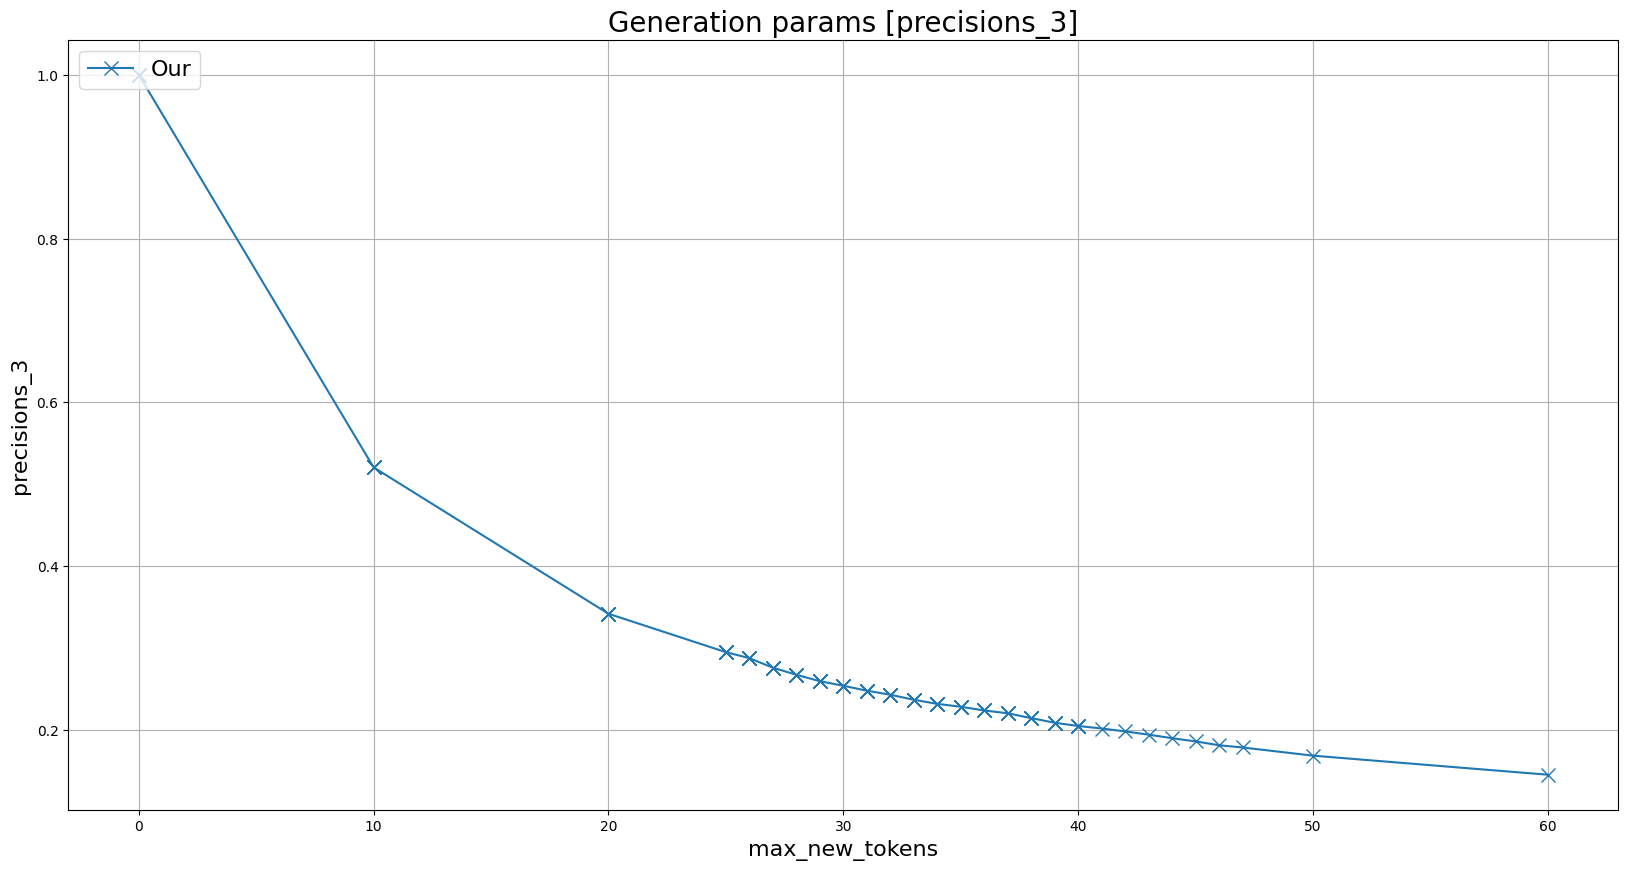

In [99]:
draw_all_metrics(data, param_name="max_new_tokens")

28 3 28


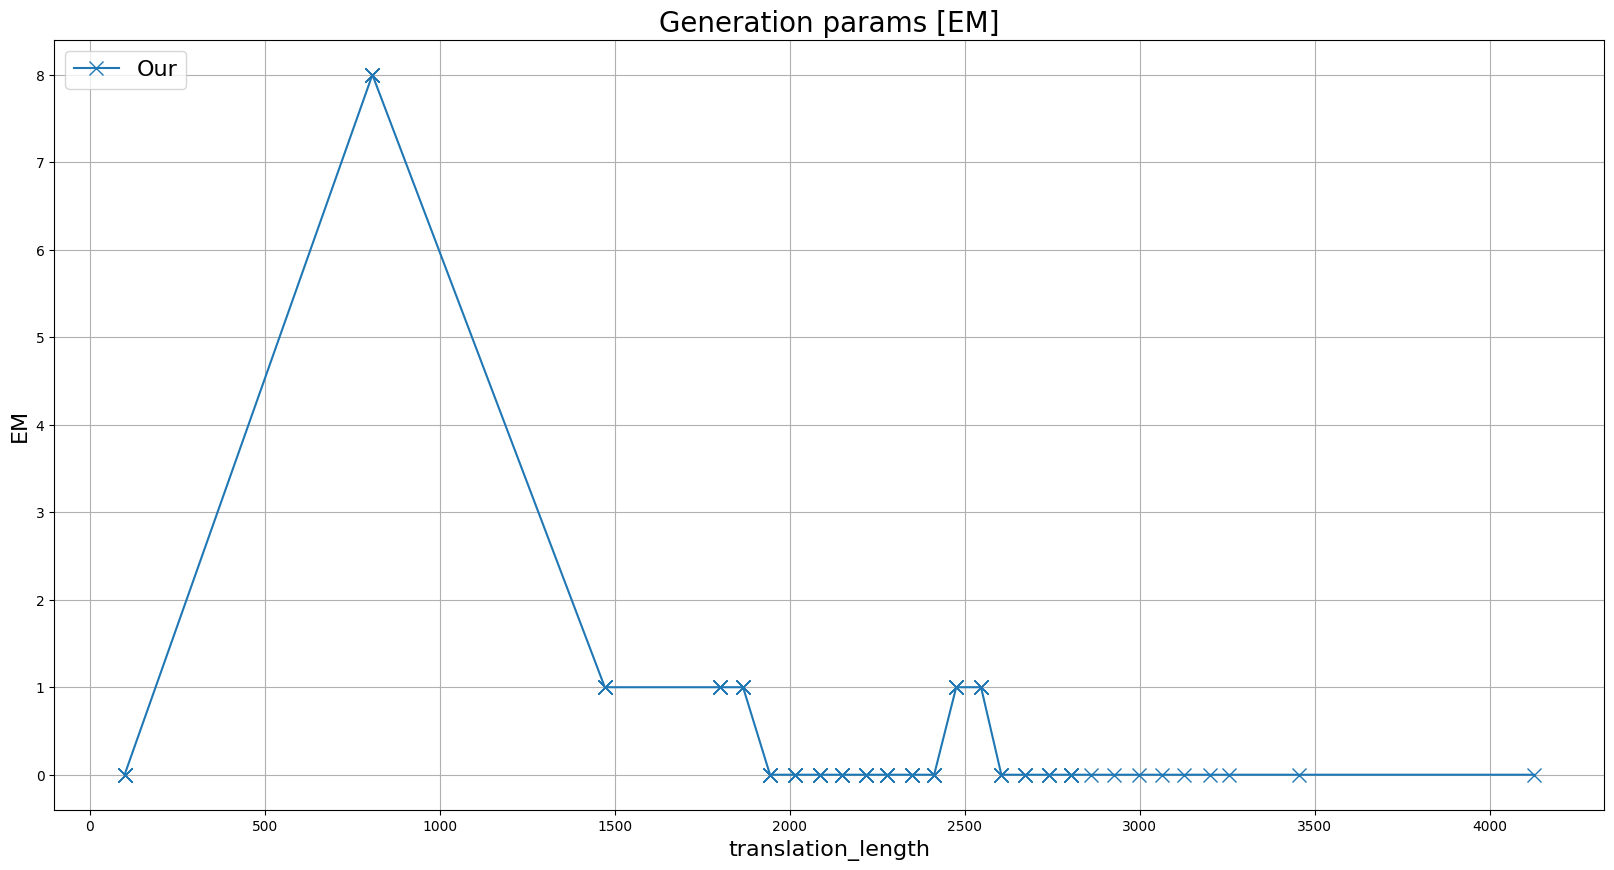

28 28 28


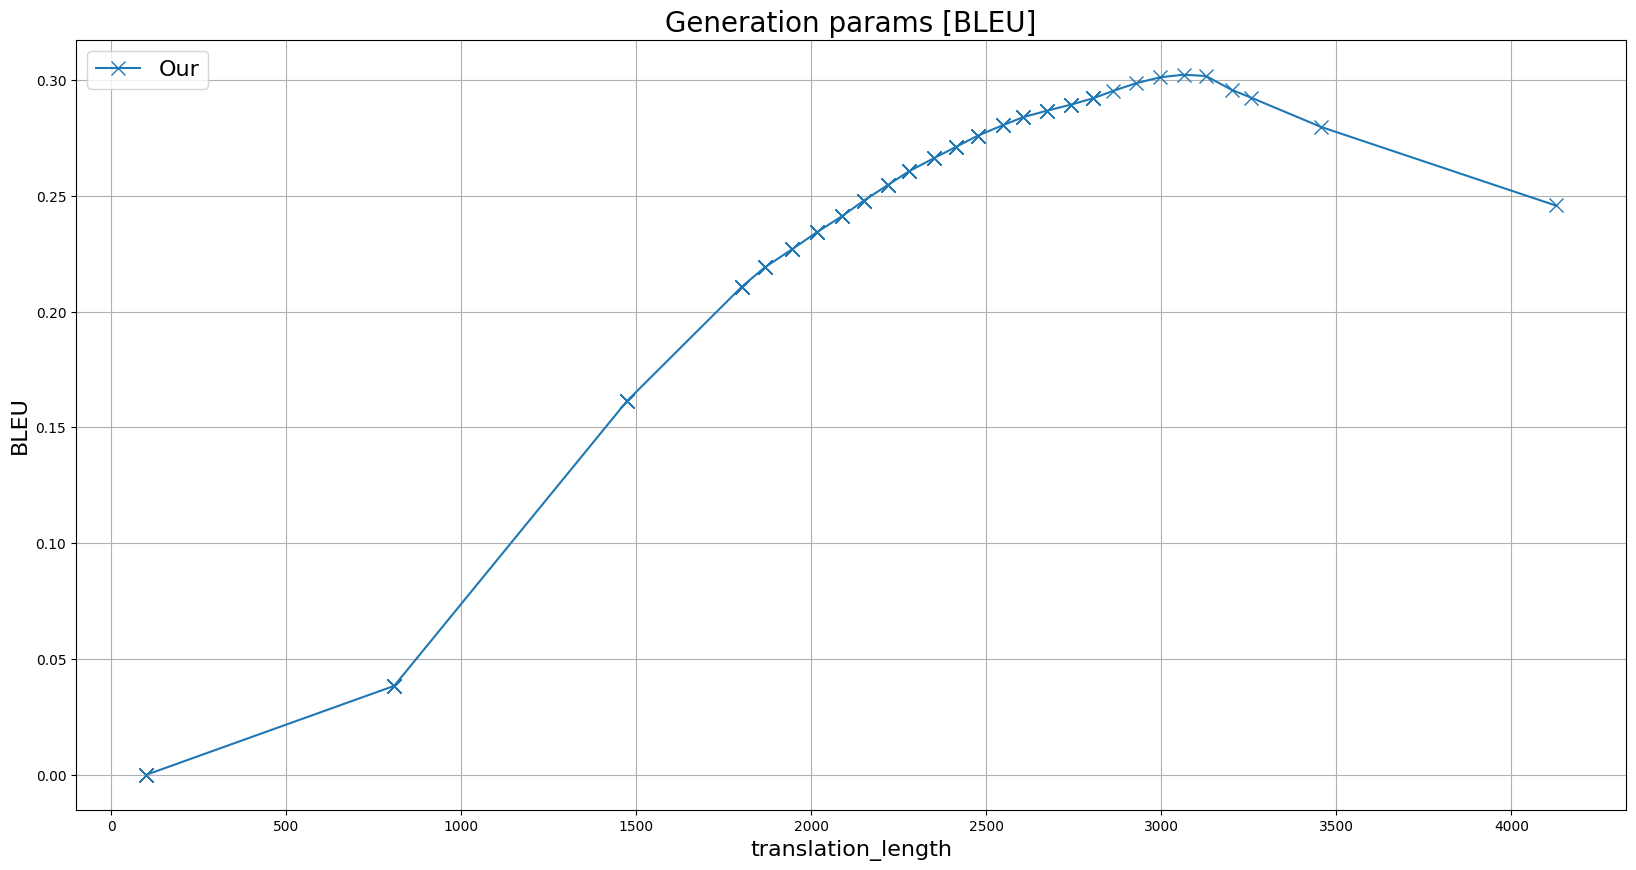

28 24 28


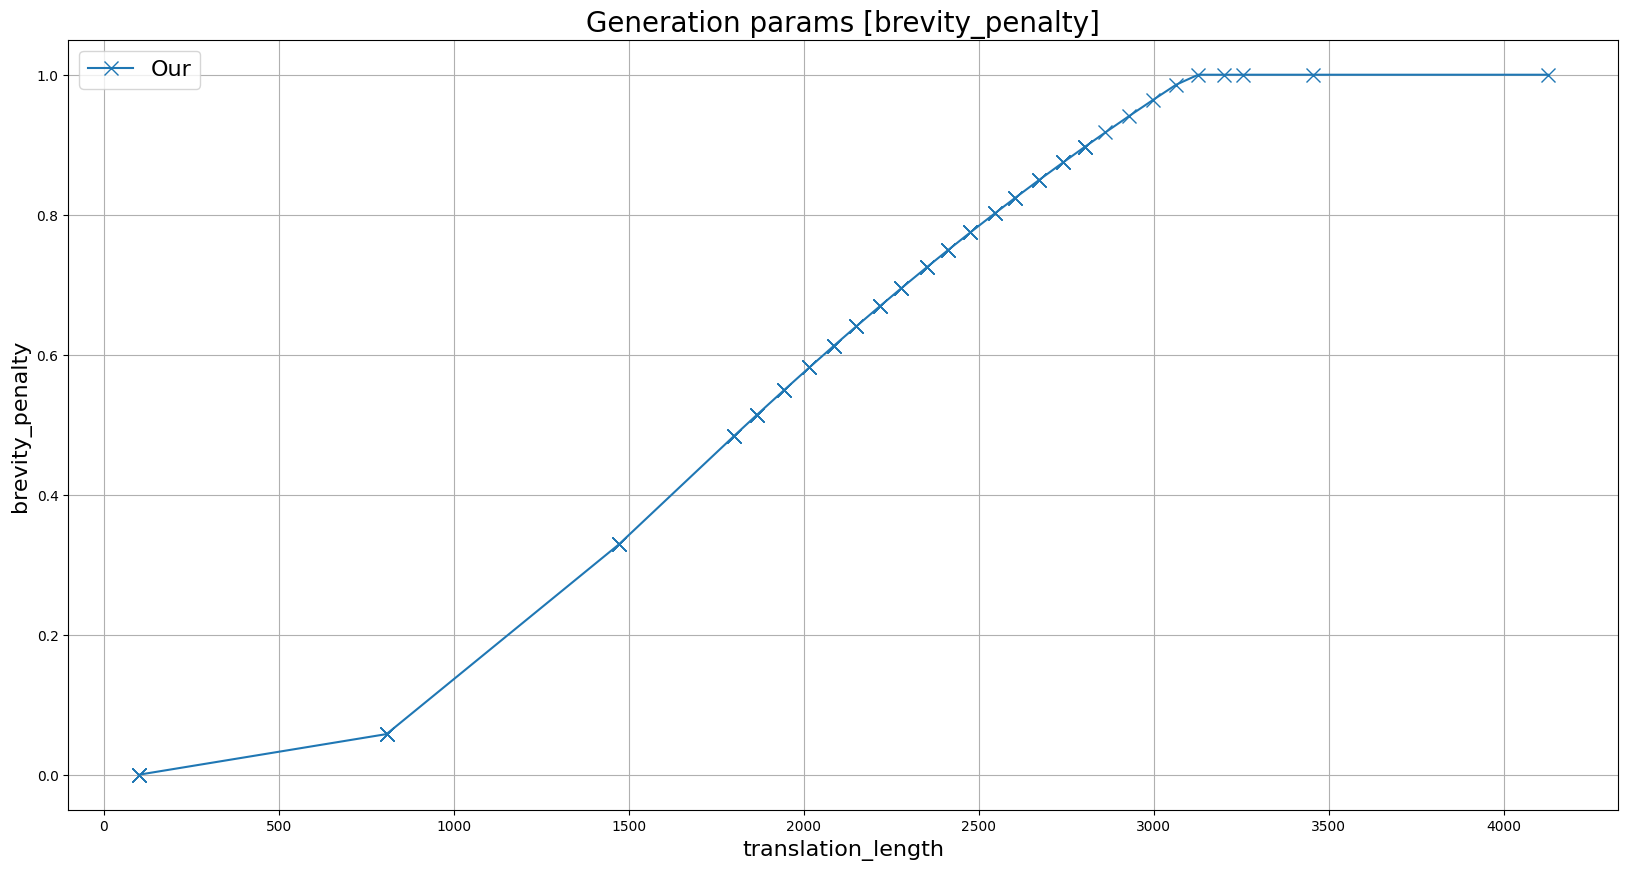

28 28 28


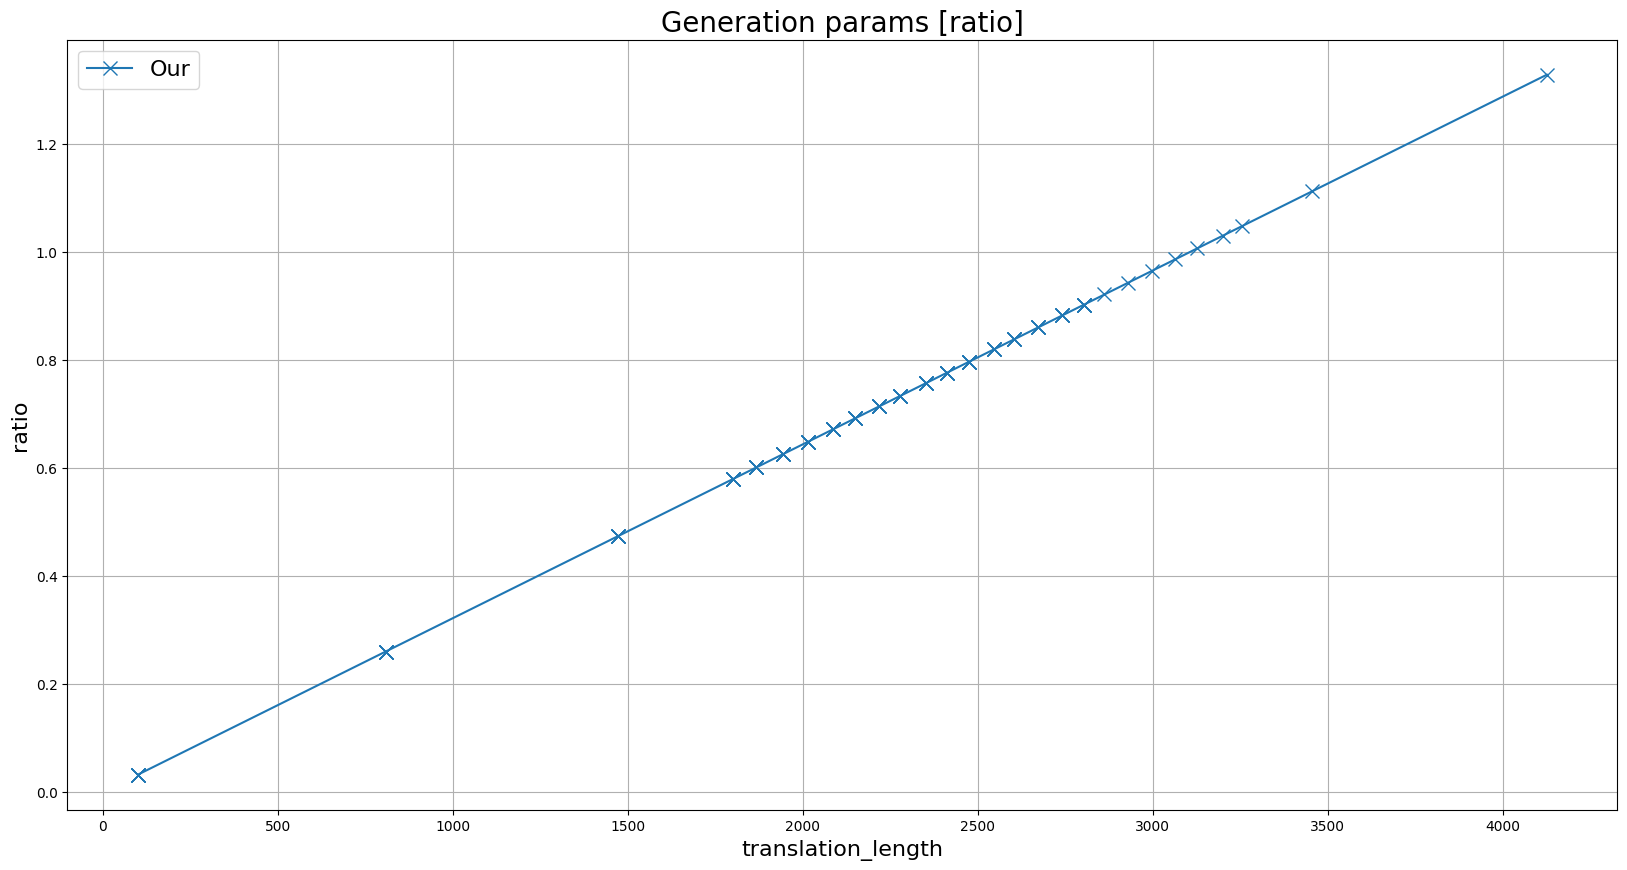

28 1 28


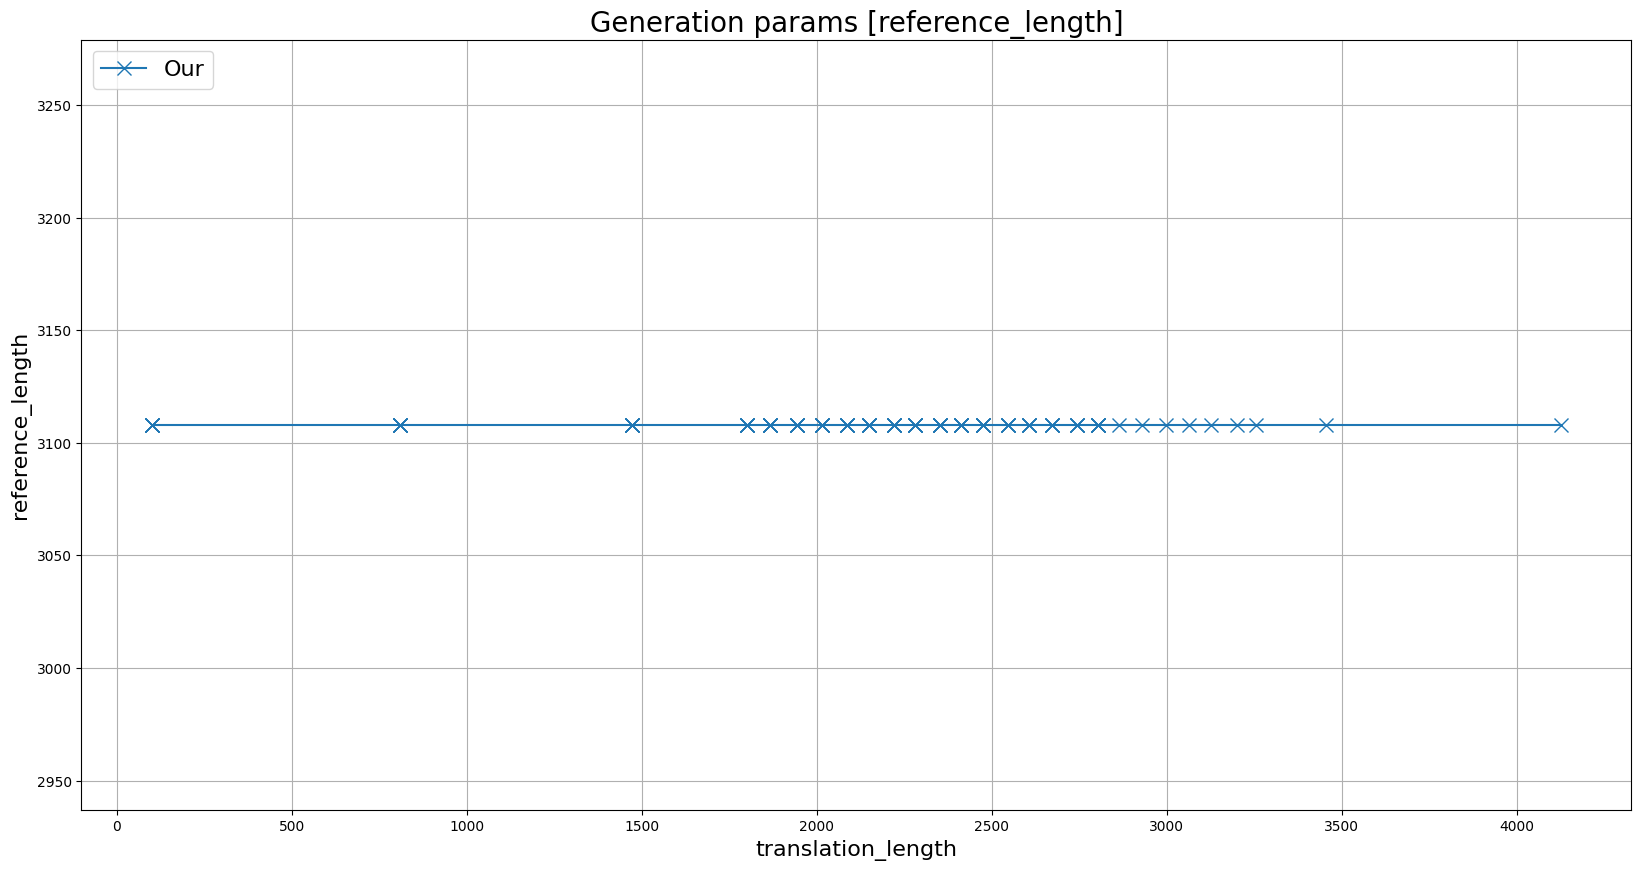

28 28 28


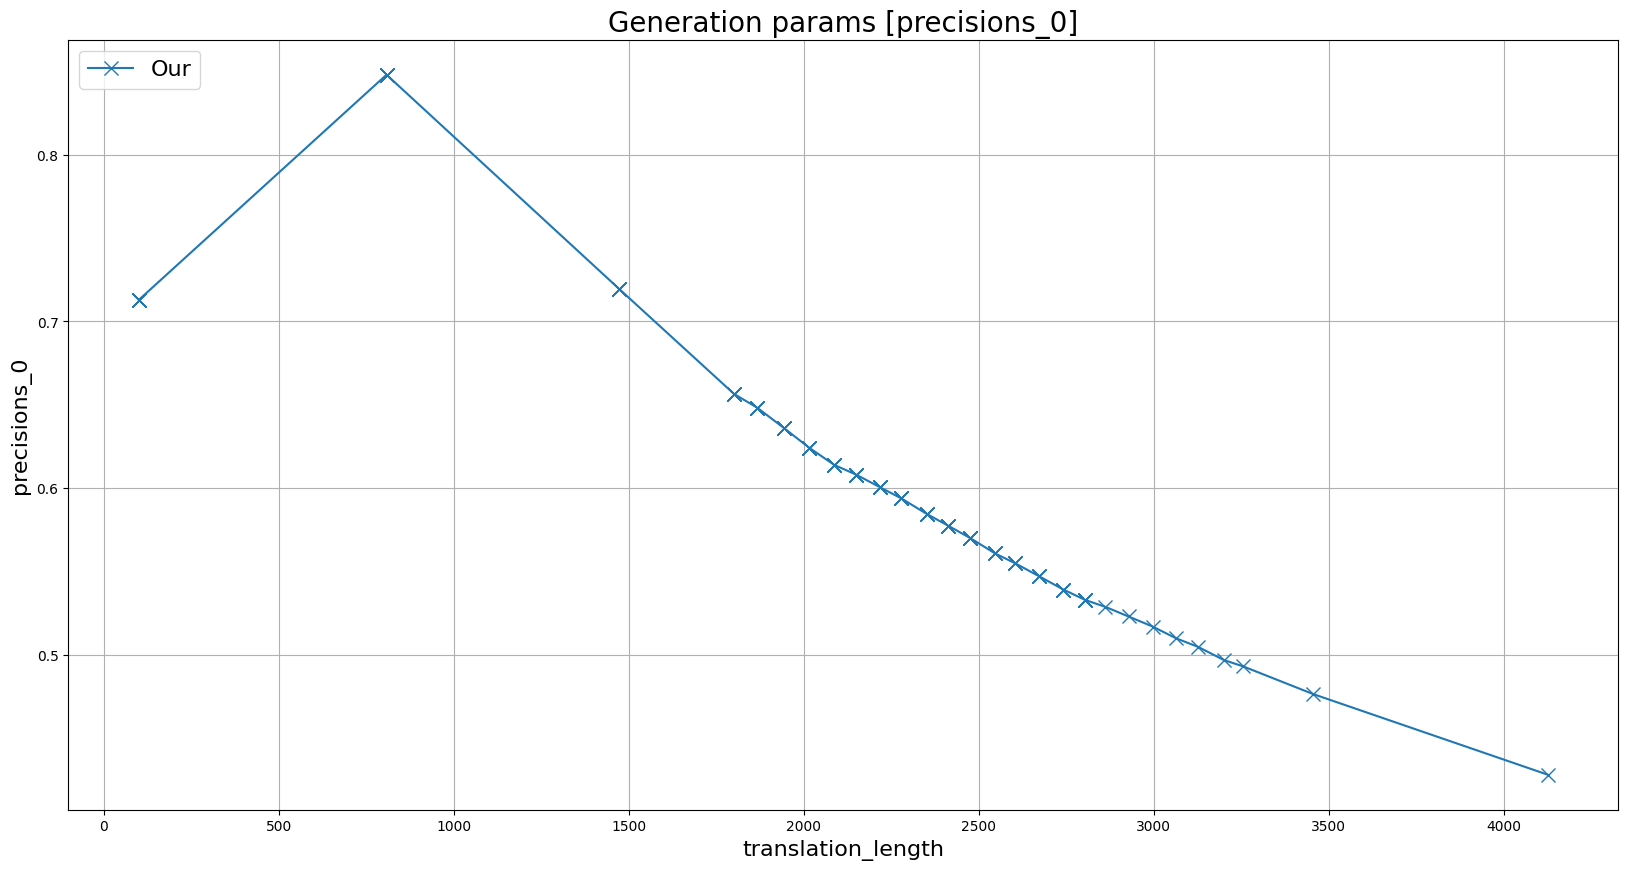

28 28 28


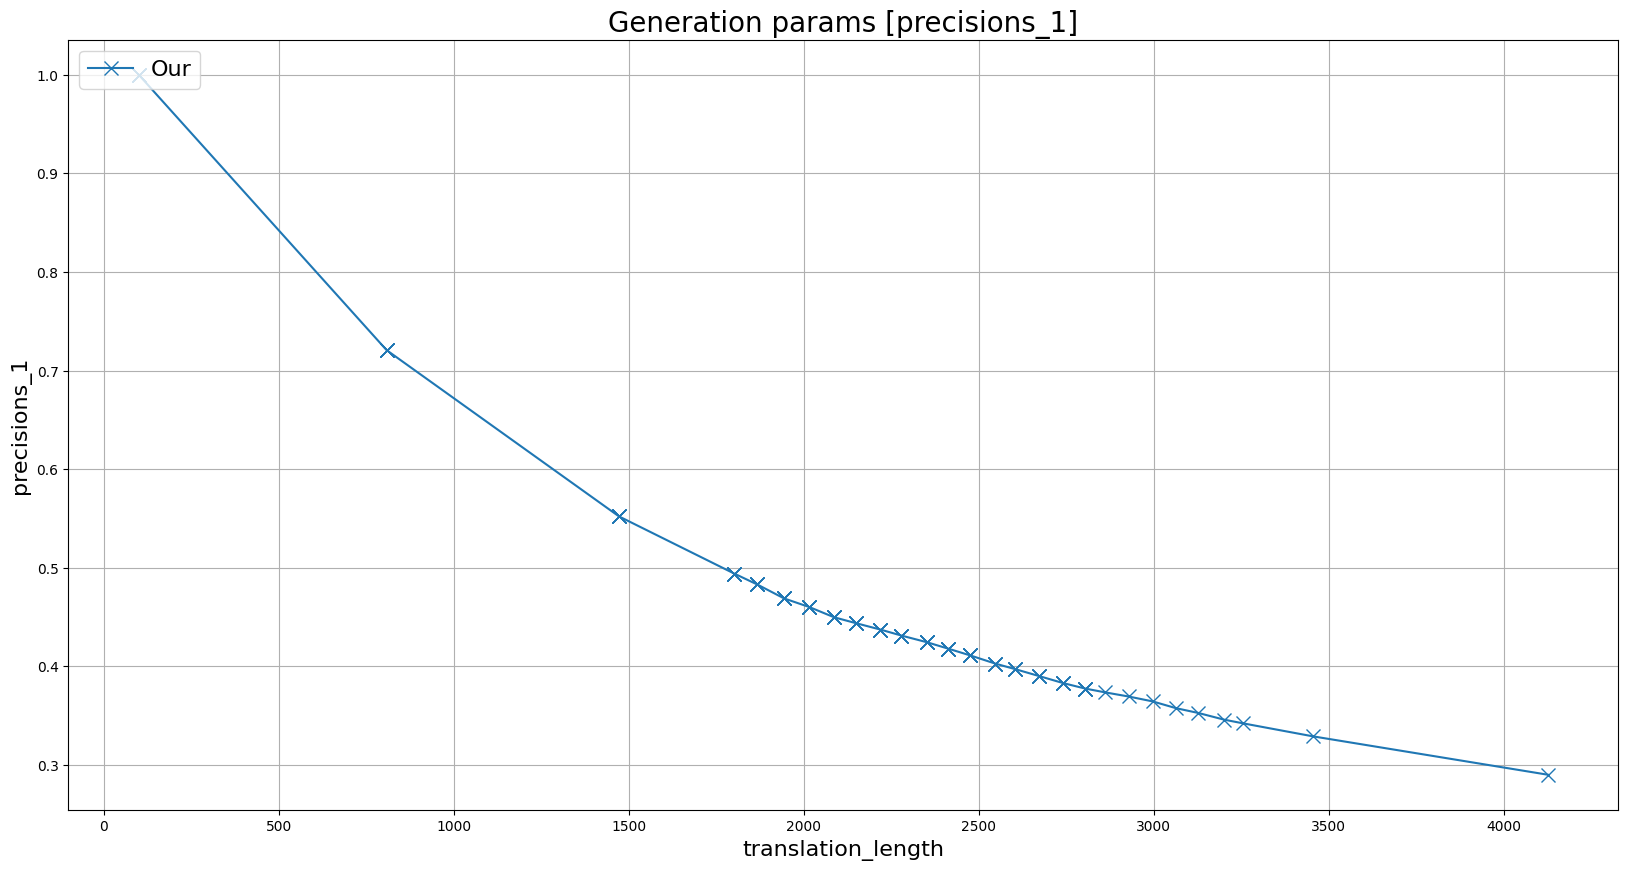

28 28 28


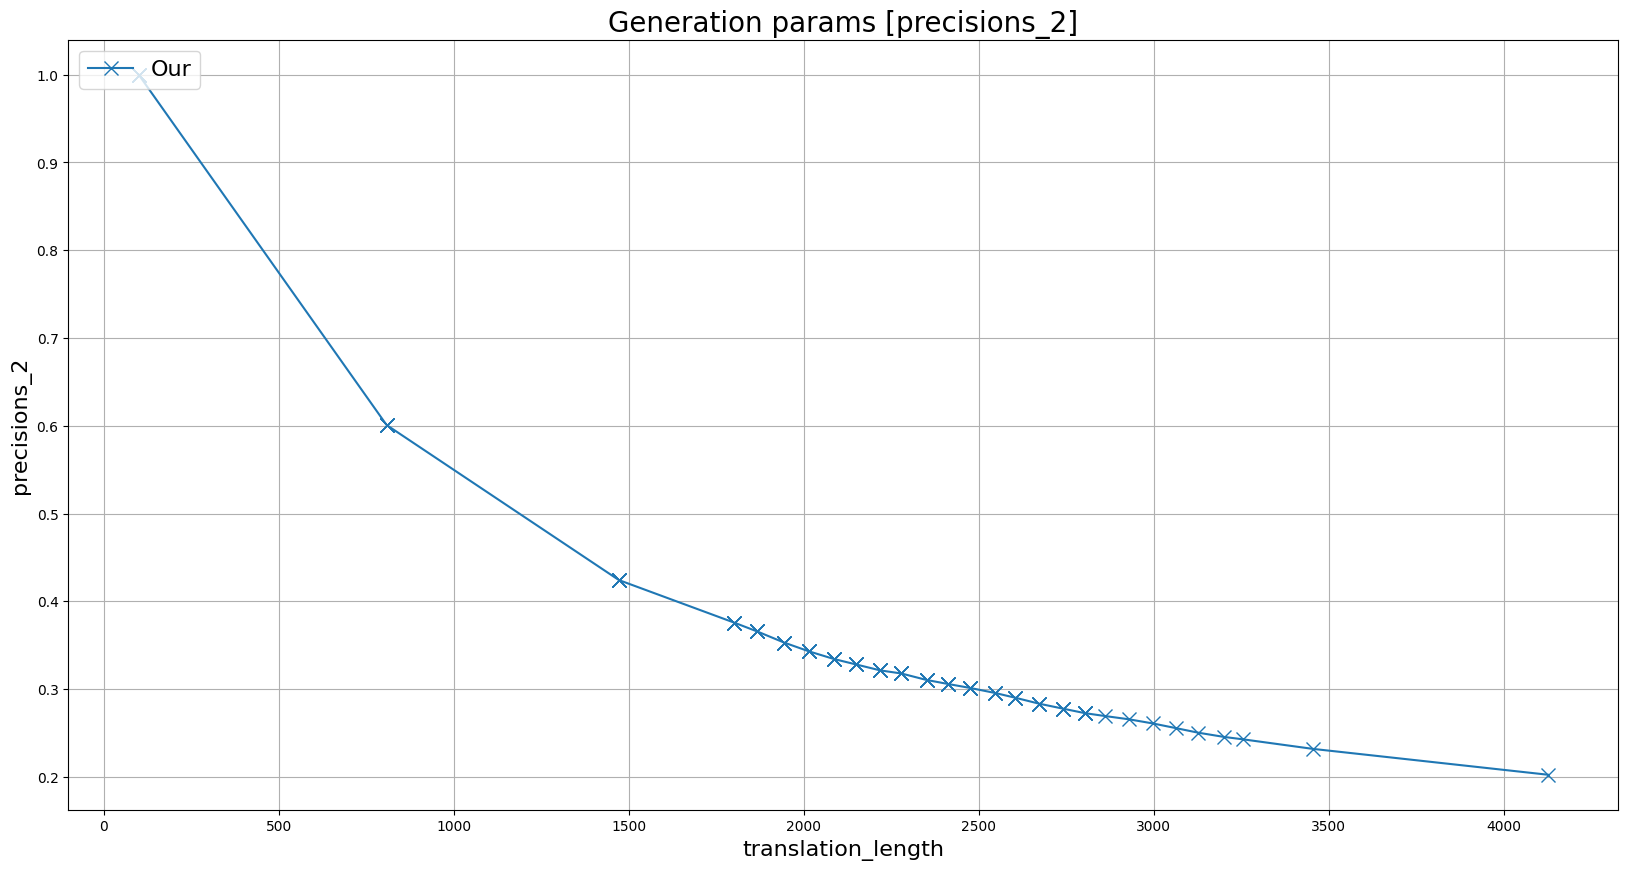

28 28 28


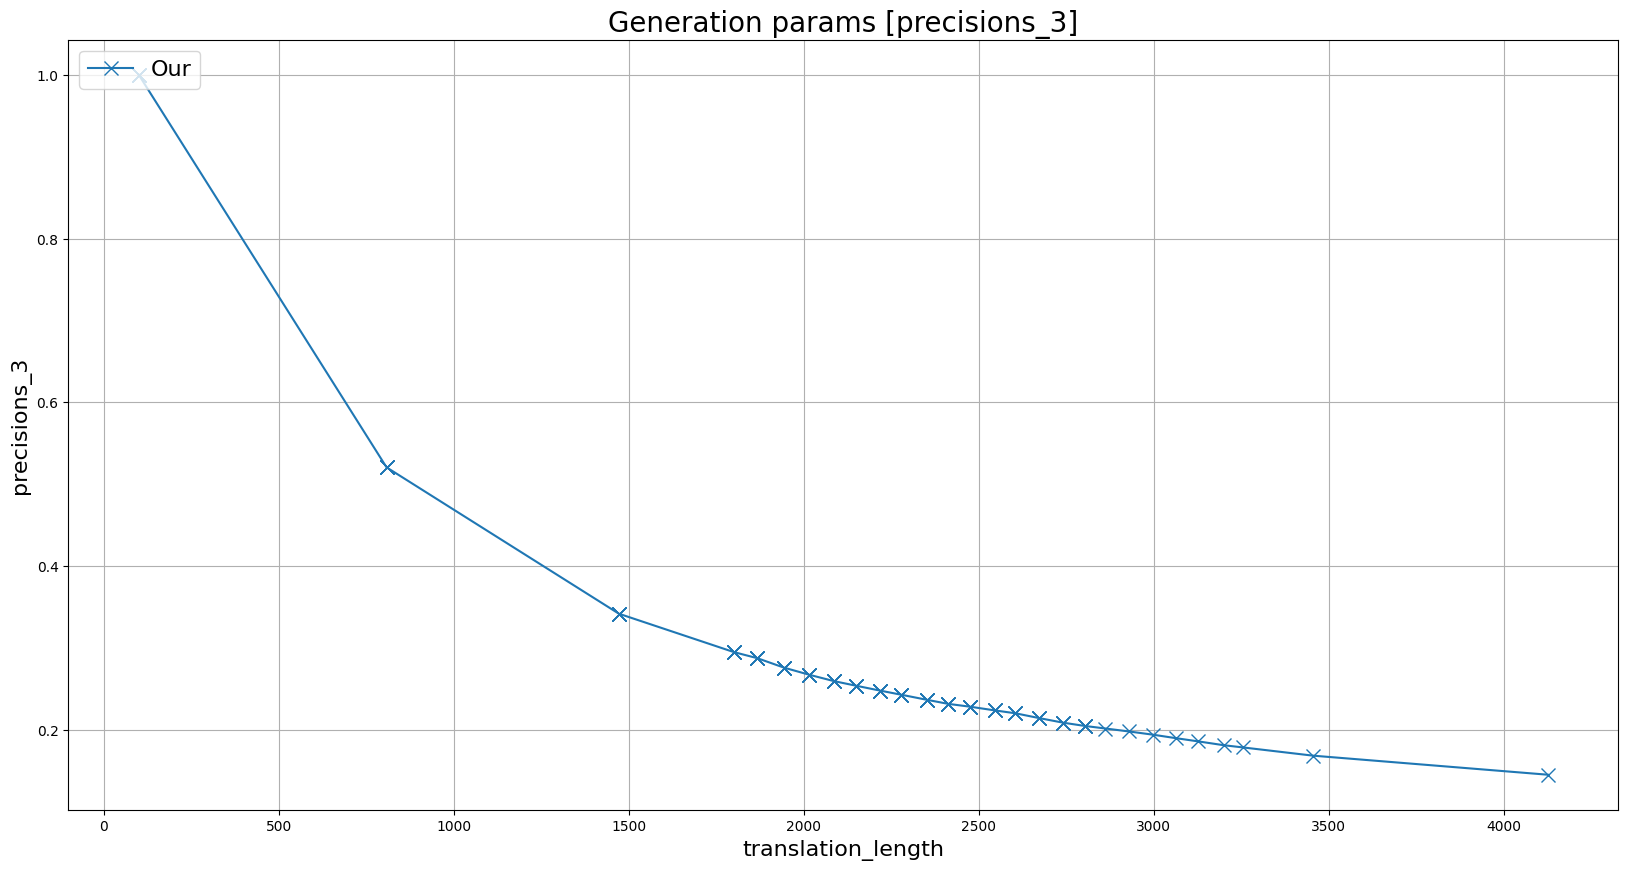

In [103]:
draw_all_metrics(data, param_name="translation_length")

28 3 28


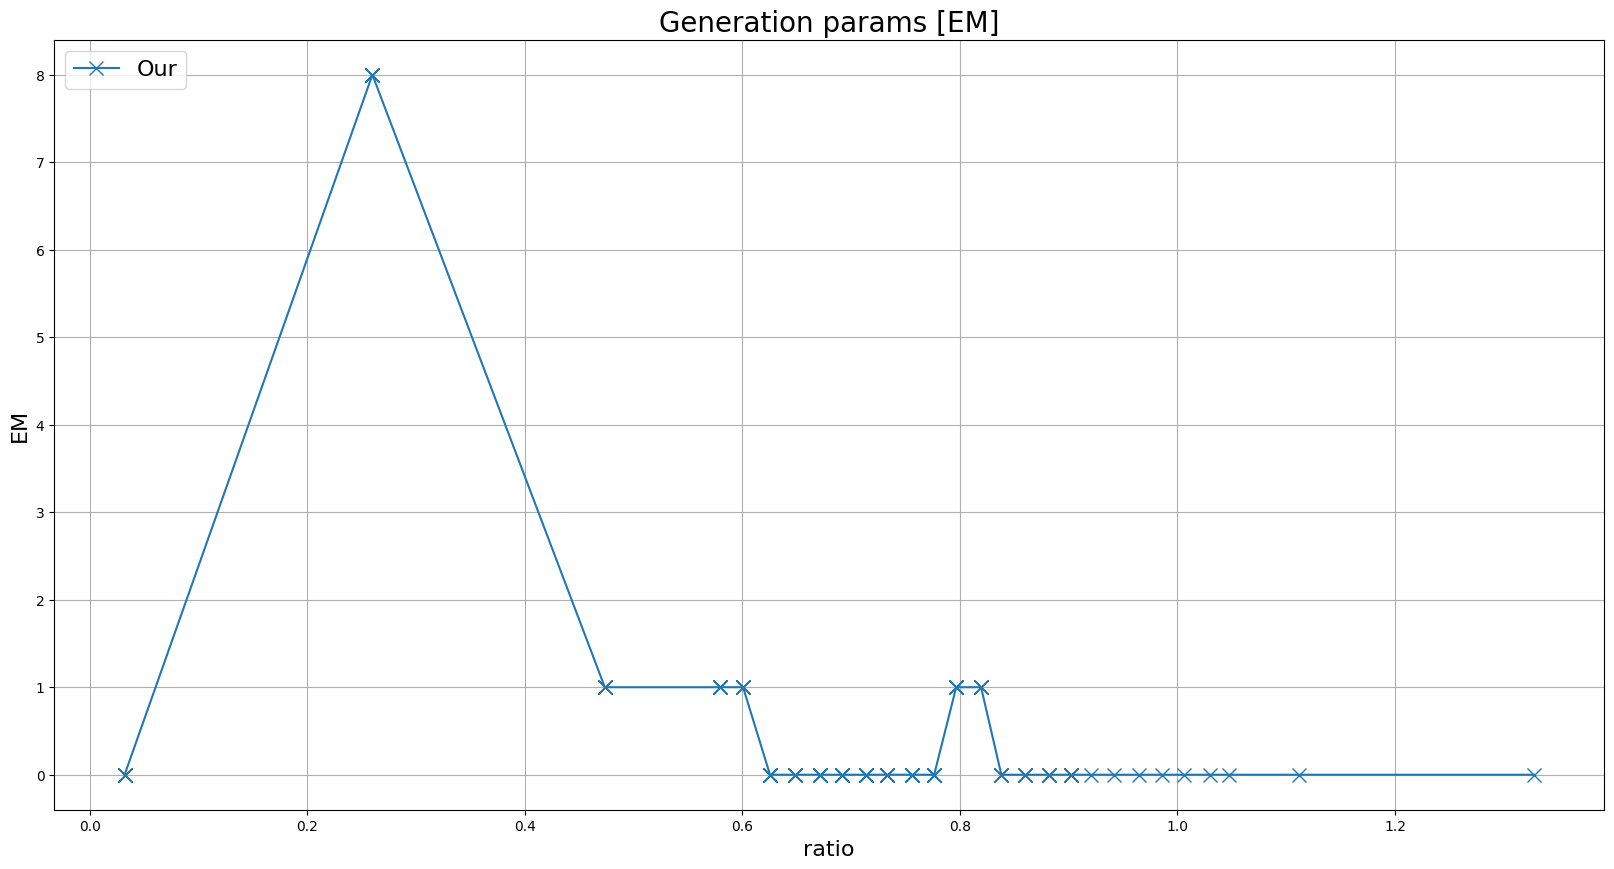

28 28 28


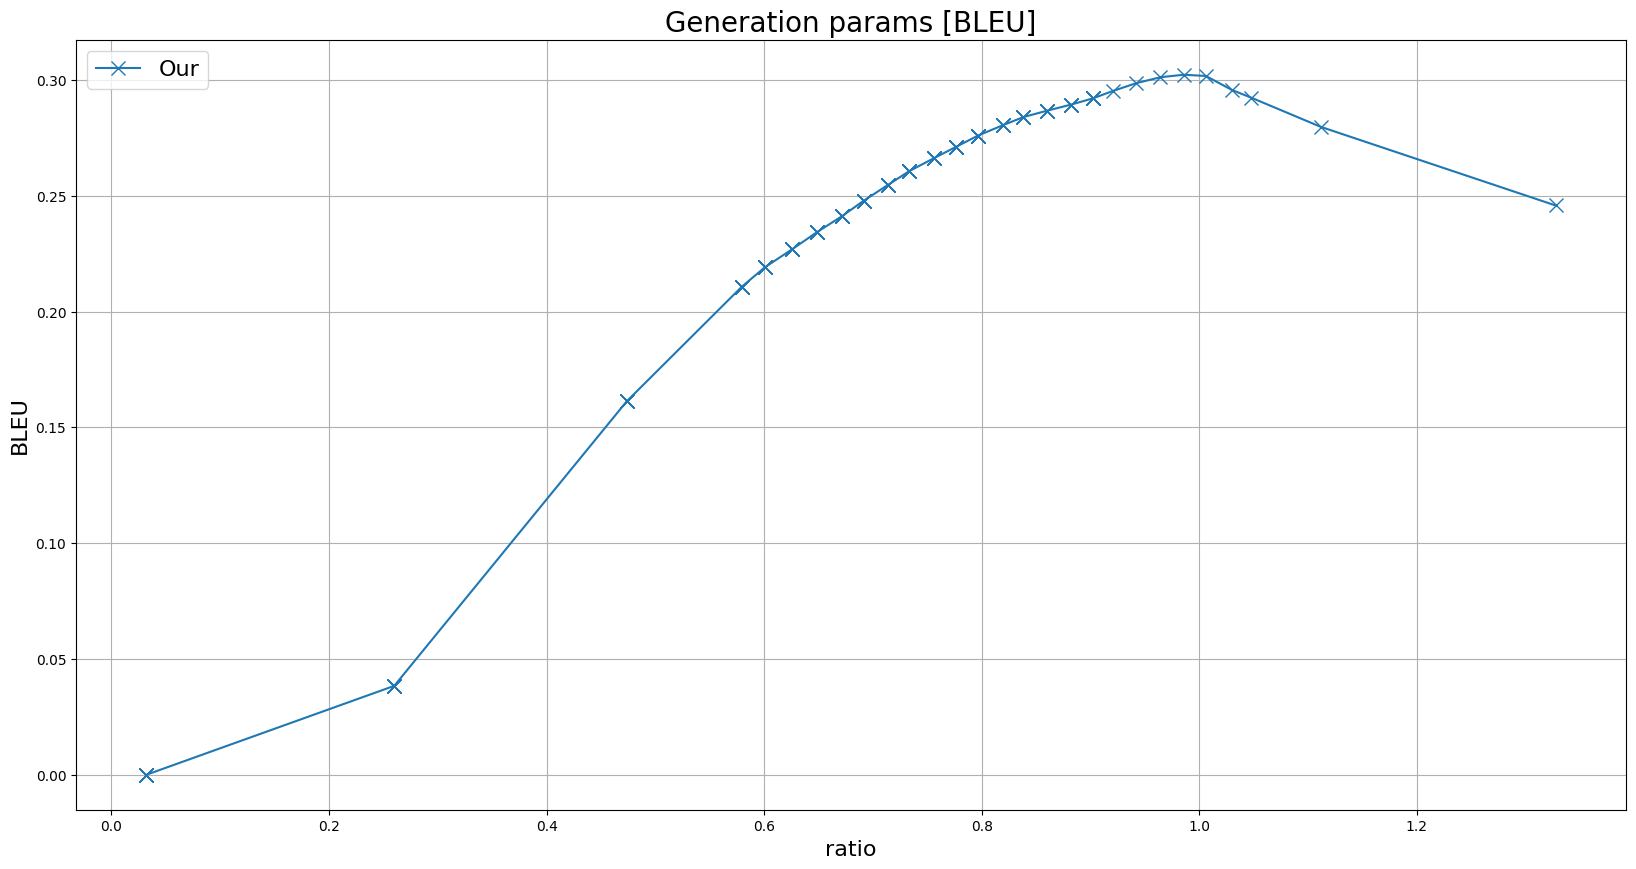

28 24 28


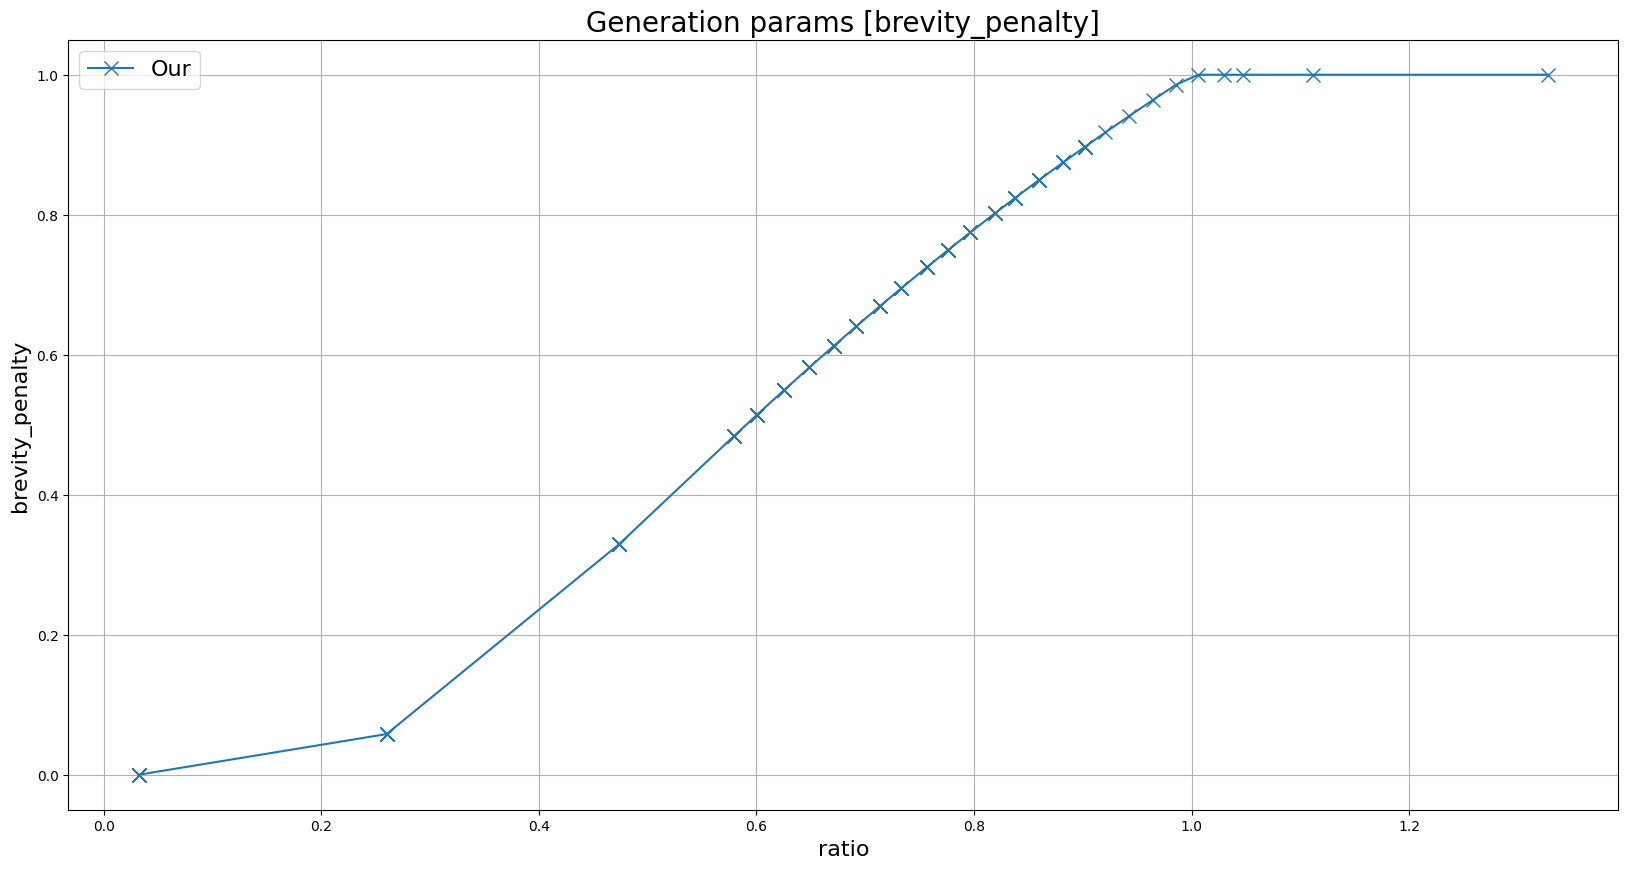

28 28 28


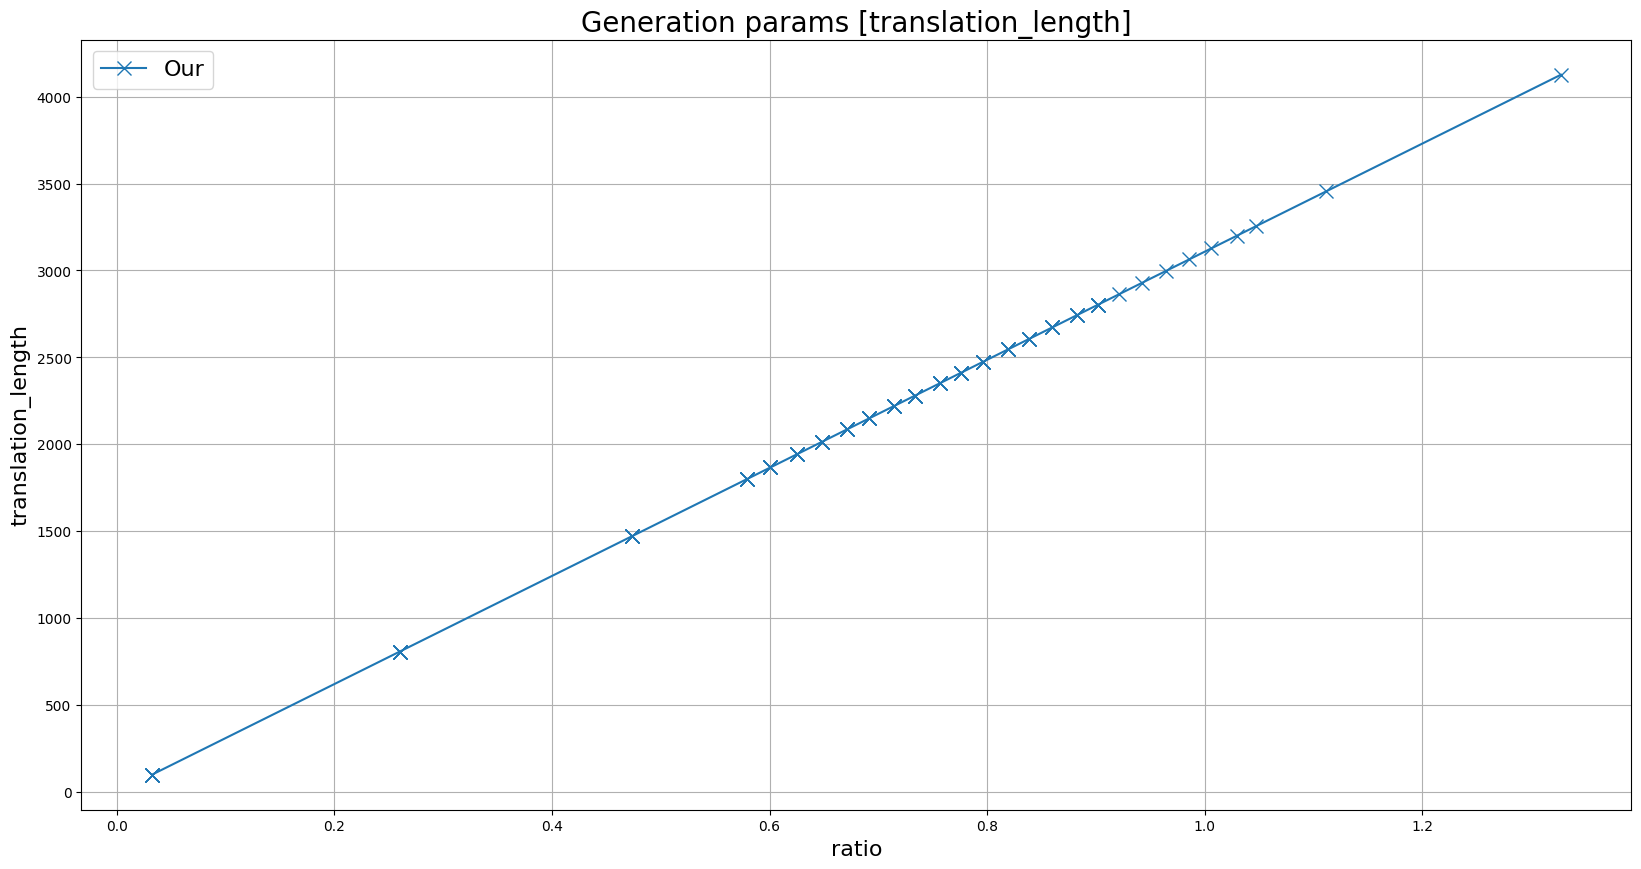

28 1 28


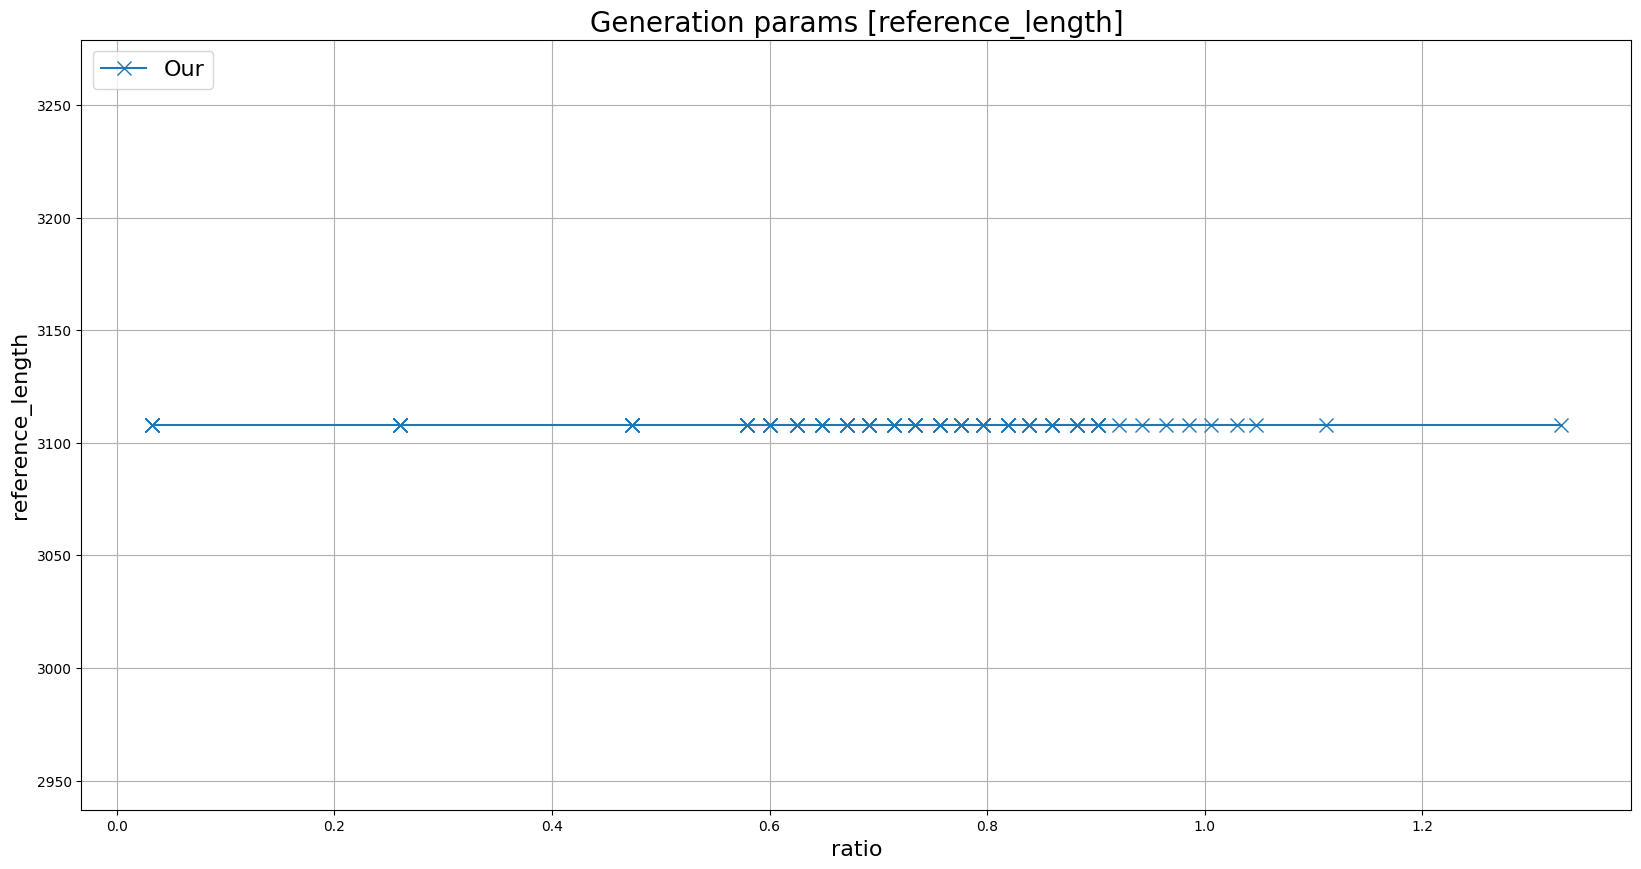

28 28 28


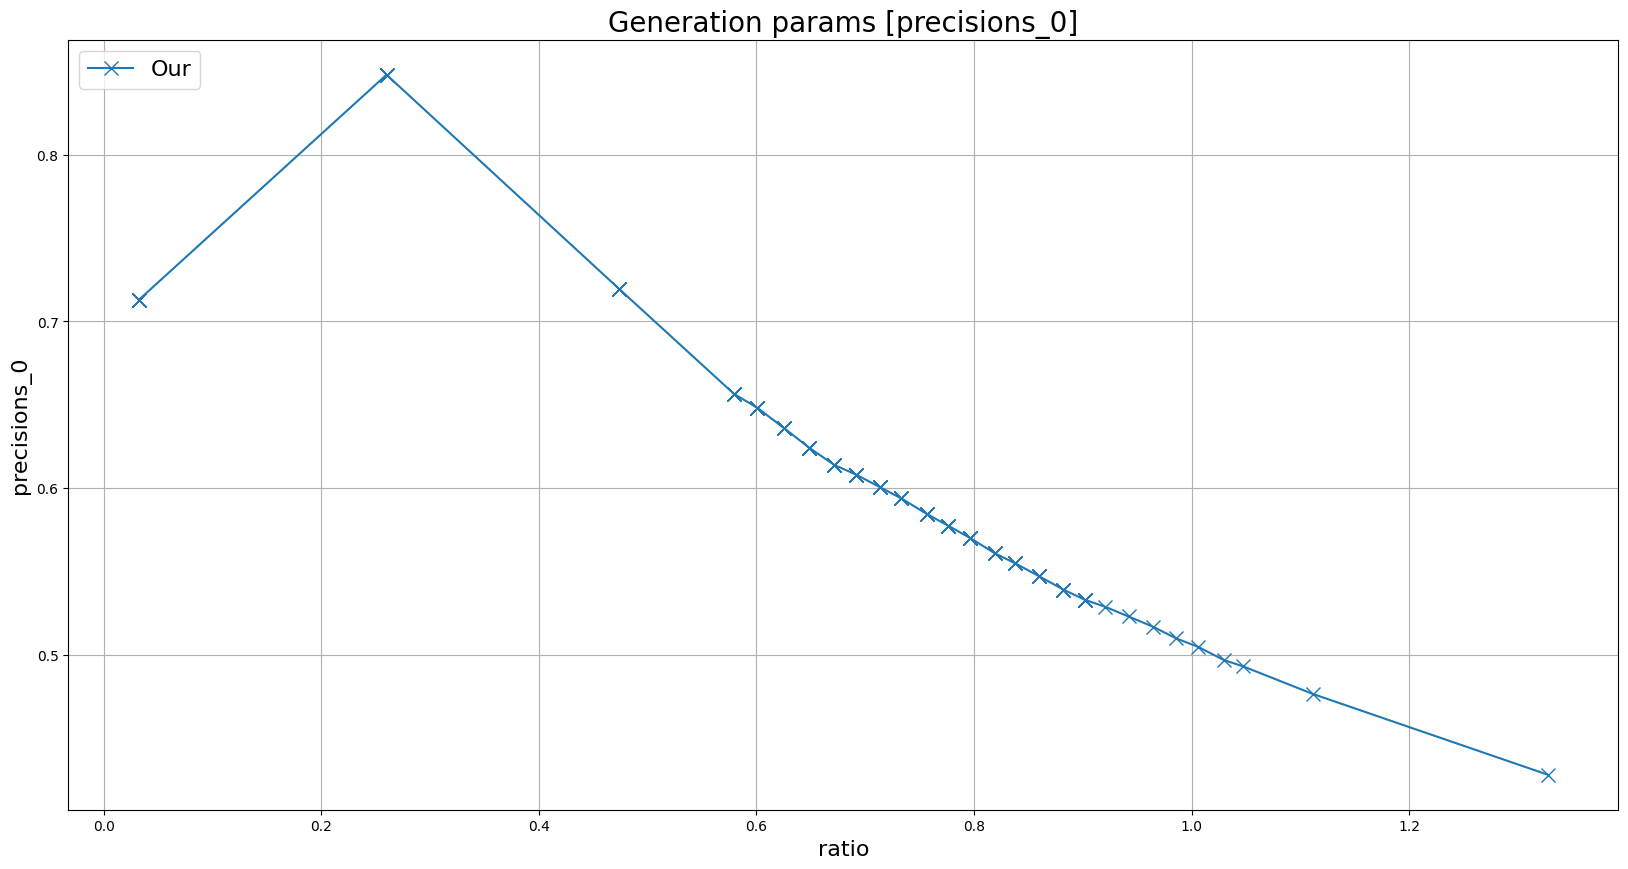

28 28 28


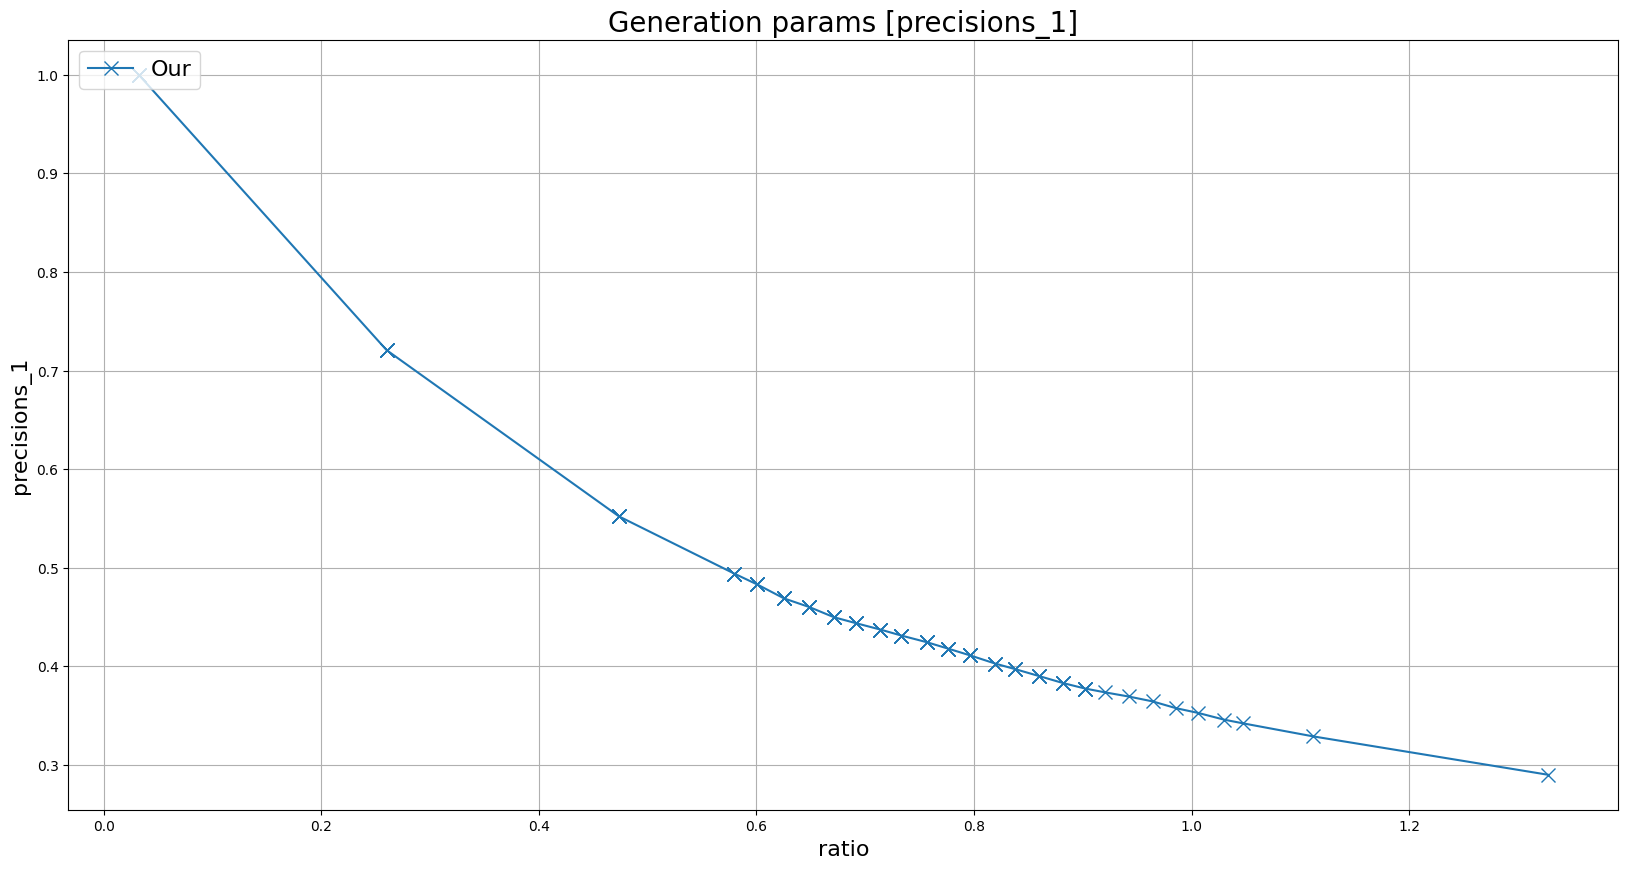

28 28 28


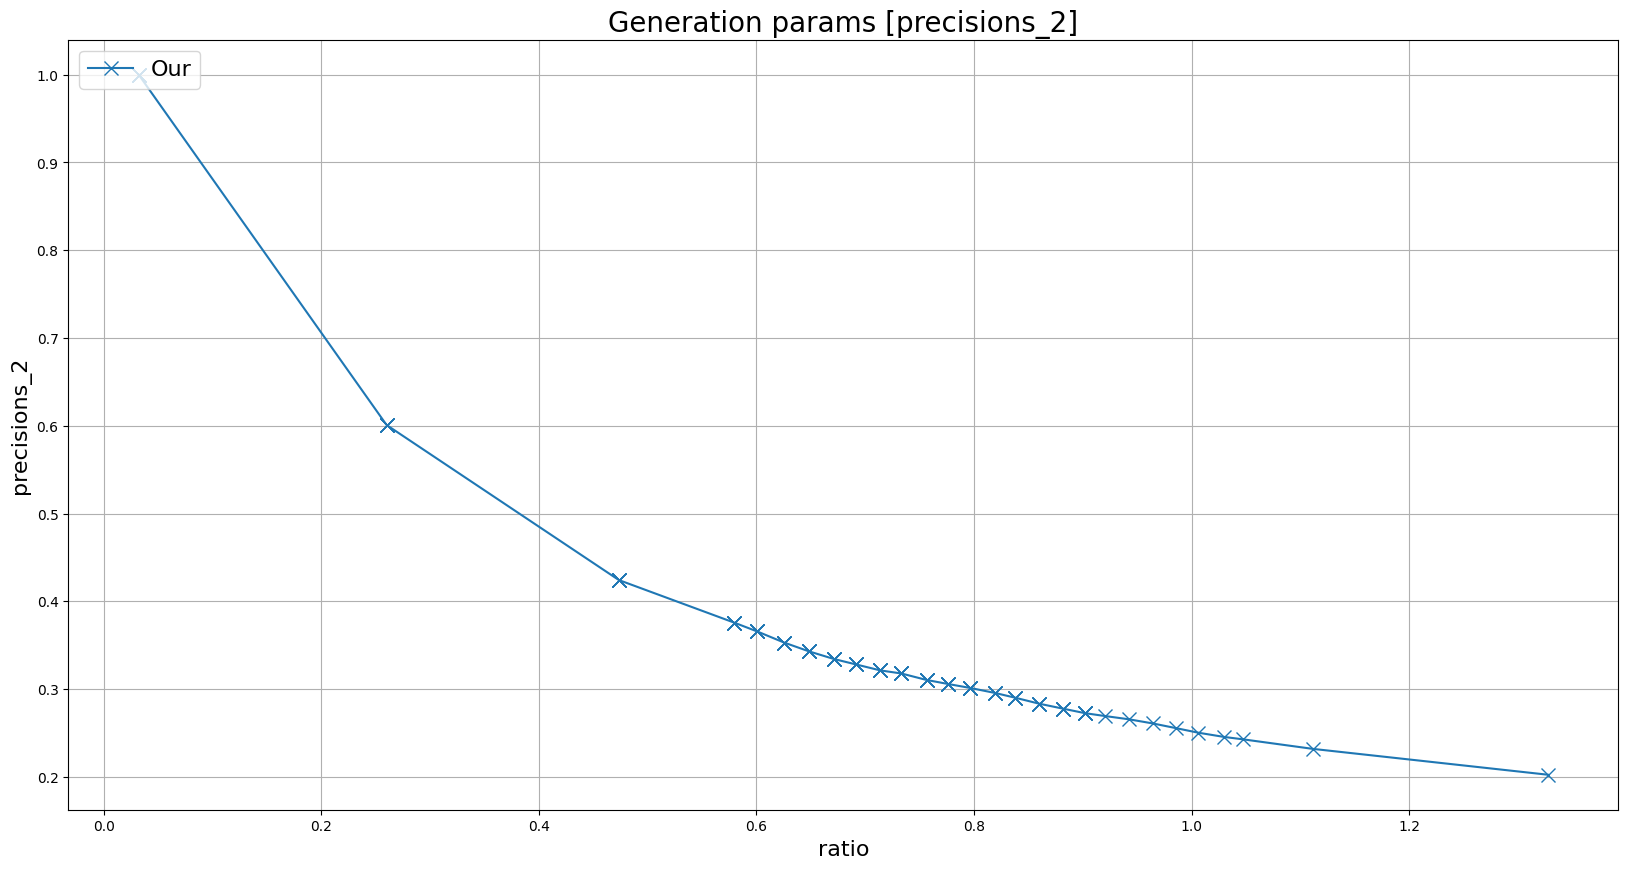

28 28 28


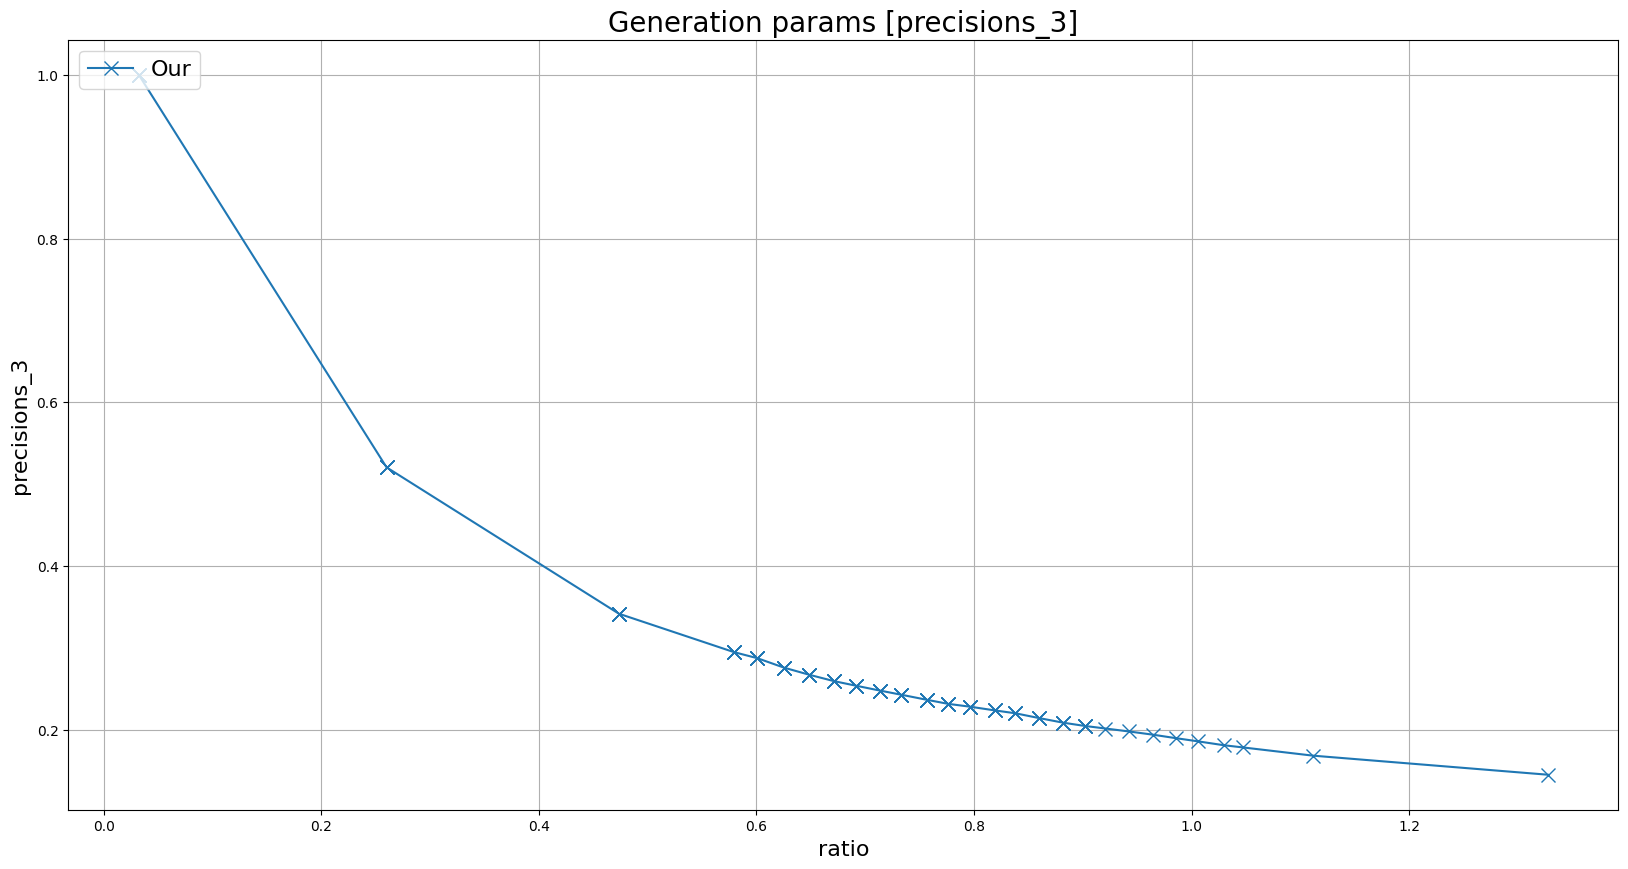

In [106]:
draw_all_metrics(data, 
                 param_name="ratio"
                )

In [100]:
data

,EM,BLEU,brevity_penalty,ratio,translation_length,reference_length,precisions_0,precisions_1,precisions_2,precisions_3,max_new_tokens,temperature,experiment_name
20,0.0,7.937336e-14,8.638175e-14,0.032175,100,3108,0.712871,1.000000,1.000000,1.000000,NaN,0.95,/root/experiments/t2c_concode_220428_v10/
1,0.0,7.937336e-14,8.638175e-14,0.032175,100,3108,0.712871,1.000000,1.000000,1.000000,NaN,1.00,/root/experiments/t2c_concode_220428_v10/
39,0.0,7.937336e-14,8.638175e-14,0.032175,100,3108,0.712871,1.000000,1.000000,1.000000,NaN,0.90,/root/experiments/t2c_concode_220428_v10/
77,0.0,7.937336e-14,8.638175e-14,0.032175,100,3108,0.712871,1.000000,1.000000,1.000000,NaN,0.50,/root/experiments/t2c_concode_220428_v10/
58,0.0,7.937336e-14,8.638175e-14,0.032175,100,3108,0.712871,1.000000,1.000000,1.000000,NaN,0.80,/root/experiments/t2c_concode_220428_v10/
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.0,2.957250e-01,1.000000e+00,1.029923,3201,3108,0.496877,0.345906,0.245503,0.181254,46.0,1.00,/root/experiments/t2c_concode_220428_v10/
98,0.0,2.986432e-01,9.403761e-01,0.942085,2928,3108,0.523045,0.369388,0.265665,0.198174,42.0,1.00,/root/experiments/t2c_concode_220428_v10/
97,0.0,3.012122e-01,9.636404e-01,0.964286,2997,3108,0.517011,0.364389,0.260901,0.194218,43.0,1.00,/root/experiments/t2c_concode_220428_v10/
93,0.0,3.017467e-01,1.000000e+00,1.006113,3127,3108,0.504795,0.352708,0.250342,0.185997,45.0,1.00,/root/experiments/t2c_concode_220428_v10/


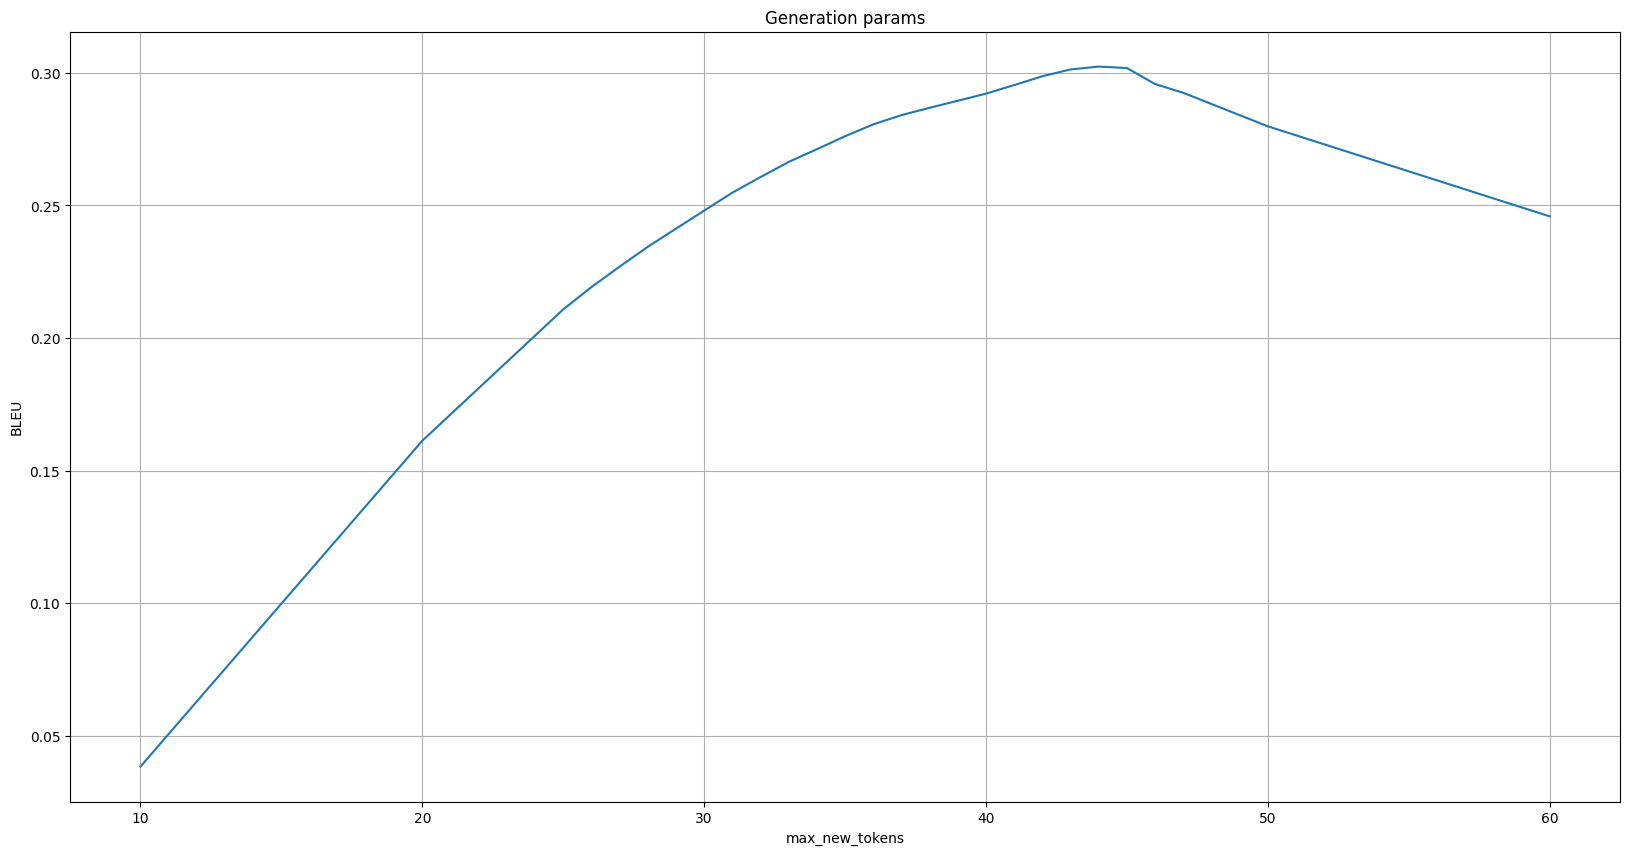

In [43]:
#experiment_name.split('/')[-2]+'.csv'

,EM,BLEU,brevity_penalty,ratio,translation_length,reference_length,precisions_0,precisions_1,precisions_2,precisions_3,max_new_tokens,temperature,experiment_name
20,0.0,7.937336e-14,8.638175e-14,0.032175,100,3108,0.712871,1.000000,1.000000,1.00000,NaN,0.95,/root/experiments/t2c_concode_220428_v10/
1,0.0,7.937336e-14,8.638175e-14,0.032175,100,3108,0.712871,1.000000,1.000000,1.00000,NaN,1.00,/root/experiments/t2c_concode_220428_v10/
39,0.0,7.937336e-14,8.638175e-14,0.032175,100,3108,0.712871,1.000000,1.000000,1.00000,NaN,0.90,/root/experiments/t2c_concode_220428_v10/
58,0.0,7.937336e-14,8.638175e-14,0.032175,100,3108,0.712871,1.000000,1.000000,1.00000,NaN,0.80,/root/experiments/t2c_concode_220428_v10/
77,0.0,7.937336e-14,8.638175e-14,0.032175,100,3108,0.712871,1.000000,1.000000,1.00000,NaN,0.50,/root/experiments/t2c_concode_220428_v10/
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,0.0,2.894099e-01,8.750457e-01,0.882239,2742,3108,0.539191,0.382898,0.277625,0.20876,39.0,0.95,/root/experiments/t2c_concode_220428_v10/
18,0.0,2.920768e-01,8.972538e-01,0.902188,2804,3108,0.532977,0.377449,0.272553,0.20479,40.0,1.00,/root/experiments/t2c_concode_220428_v10/
56,0.0,2.920768e-01,8.972538e-01,0.902188,2804,3108,0.532977,0.377449,0.272553,0.20479,40.0,0.90,/root/experiments/t2c_concode_220428_v10/
75,0.0,2.920768e-01,8.972538e-01,0.902188,2804,3108,0.532977,0.377449,0.272553,0.20479,40.0,0.80,/root/experiments/t2c_concode_220428_v10/


In [29]:
!ls /root/results/2023-05-05-11_46_10.txtj

ls: cannot access '/root/results/2023-05-05-11_46_10.txtj': No such file or directory


In [30]:
fn_output = "/root/results/2023-05-05-11_46_10.txt"

In [32]:
!head /root/results/2023-05-05-11_46_10.txt

int function ( ) { int loc0 = _total ; for ( Iterator loc1 = _support ; loc1 . hasNext ( ) ;
void function ( boolean arg0 ) { fStatementsRecovery = arg0 ; } ### Exception : void function ( ) { f
boolean function ( ) { return true ; } ### Exceptions: void function ( ) { } void function ( ) { } 
String function ( ) { return getIdentitiesZNode ( ) ; } ### Exceptions: String function ( ) { throw new Runtime
int function ( GenVector < C > arg0 ) { return this . signum ( arg0 ) ; } ### Exceptions : 
void function ( Region arg0 ) { fTagPosition = arg0 ; } } void setTagPosition ( Region arg0 ) { fTag
double function ( double arg0 , double arg1 , double arg2 , double arg3 , double arg4 , double arg5 , double arg6
boolean function ( ) { return false ; } ### Exception : void function ( ) { } ### Parameters : boolean [
Integer function ( ) { return intervalQualifier . getFractionalSecondPrecision ( ) ; } ### Exception : Illegal
byte [ ] function ( Drawable arg0 ) { byte [ ] loc0 = new byte [ arg0 

In [37]:
def foo(s):
    return s.split("### Exceptions")[0]
open(fn_output+'_fix.txt', "w+").write(
    '\n'.join([foo(s) for s  in open(fn_output, "r").read().split('\n')])
)

8820

In [38]:
# !head {evaluator.fn_etalon}

In [39]:
import subprocess
# command = f"python /root/CodeXGLUE/Text-Code/text-to-code/evaluator/evaluator.py -a /root/CodeXGLUE/Text-Code/text-to-code/evaluator/answers.json -p {current_pred_name}"
command = f"python /root/code/CodeXGLUE_t2c_evaluator/evaluator.py -a {evaluator.fn_etalon} -p {fn_output+'_fix.txt'}"

result = subprocess.run(command.split(' '), 
                        stderr=subprocess.PIPE)
result.stderr
results = result.stderr.decode()
print(results)

INFO:__main__:BLEU: 23.23, EM: 14.0



In [31]:
import subprocess
# command = f"python /root/CodeXGLUE/Text-Code/text-to-code/evaluator/evaluator.py -a /root/CodeXGLUE/Text-Code/text-to-code/evaluator/answers.json -p {current_pred_name}"
command = f"python /root/code/CodeXGLUE_t2c_evaluator/evaluator.py -a {evaluator.fn_etalon} -p {fn_output}"

result = subprocess.run(command.split(' '), 
                        stderr=subprocess.PIPE)
result.stderr
results = result.stderr.decode()
print(results)

INFO:__main__:BLEU: 24.8, EM: 0.0



In [29]:
pd.DataFrame(res)#experiment_name.split('/')[-2]+'.csv'

,EM,BLEU,brevity_penalty,ratio,translation_length,reference_length,precisions_0,precisions_1,precisions_2,precisions_3,max_new_tokens,min_new_tokens
0,0.0,3.670477e-12,4.045834e-12,0.036720,30,817,0.677419,1.000000,1.000000,1.000000,NaN,10
1,0.0,3.670477e-12,4.045834e-12,0.036720,30,817,0.677419,1.000000,1.000000,1.000000,NaN,10
2,0.0,3.670477e-12,4.045834e-12,0.036720,30,817,0.677419,1.000000,1.000000,1.000000,NaN,10
3,0.0,5.527188e-02,9.684012e-02,0.299878,245,817,0.796748,0.629630,0.500000,0.423077,10.0,10
4,0.0,5.527188e-02,9.684012e-02,0.299878,245,817,0.796748,0.629630,0.500000,0.423077,10.0,10
5,0.0,5.527188e-02,9.684012e-02,0.299878,245,817,0.796748,0.629630,0.500000,0.423077,10.0,10
6,0.0,1.817280e-01,4.584260e-01,0.561812,459,817,0.656522,0.460465,0.325000,0.251351,20.0,10
7,0.0,1.817280e-01,4.584260e-01,0.561812,459,817,0.656522,0.460465,0.325000,0.251351,20.0,10
8,0.0,1.817280e-01,4.584260e-01,0.561812,459,817,0.656522,0.460465,0.325000,0.251351,20.0,10
9,0.0,2.323938e-01,8.361626e-01,0.848225,693,817,0.521614,0.338855,0.219243,0.153974,30.0,10


In [25]:
[i for i in res if i['max_new_tokens']==30]

[{'EM': 0.0,
  'BLEU': 0.23239378792921556,
  'brevity_penalty': 0.8361626069149046,
  'ratio': 0.8482252141982864,
  'translation_length': 693,
  'reference_length': 817,
  'precisions_0': 0.521613832853026,
  'precisions_1': 0.338855421686747,
  'precisions_2': 0.2192429022082019,
  'precisions_3': 0.15397350993377484,
  'max_new_tokens': 30,
  'min_new_tokens': 10},
 {'EM': 0.0,
  'BLEU': 0.23239378792921556,
  'brevity_penalty': 0.8361626069149046,
  'ratio': 0.8482252141982864,
  'translation_length': 693,
  'reference_length': 817,
  'precisions_0': 0.521613832853026,
  'precisions_1': 0.338855421686747,
  'precisions_2': 0.2192429022082019,
  'precisions_3': 0.15397350993377484,
  'max_new_tokens': 30,
  'min_new_tokens': 10},
 {'EM': 0.0,
  'BLEU': 0.23239378792921556,
  'brevity_penalty': 0.8361626069149046,
  'ratio': 0.8482252141982864,
  'translation_length': 693,
  'reference_length': 817,
  'precisions_0': 0.521613832853026,
  'precisions_1': 0.338855421686747,
  'precisi

In [23]:
import pandas as pd
df = pd.DataFrame(res)
df.pivot(values="BLEU", index="max_new_tokens", columns="min_new_tokens")

ValueError: Index contains duplicate entries, cannot reshape

In [21]:
import pandas as pd
df = pd.DataFrame(res)
df.pivot(values="BLEU", index="max_new_tokens", columns="min_new_tokens")

min_new_tokens,NaN,10.0,20.0,30.0,40.0,60.0
max_new_tokens,,,,,,
NaN,3.670477e-12,3.670477e-12,3.670477e-12,3.670477e-12,3.670477e-12,3.670477e-12
10.0,5.527188e-02,5.527188e-02,NaN,NaN,NaN,NaN
20.0,1.817280e-01,1.817280e-01,1.817280e-01,NaN,NaN,NaN
30.0,2.323938e-01,2.323938e-01,2.323938e-01,2.323938e-01,NaN,NaN
50.0,1.749703e-01,NaN,NaN,NaN,NaN,NaN


In [5]:
BASE_MODEL = "decapoda-research/llama-7b-hf"
LORA_WEIGHTS = experiment_name #"tloen/alpaca-lora-7b"

model = LLaMAForCausalLM.from_pretrained(
    BASE_MODEL,
    load_in_8bit=True,
    device_map="auto"
)

model = PeftModel.from_pretrained(
    model,
    LORA_WEIGHTS,
    torch_dtype=torch.float16,
)

tokenizer = LLaMATokenizer.from_pretrained(BASE_MODEL)
model.config.pad_token_id = tokenizer.pad_token_id = 0  # unk
tokenizer.padding_side = "left"
# not sure how necessary this part is, not sure if tloen/alpaca-lora-7b was even trained with EOS and BOS tokens
model.config.bos_token_id = 1
model.config.eos_token_id = 2

model.eval()

Overriding torch_dtype=None with `torch_dtype=torch.float16` due to requirements of `bitsandbytes` to enable model loading in mixed int8. Either pass torch_dtype=torch.float16 or don't pass this argument at all to remove this warning.


Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LLaMATokenizer'. 
The class this function is called from is 'LlamaTokenizer'.


PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(32000, 4096, padding_idx=31999)
        (layers): ModuleList(
          (0-31): 32 x LlamaDecoderLayer(
            (self_attn): LlamaAttention(
              (q_proj): Linear8bitLt(
                in_features=4096, out_features=4096, bias=False
                (lora_dropout): Dropout(p=0.05, inplace=False)
                (lora_A): Linear(in_features=4096, out_features=4, bias=False)
                (lora_B): Linear(in_features=4, out_features=4096, bias=False)
              )
              (k_proj): Linear8bitLt(in_features=4096, out_features=4096, bias=False)
              (v_proj): Linear8bitLt(
                in_features=4096, out_features=4096, bias=False
                (lora_dropout): Dropout(p=0.05, inplace=False)
                (lora_A): Linear(in_features=4096, out_features=4, bias=False)
                (lora_B): Linear(in_features=

In [6]:
from EvaluateTestSet2 import EvaluateTestSet

evaluator = EvaluateTestSet()
metric_res = evaluator.evaluate(model=model, 
                                tokenizer=tokenizer
                               )
metric_res

  0%|                                                    | 0/10 [00:00<?, ?it/s]Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


0 10 10


 10%|████▍                                       | 1/10 [00:20<03:04, 20.45s/it]

10 20 10


 20%|████████▊                                   | 2/10 [00:40<02:41, 20.22s/it]

20 30 10


 30%|█████████████▏                              | 3/10 [01:01<02:23, 20.53s/it]

30 40 10


 40%|█████████████████▌                          | 4/10 [01:21<02:01, 20.29s/it]

40 50 10


 50%|██████████████████████                      | 5/10 [01:40<01:39, 19.82s/it]

50 60 10


 60%|██████████████████████████▍                 | 6/10 [02:00<01:19, 19.99s/it]

60 70 10


 70%|██████████████████████████████▊             | 7/10 [02:23<01:02, 20.83s/it]

70 80 10


 80%|███████████████████████████████████▏        | 8/10 [02:41<00:40, 20.02s/it]

80 90 10


 90%|███████████████████████████████████████▌    | 9/10 [03:01<00:19, 19.92s/it]

90 100 10


100%|██████████████████████████████████████| 100/100 [00:00<00:00, 39246.79it/s]


{'EM': 0.0,
 'BLEU': 0.09161595632467821,
 'brevity_penalty': 1.0,
 'ratio': 3.0341055341055343,
 'translation_length': 9430,
 'reference_length': 3108,
 'precisions_0': 0.1820591665783056,
 'precisions_1': 0.11370699817811596,
 'precisions_2': 0.07193153504495721,
 'precisions_3': 0.04731135691600044}

In [26]:
!mkdir temp

In [54]:
import json

# def save_small_data()
b = json.load(open("../data/t2c_answers.json", "r"))
json.dump(b[:30], open('temp/t2c_answers.json', "w+"))

a = open("/root/data/answers.json", "r").readlines()
small_answers = '\n'.join([json.dumps({"code": json.loads(i)['code']}) 
                           for i in a[:30]
                          ]
                         )

open('temp/answers.json', 'w+').write(small_answers)

4113

1285

In [55]:
evaluator = EvaluateTestSet(generation_config = GenerationConfig(max_new_tokens = 25,
                                                                 min_new_tokens = 2,
                                                                ),
                            fn_test_data = "temp/t2c_answers.json",
                            fn_etalon = "temp/answers.json"
                           )
metric_res = evaluator.evaluate(model=model, 
                                tokenizer=tokenizer,
                               )
metric_res

  0%|                                                     | 0/3 [00:00<?, ?it/s]

0 10 10


 33%|███████████████                              | 1/3 [00:04<00:09,  4.63s/it]

10 20 10


 67%|██████████████████████████████               | 2/3 [00:09<00:04,  4.58s/it]

20 30 10


100%|███████████████████████████████████████| 30/30 [00:00<00:00, 201004.98it/s]


{'EM': 0.0,
 'BLEU': 0.21551319390071327,
 'brevity_penalty': 0.7059683881507222,
 'ratio': 0.7417380660954712,
 'translation_length': 606,
 'reference_length': 817,
 'precisions_0': 0.556836902800659,
 'precisions_1': 0.37261698440207974,
 'precisions_2': 0.24314442413162707,
 'precisions_3': 0.172147001934236}

  0%|                                                     | 0/1 [00:00<?, ?it/s]

0 10 10


100%|████████████████████████████████████████| 10/10 [00:00<00:00, 82402.83it/s]


{'EM': 0.0,
 'BLEU': 0.06877774926475176,
 'brevity_penalty': 1.0,
 'ratio': 3.802281368821293,
 'translation_length': 1000,
 'reference_length': 263,
 'precisions_0': 0.13686313686313686,
 'precisions_1': 0.09182643794147326,
 'precisions_2': 0.05402650356778797,
 'precisions_3': 0.032955715756951595}

In [45]:
# 263*3.8

In [40]:
# [json.loads(a[i])['code']==b[i]['output'] for i in range(100)]

In [41]:
# b[0]['instruction']

In [42]:
# b[0]['output']

In [10]:
evaluator.fn_etalon

'/root/data/answers.json'

In [11]:
evaluator.fn_test_data

'../data/t2c_answers.json'

In [ ]:
import json
config = LoraConfig(**json.load(open("/root/experiments/t2c_concode_220428_v12/adapter_config.json", "r")))
model = get_peft_model(model, config)
tokenizer.pad_token_id = 0  # unk. we want this to be different from the eos token